In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T16:39:01.252059+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

numpy     : 2.1.2
matplotlib: 3.9.2
teeplot   : 1.4.2
polars    : 1.26.0
seaborn   : 0.13.2
pandas    : 2.2.3

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-04-30-profile-mut-screen"
teeplot_subdir


'2025-04-30-profile-mut-screen'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/9rck3/download")


In [7]:
df["replicate_uuid"].nunique()


15

In [8]:
df["is_focal_mutation"] = df["mut_char_pos"] == 0


In [9]:
stats = (
    "binom_p",
    "binom_stat",
    "trinom_p",
    "trinom_stat",
    "trinom_p_fill0",
    "trinom_stat_fill0",
    "mw_p",
    "cliffs_delta",
    "mw_p_dropna",
    "cliffs_delta_dropna",
)


In [10]:
dfpl = pl.from_pandas(
    df[
        (df["trt_hsurf_bits"] == 0)
        & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
        & (df["tb_stat"].str.contains("ratio"))
    ],
)


In [11]:
records = []
groups = dfpl.group_by(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp.filter(pl.col("is_focal_mutation"))
    grp_nonfocal = grp.filter(~pl.col("is_focal_mutation"))

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_uuid": screen_uuid,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )
    for __ in range(2_000):
        row = grp_nonfocal.sample(1)
        records.append(
            {
                **record,
                **{
                    stat: row[stat].item() for stat in stats
                },
                **{"mutation": "nonfocal"},
            },
        )


1680it [08:19,  3.36it/s]


In [12]:
data = pd.DataFrame(records)


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


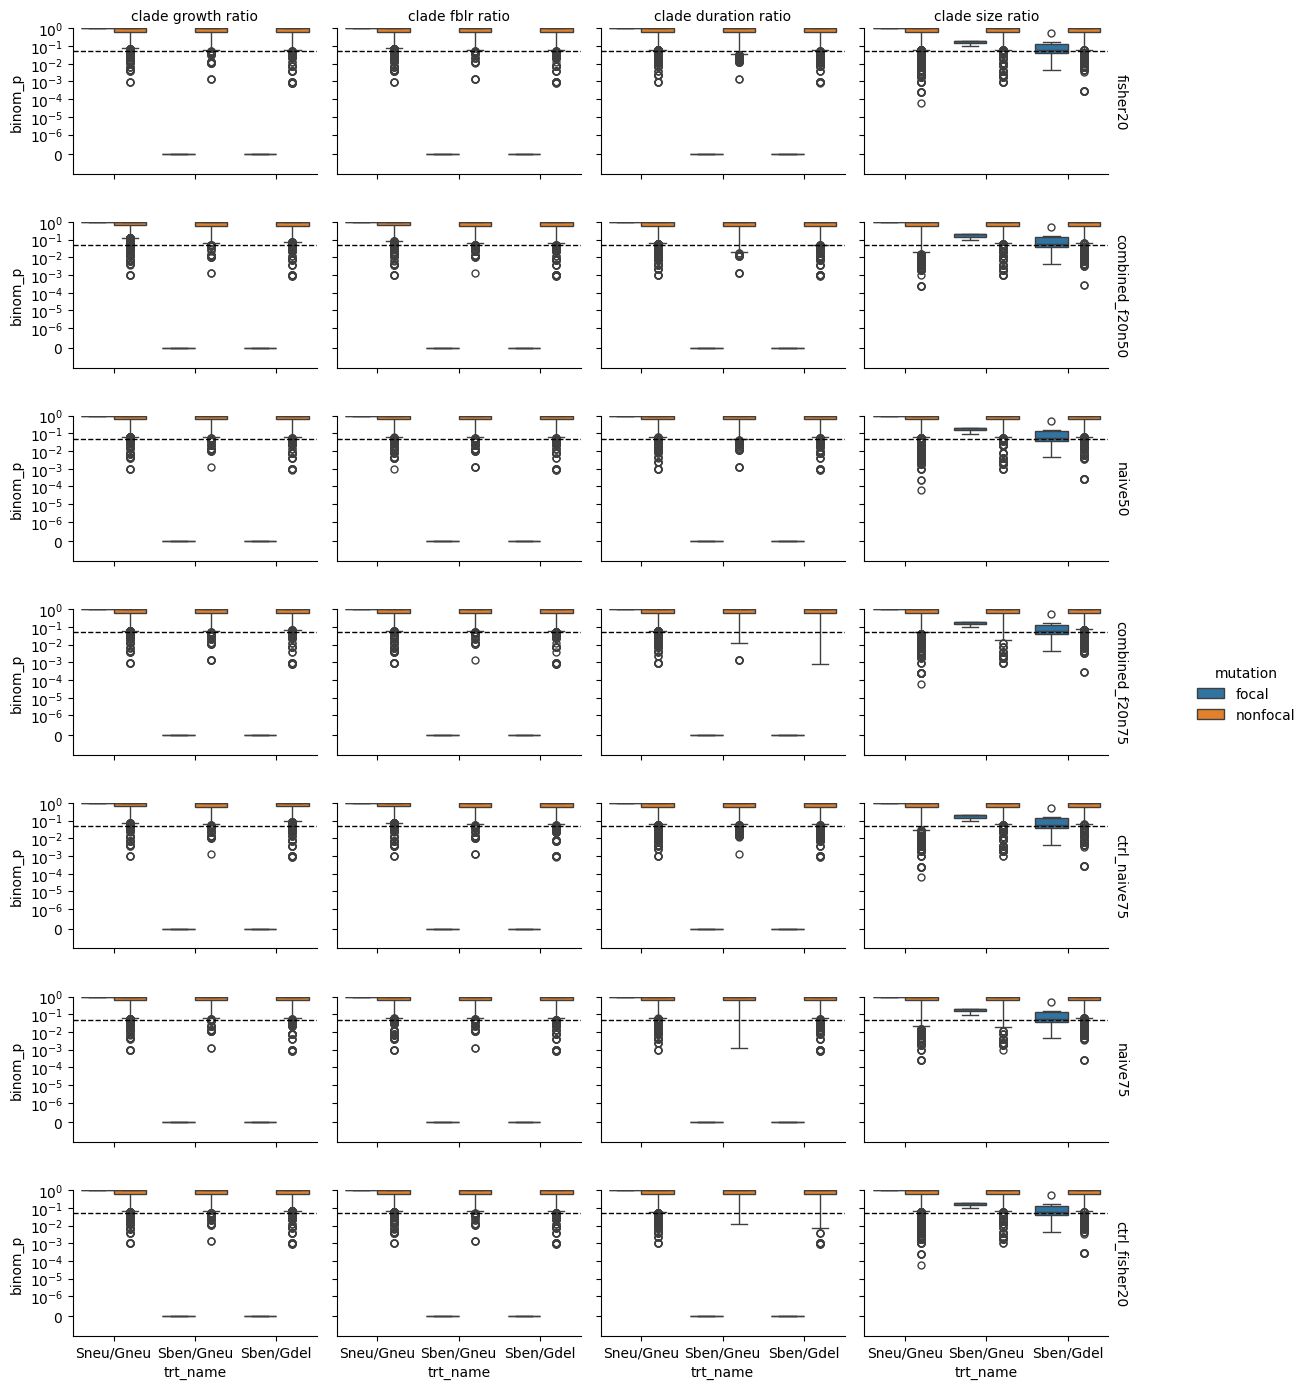

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


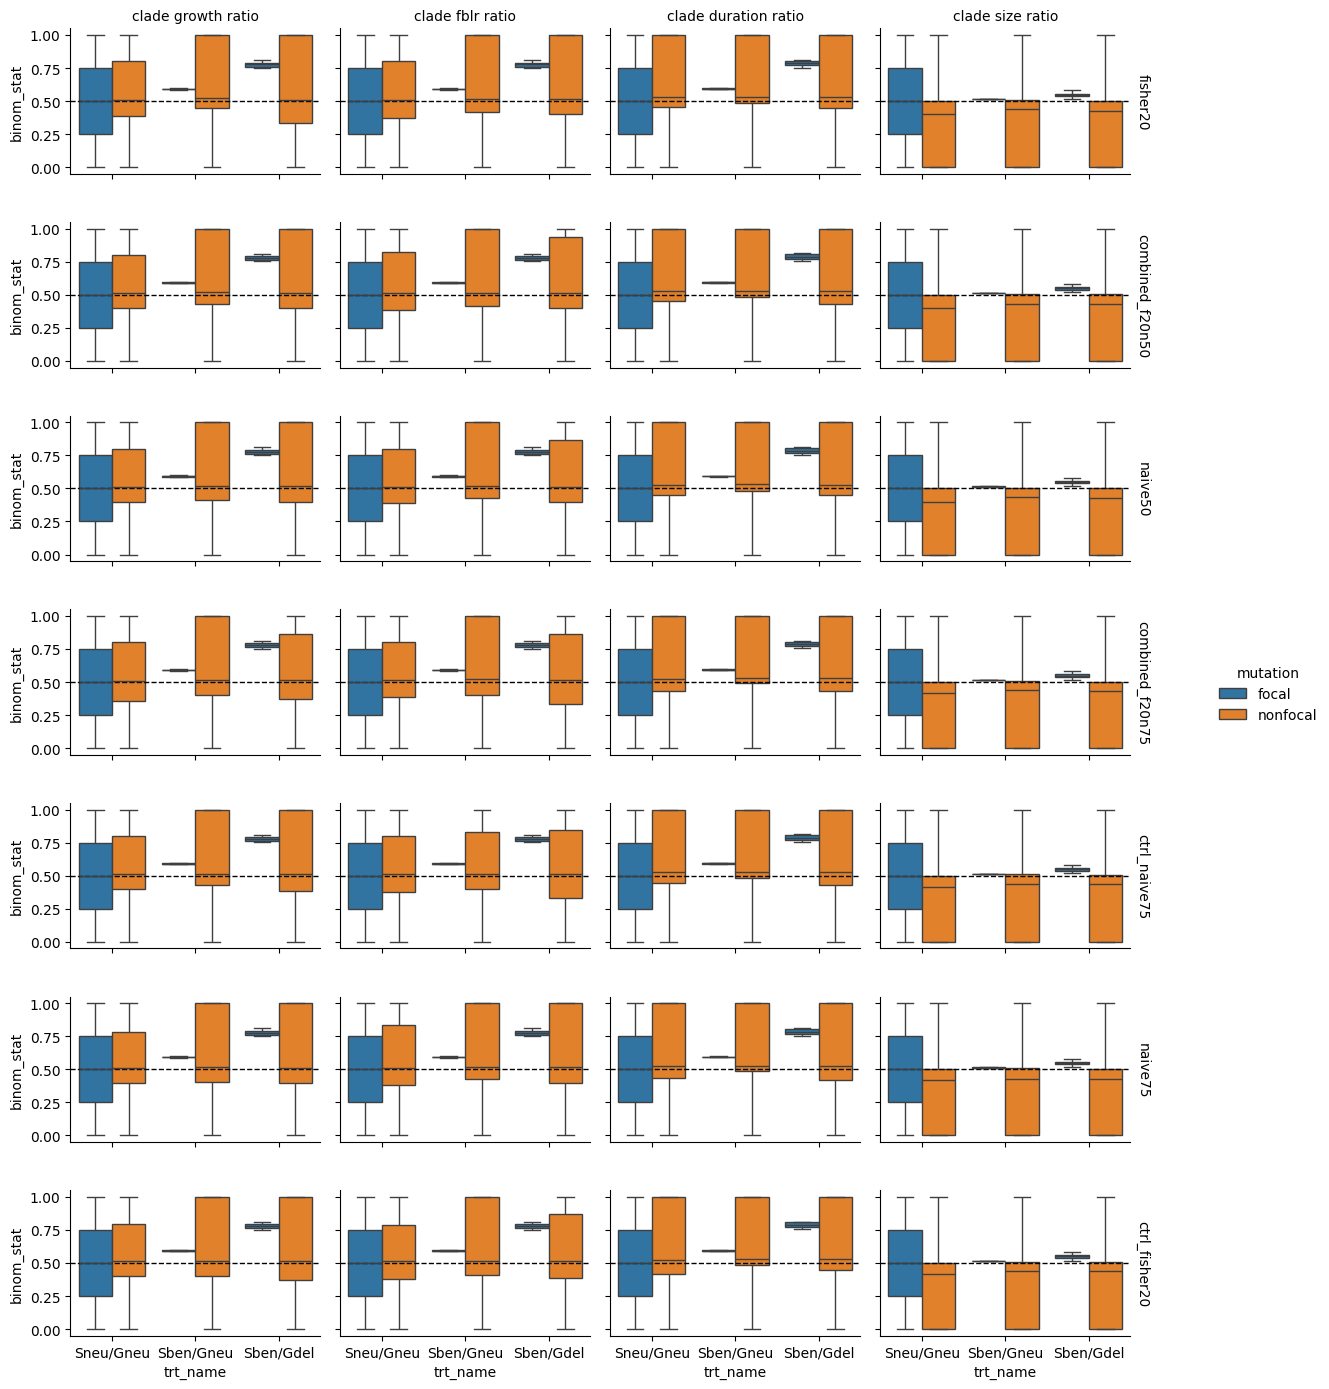

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


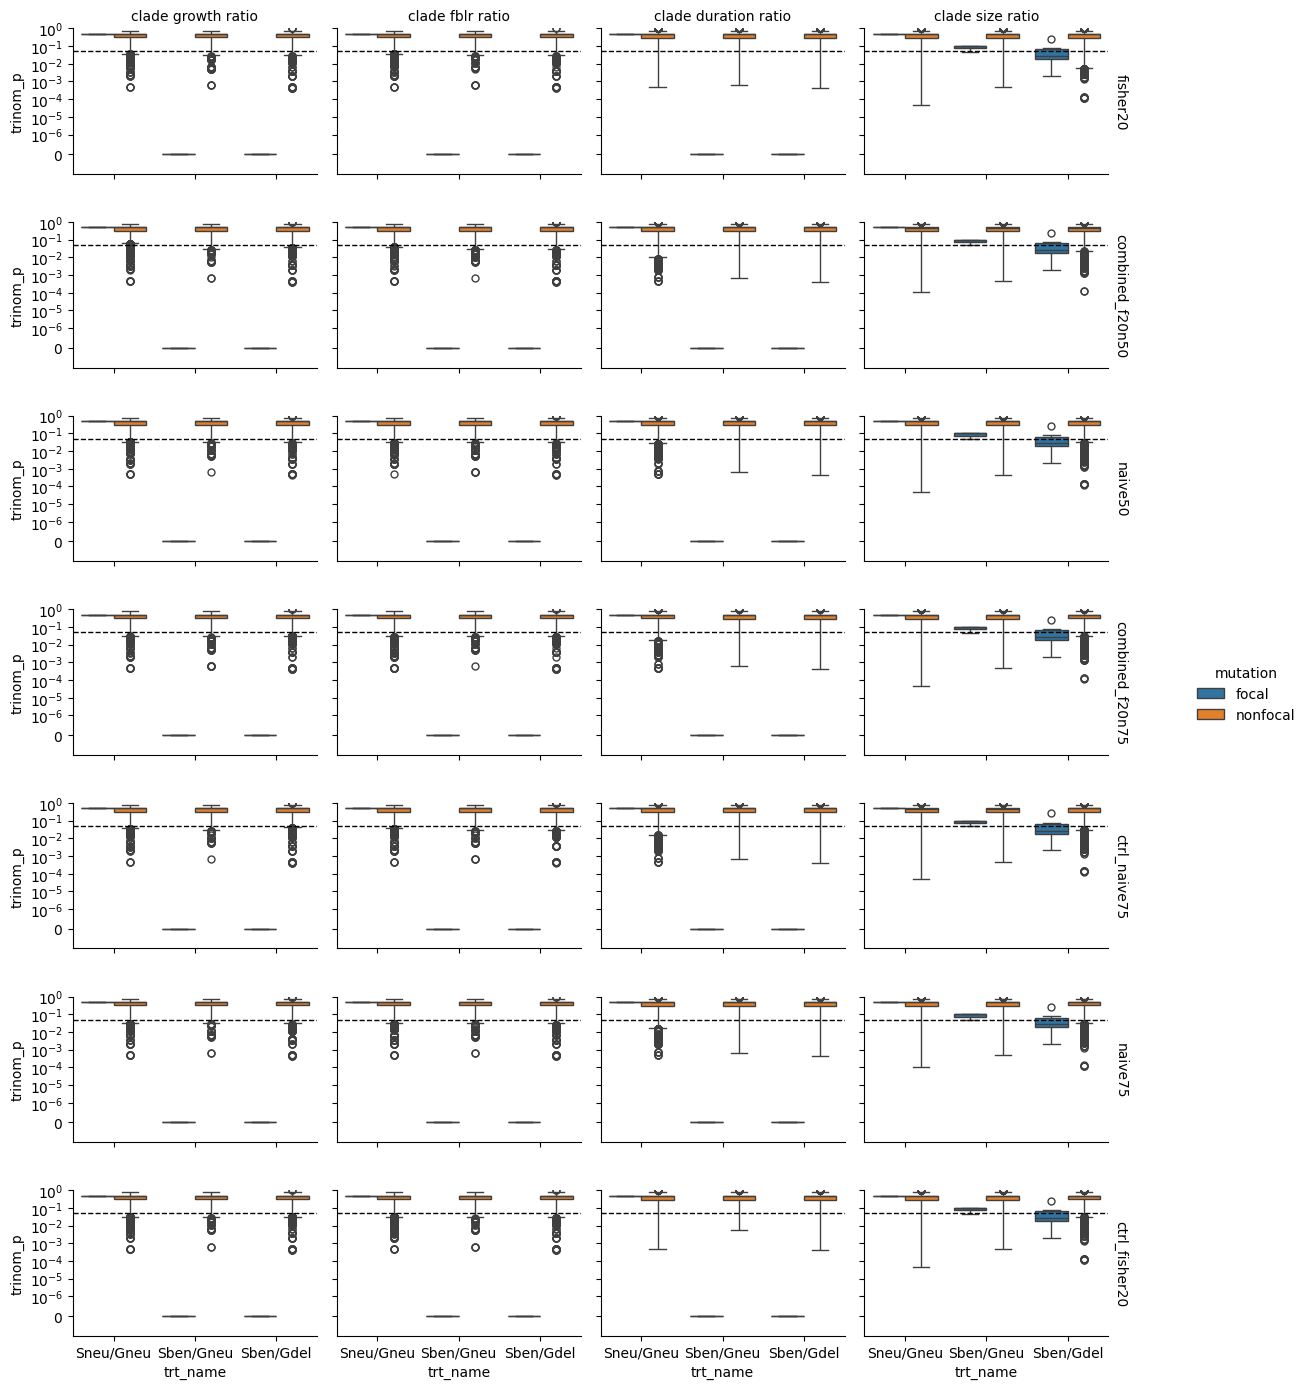

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


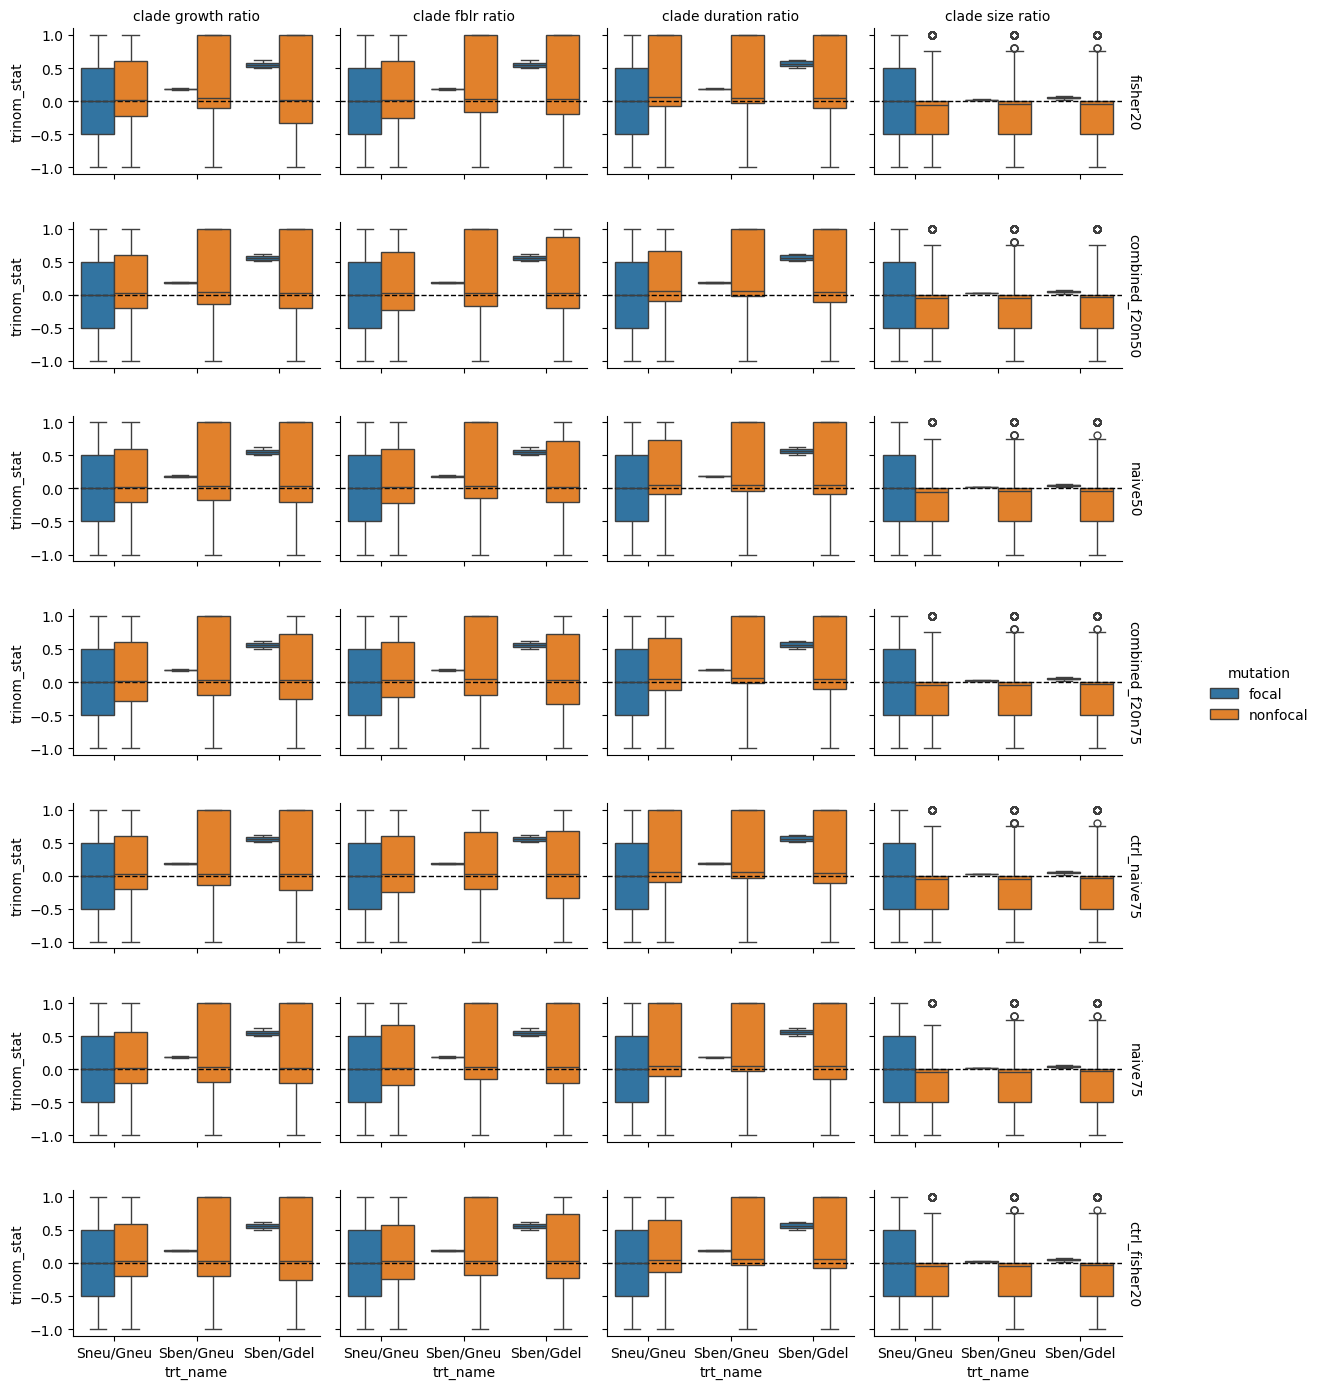

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


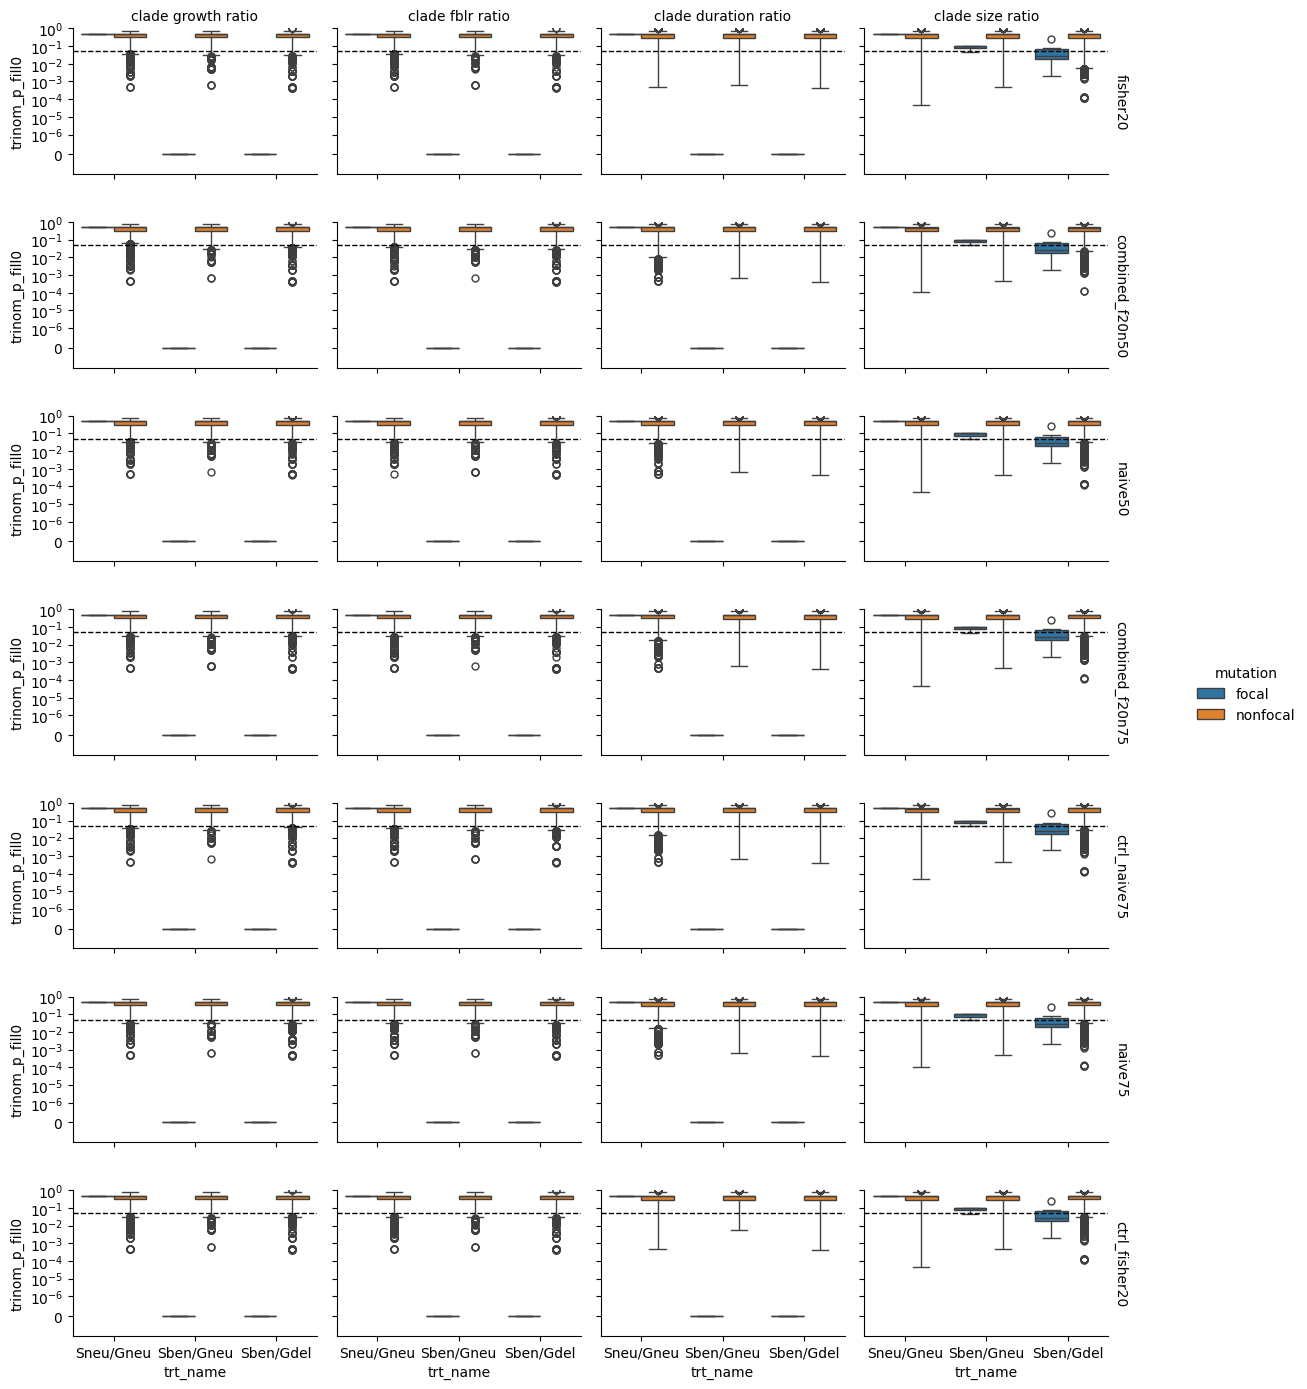

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


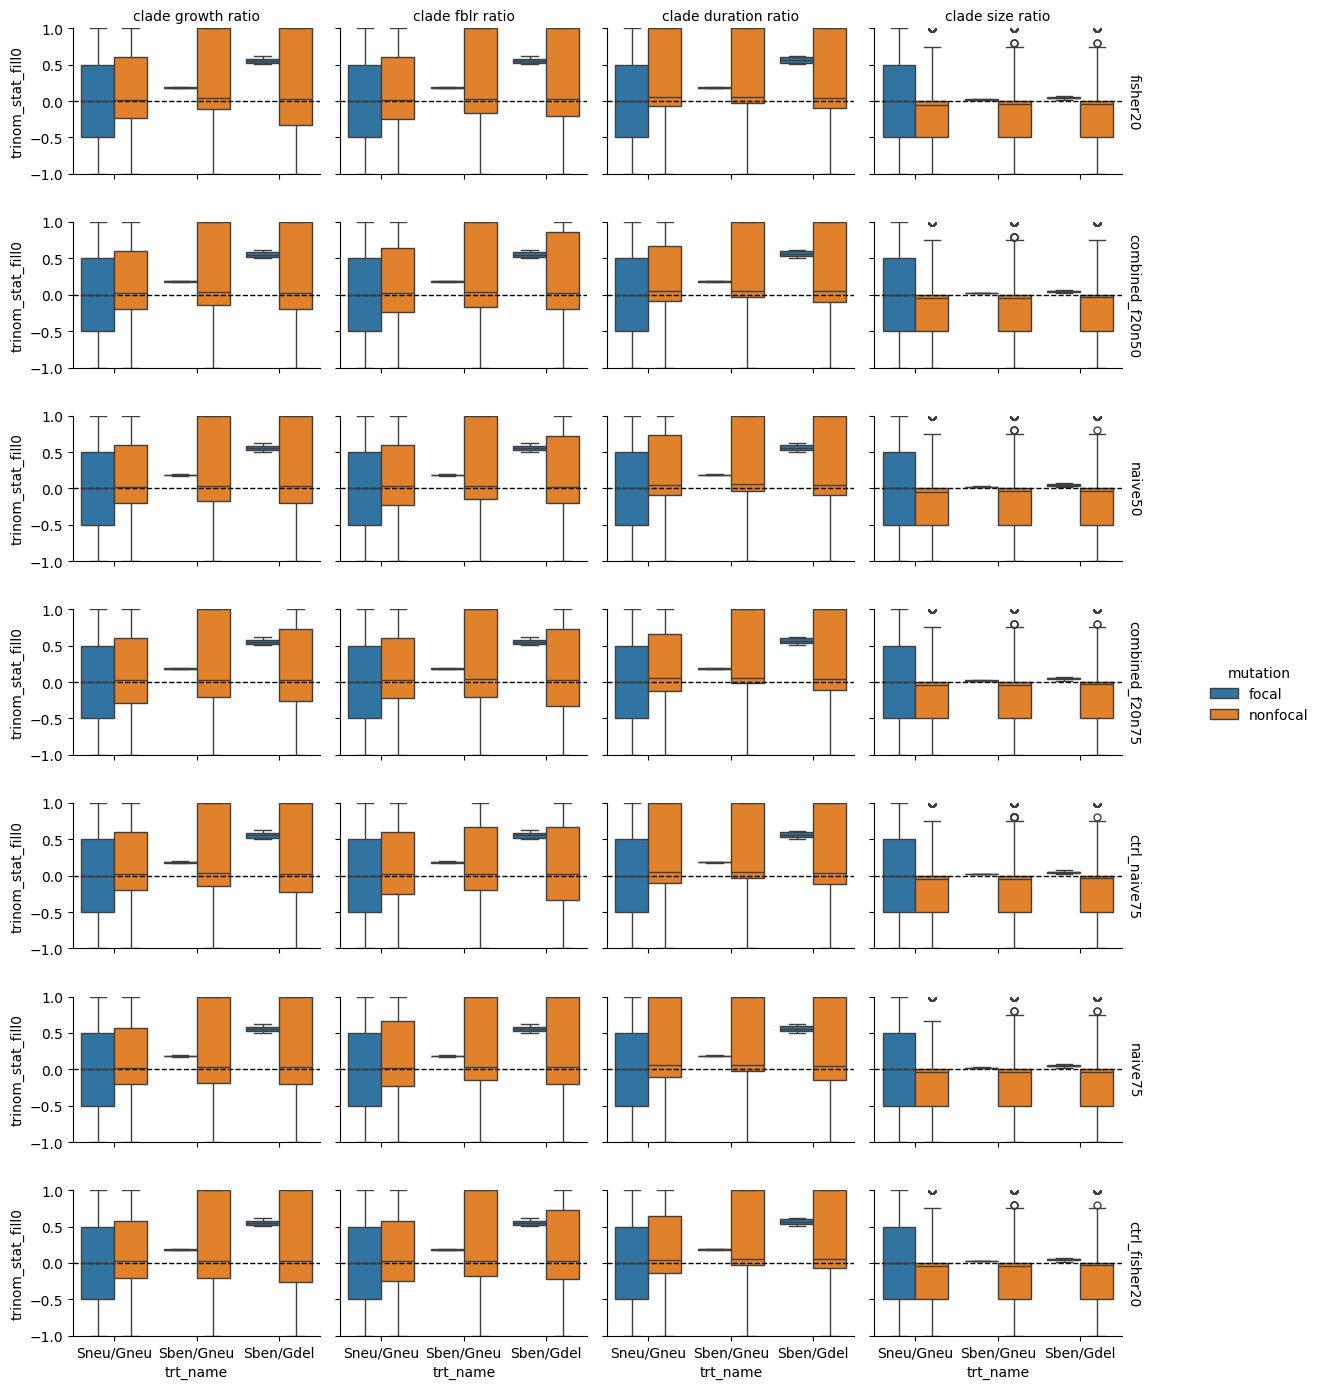

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


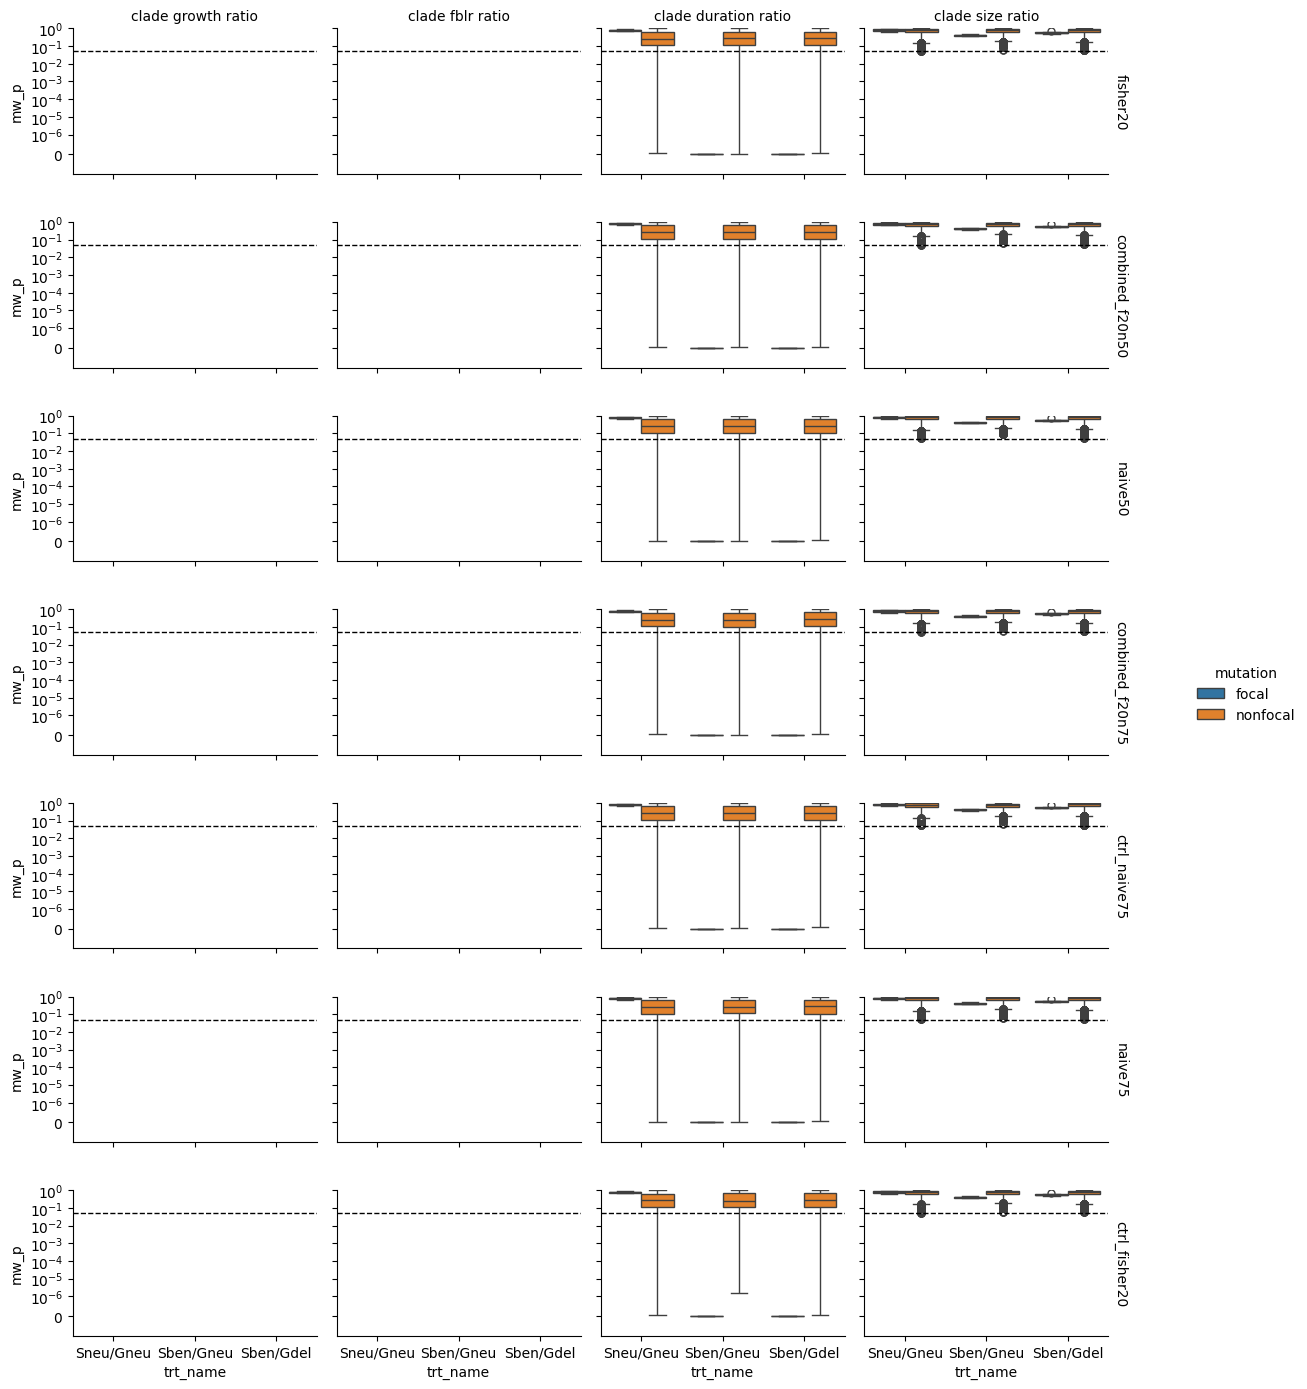

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


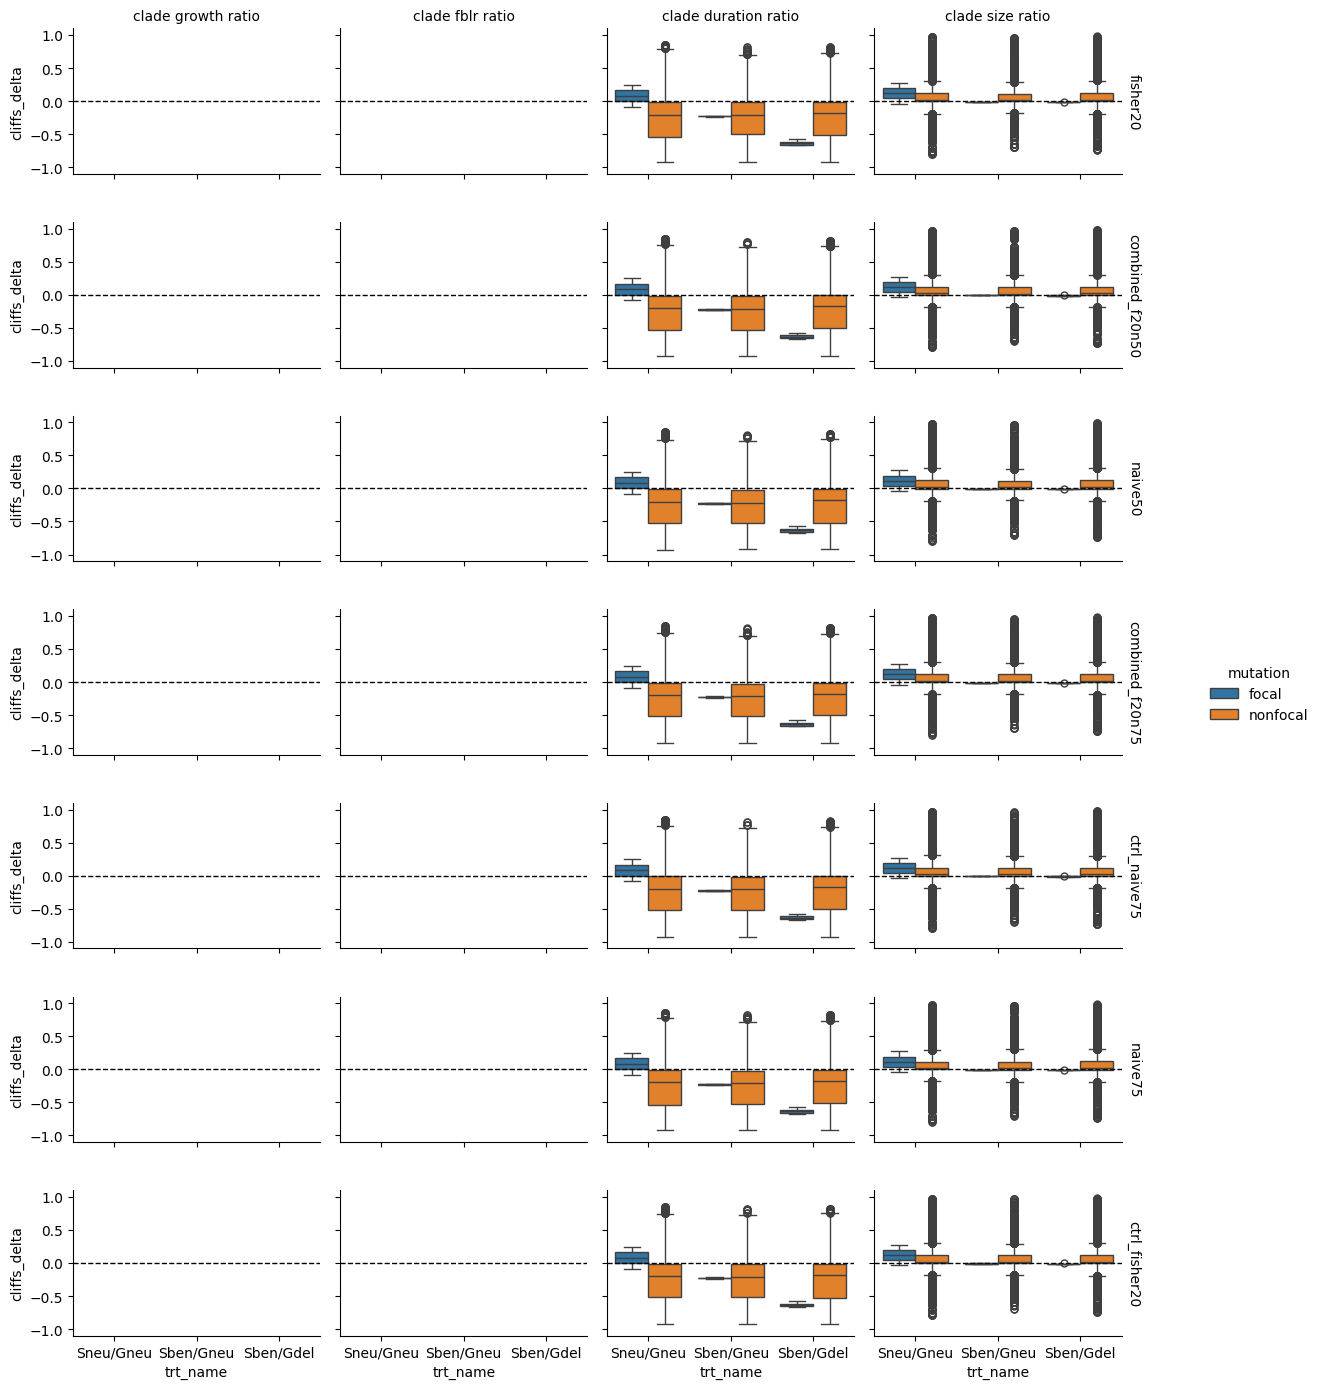

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


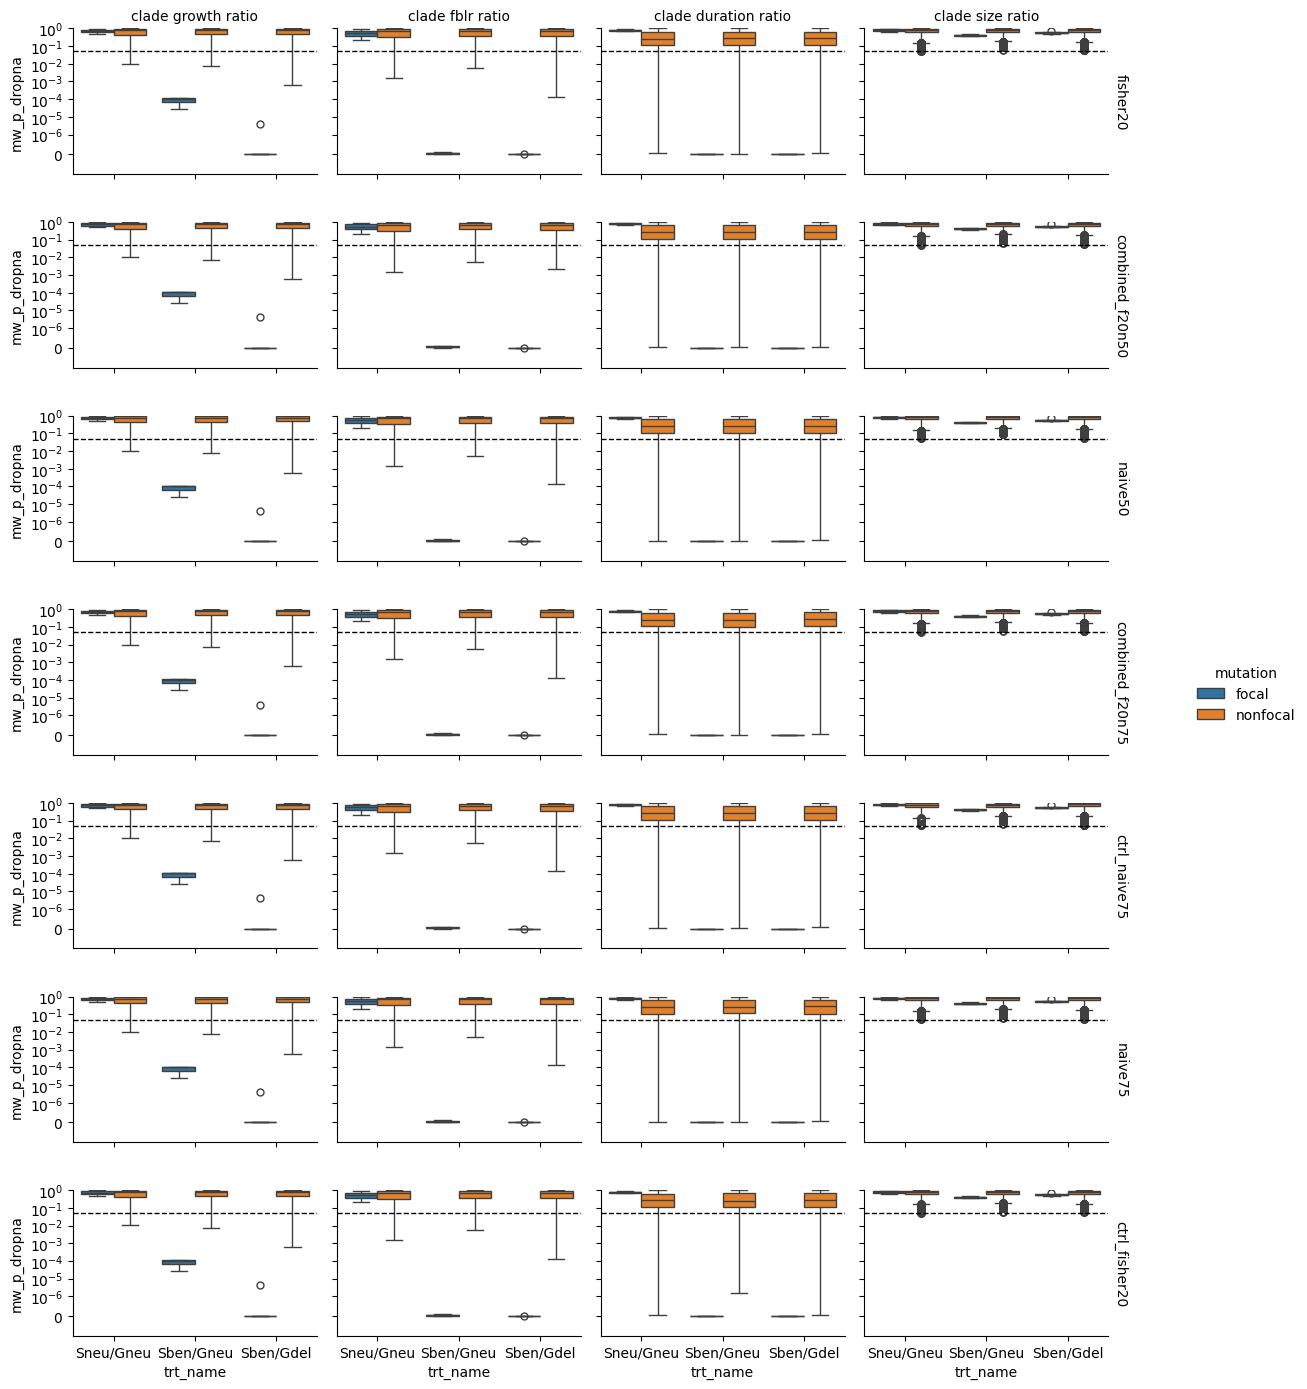

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


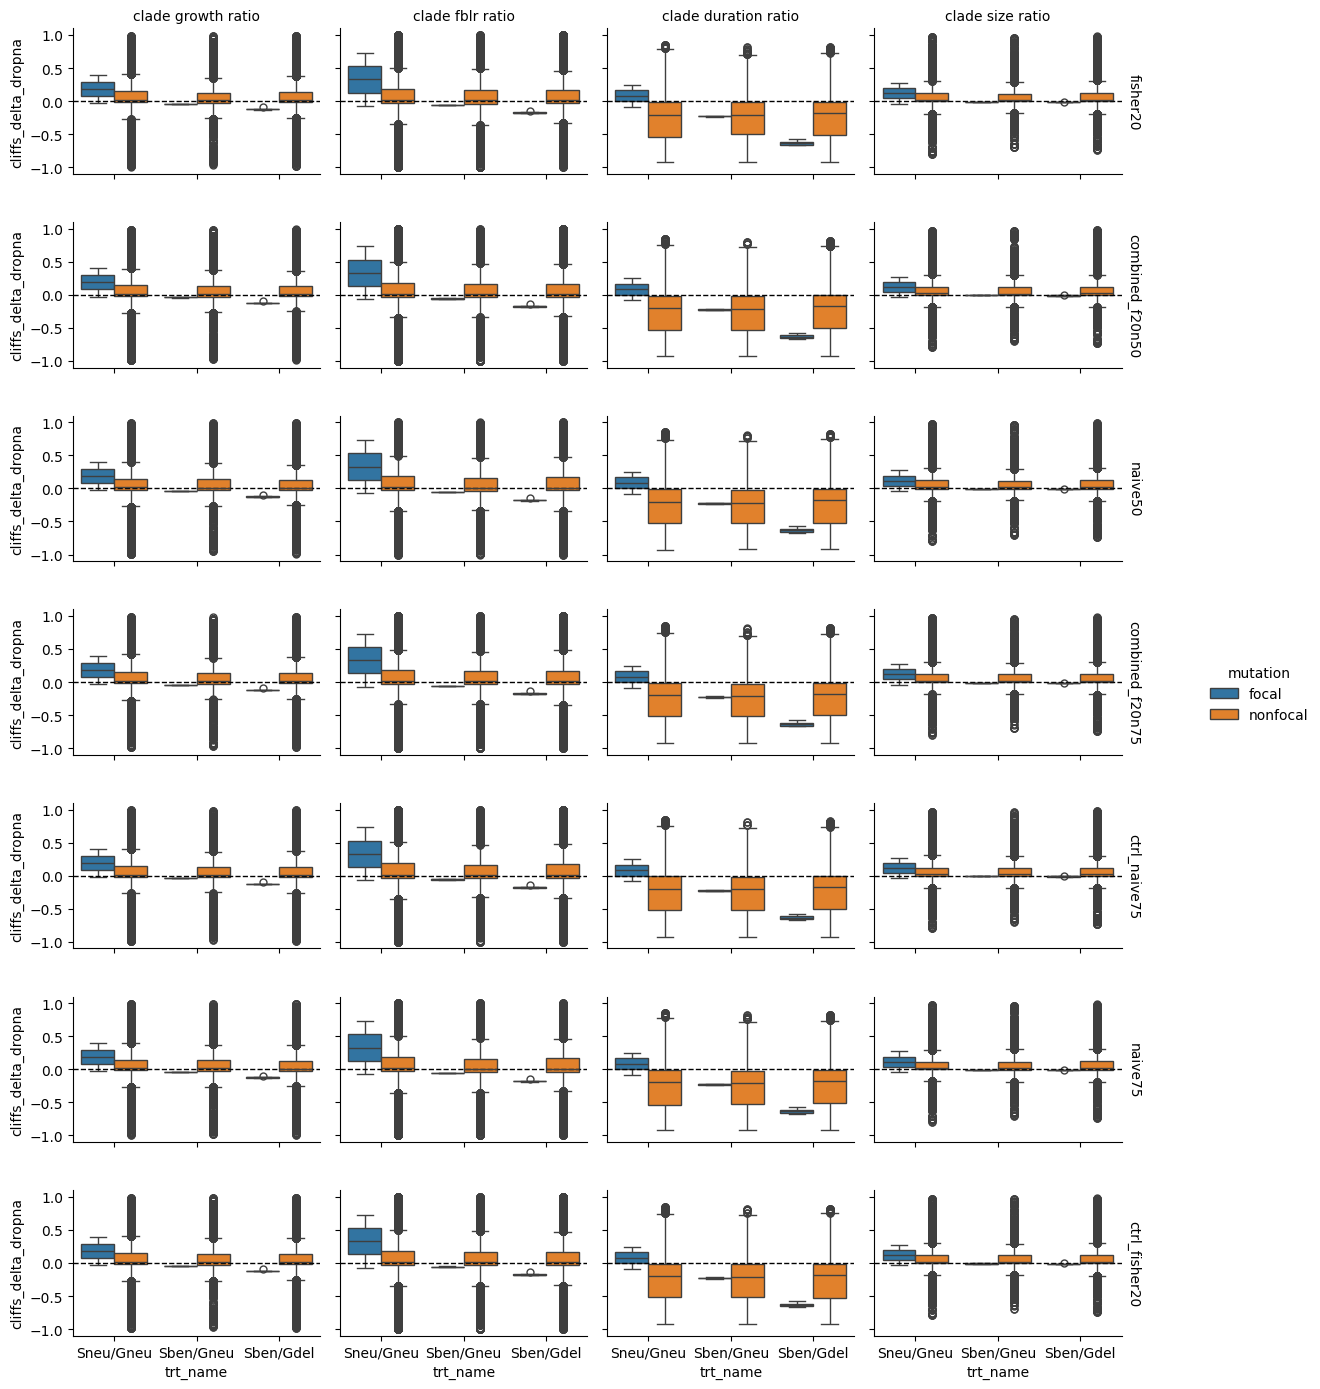

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


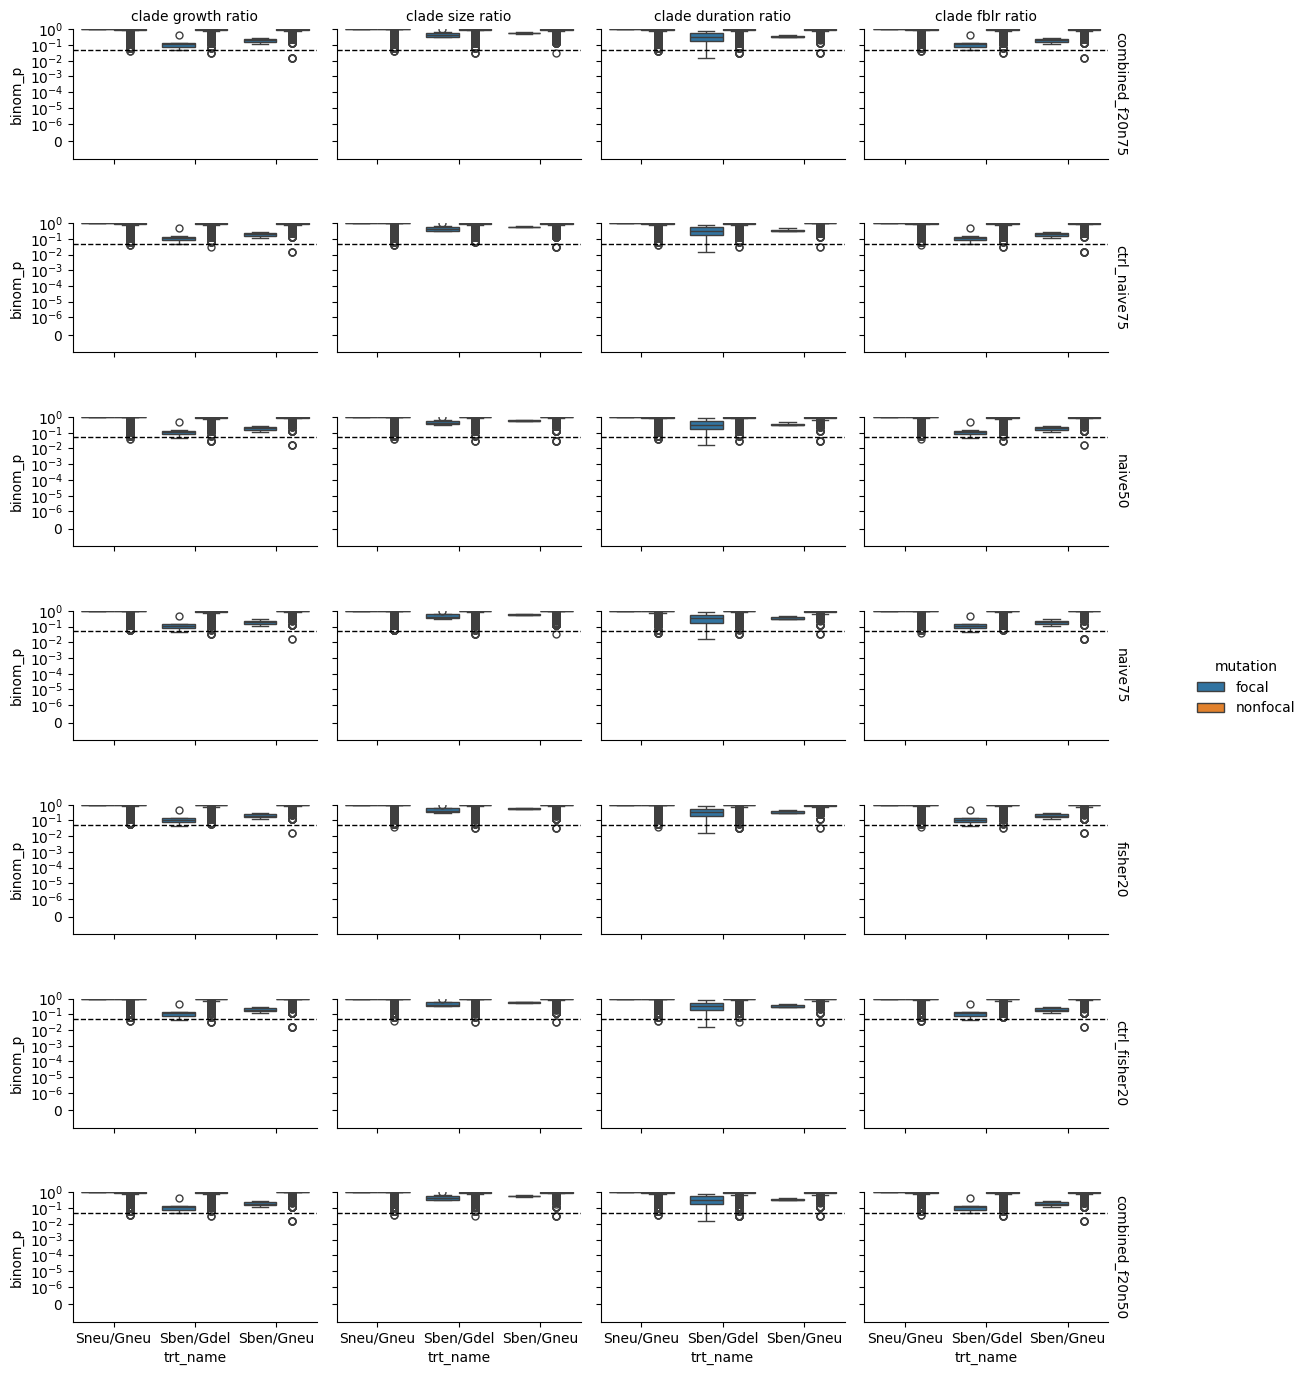

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


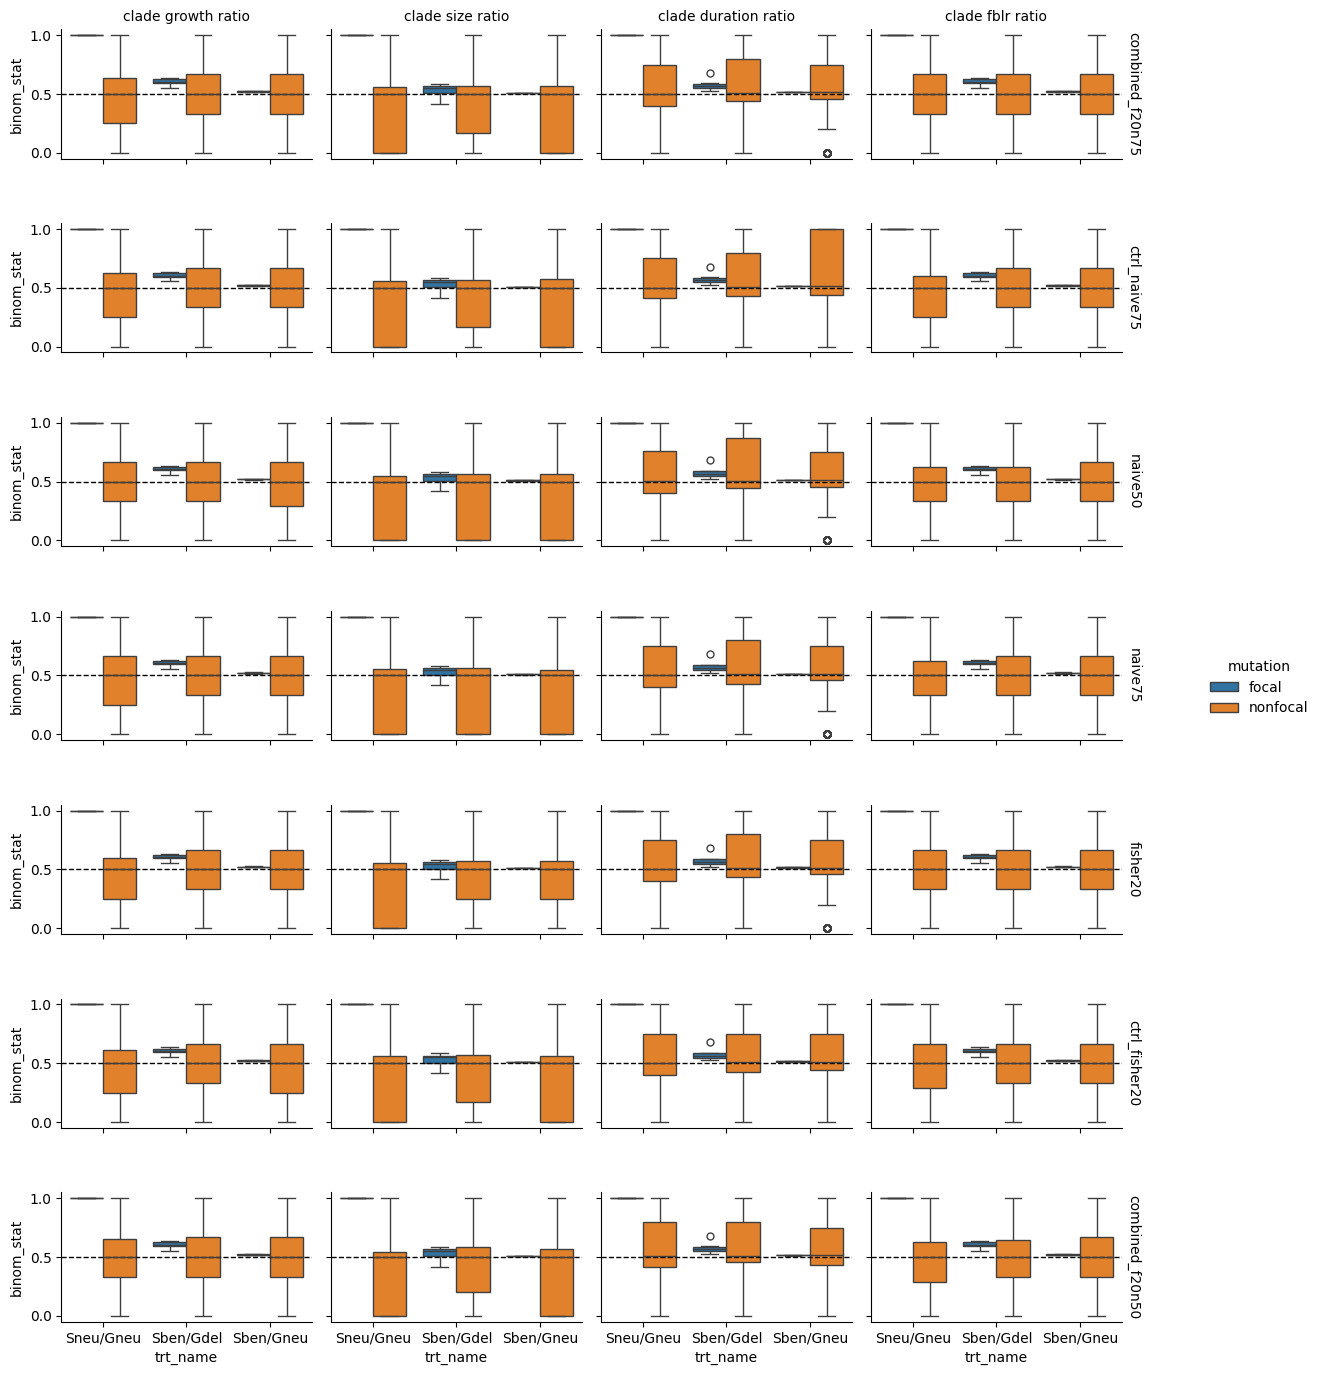

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


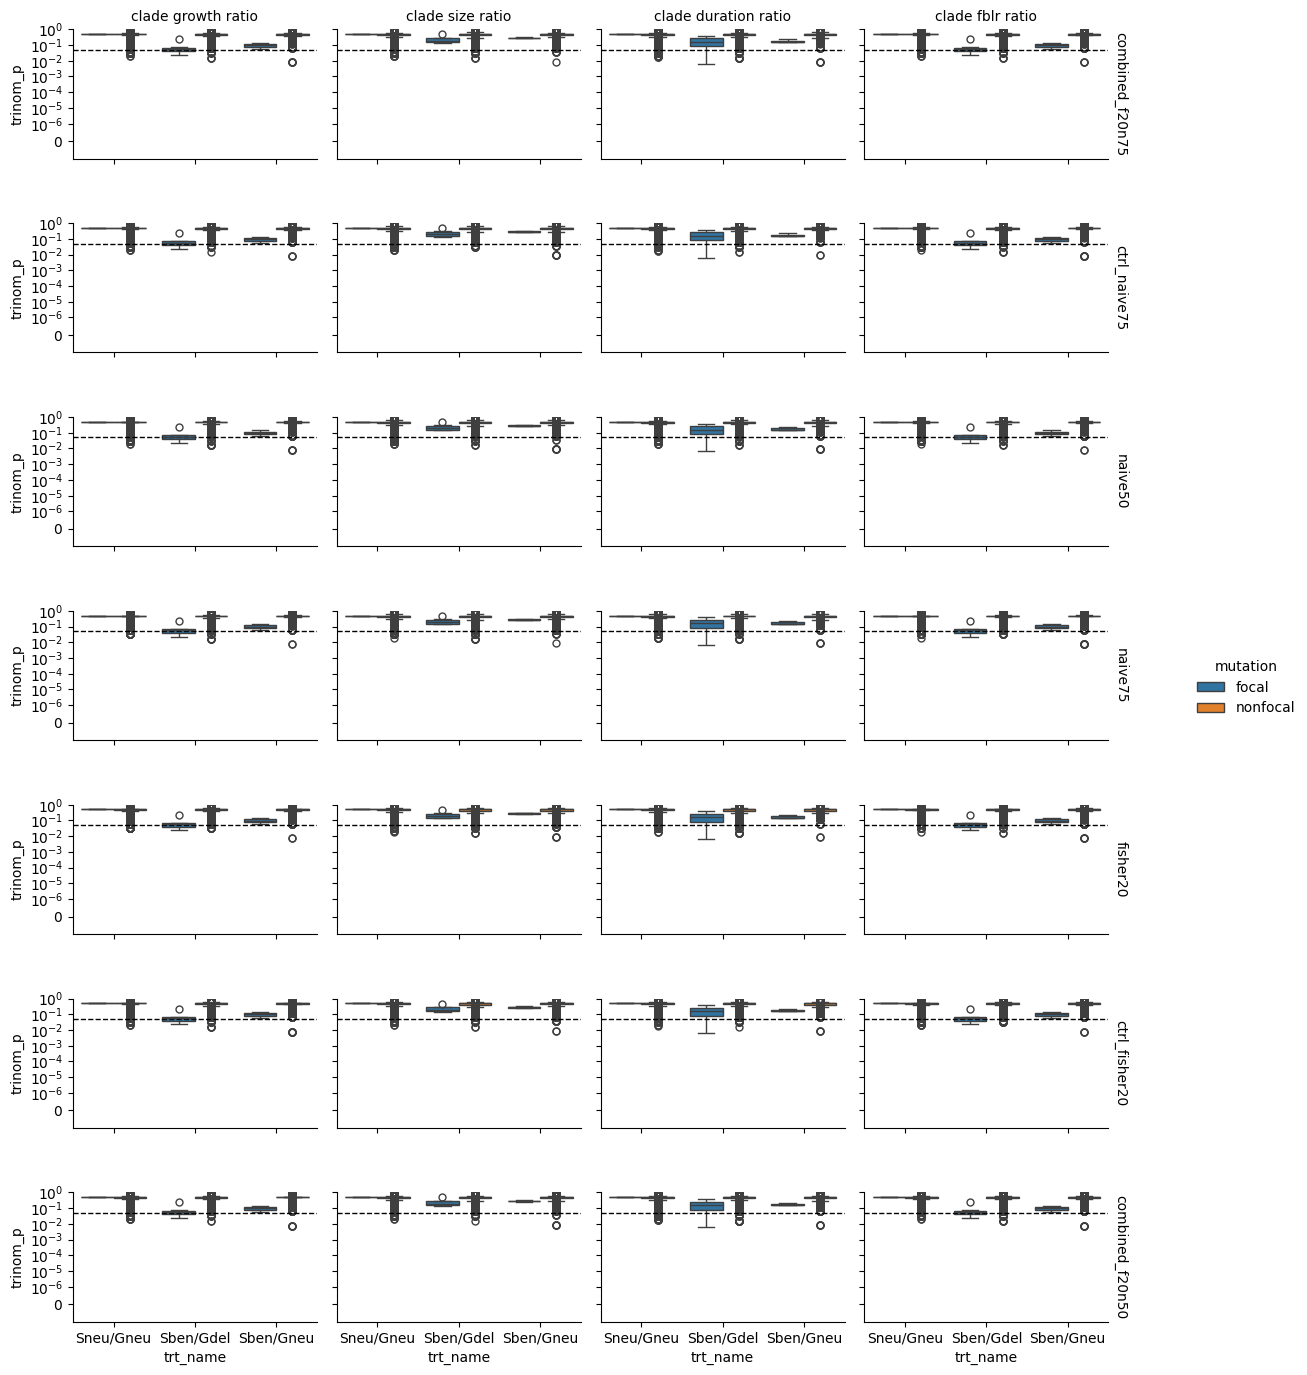

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


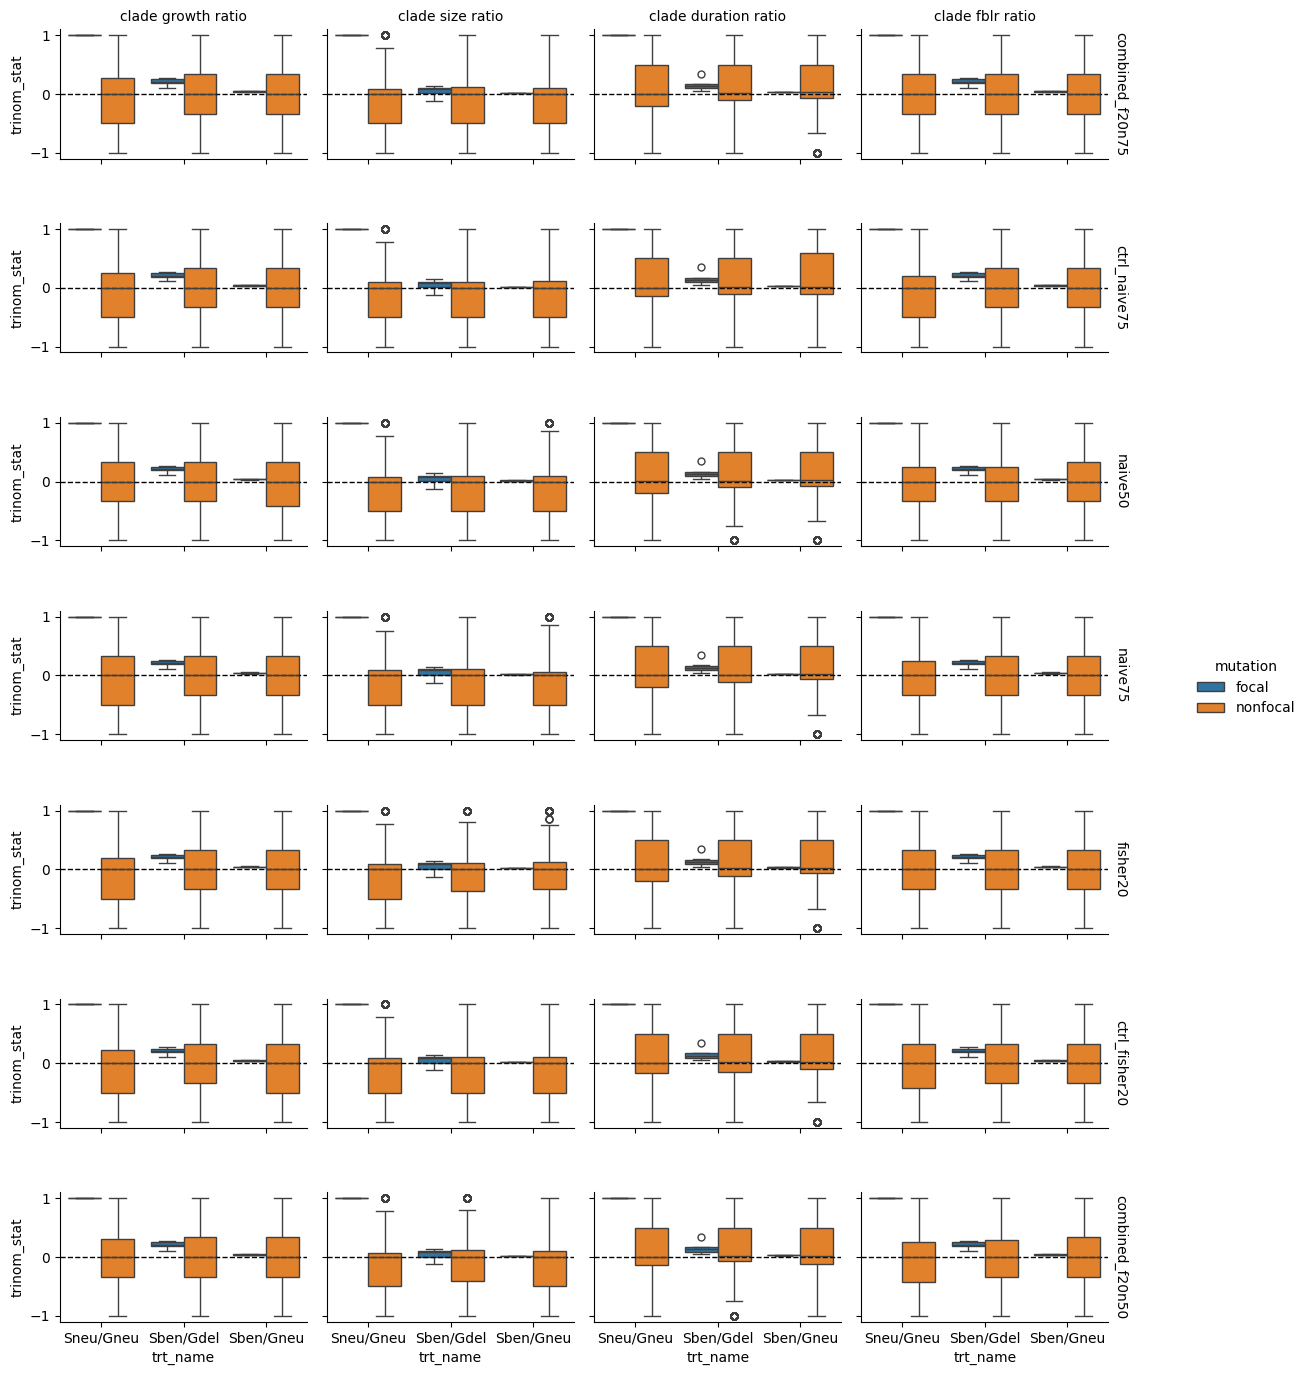

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


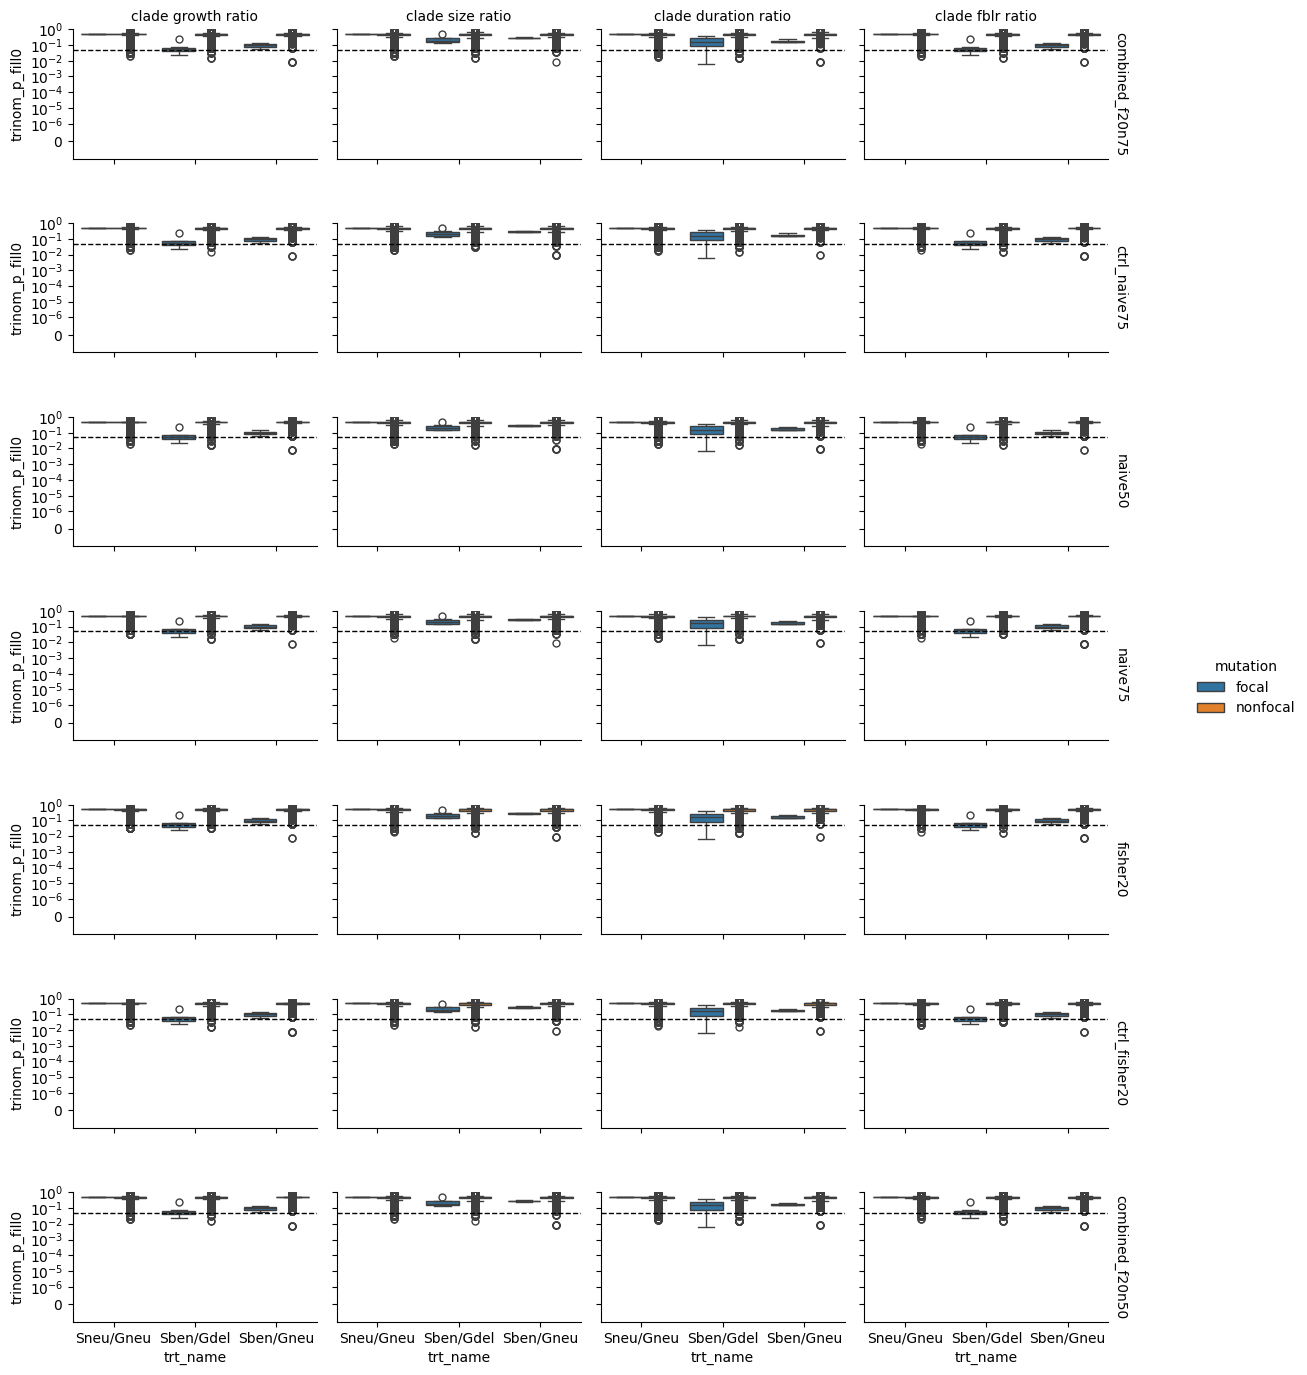

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


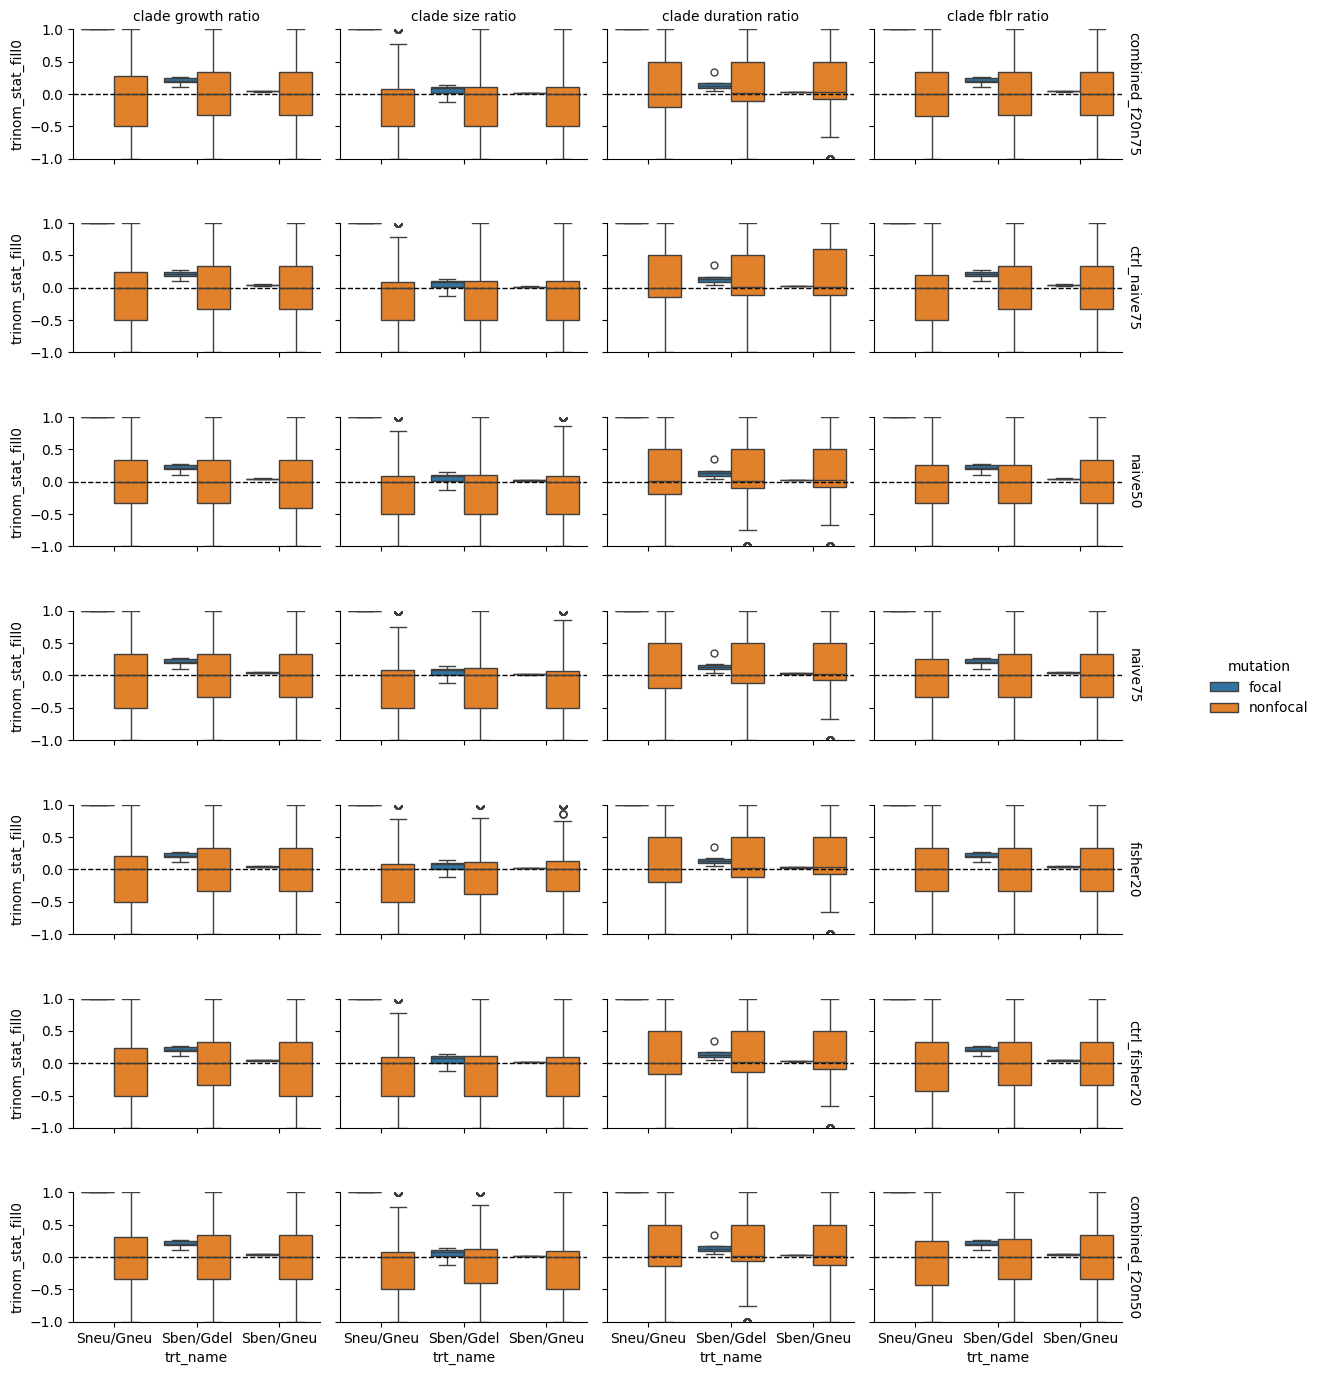

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


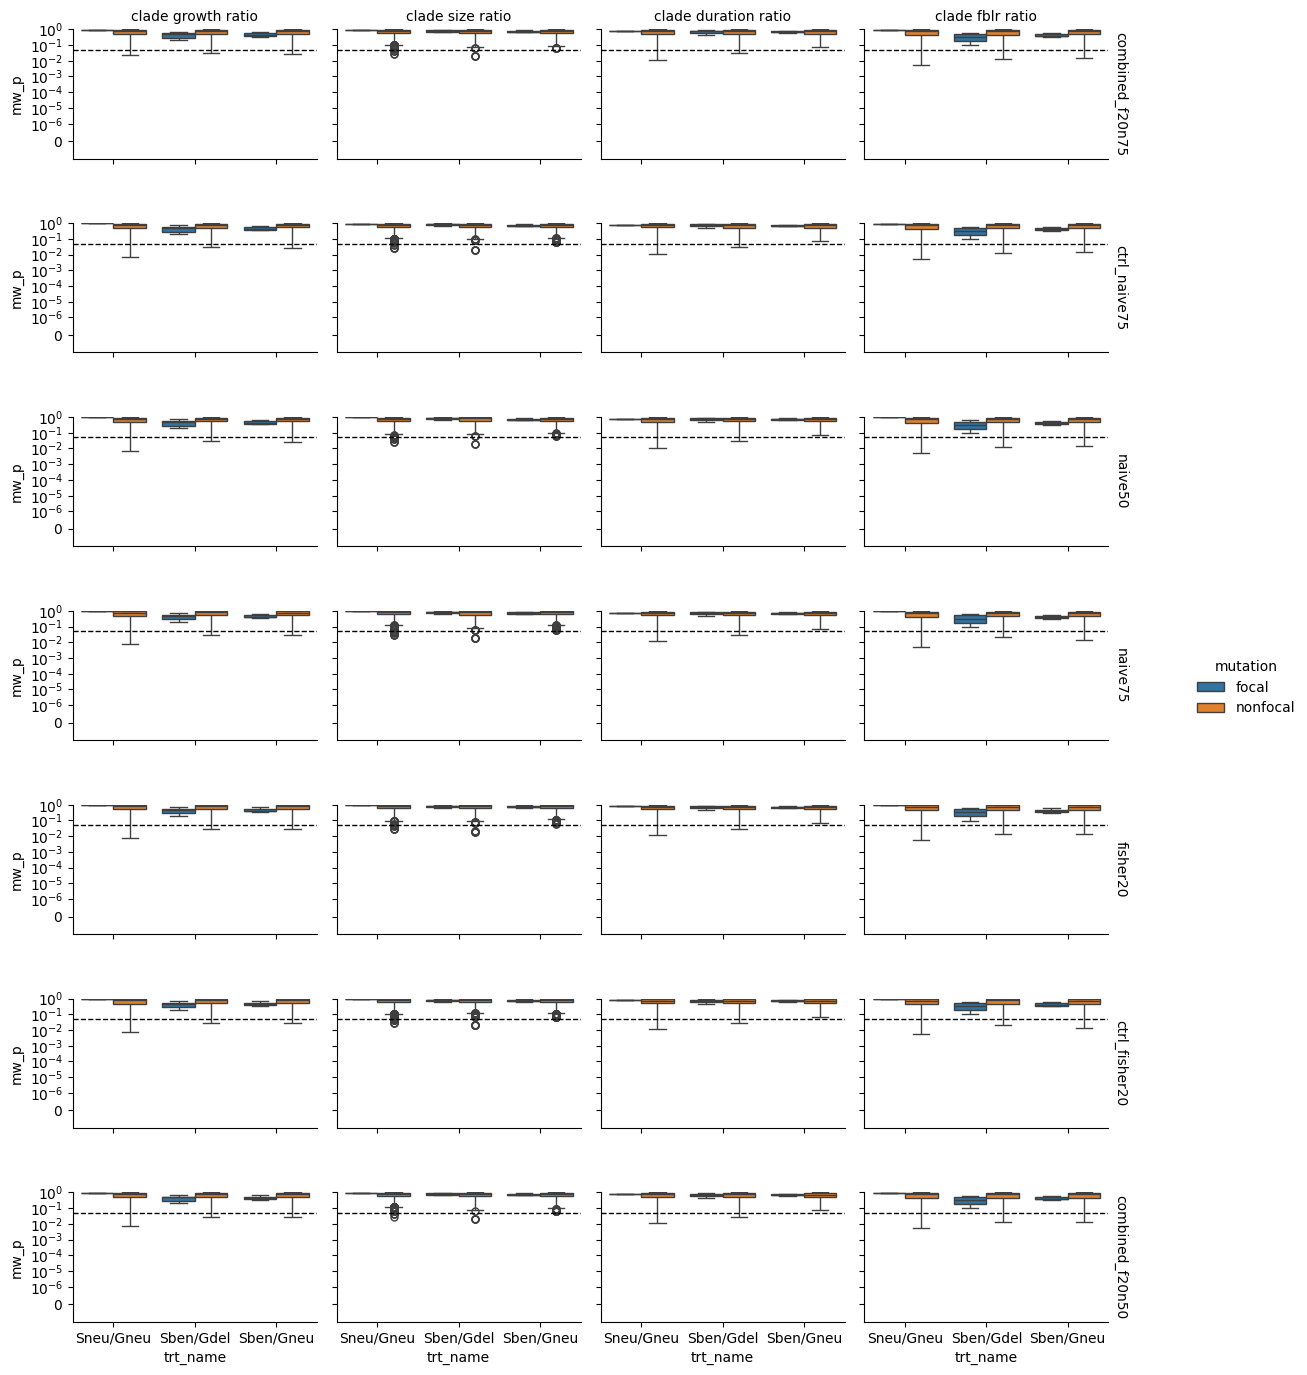

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


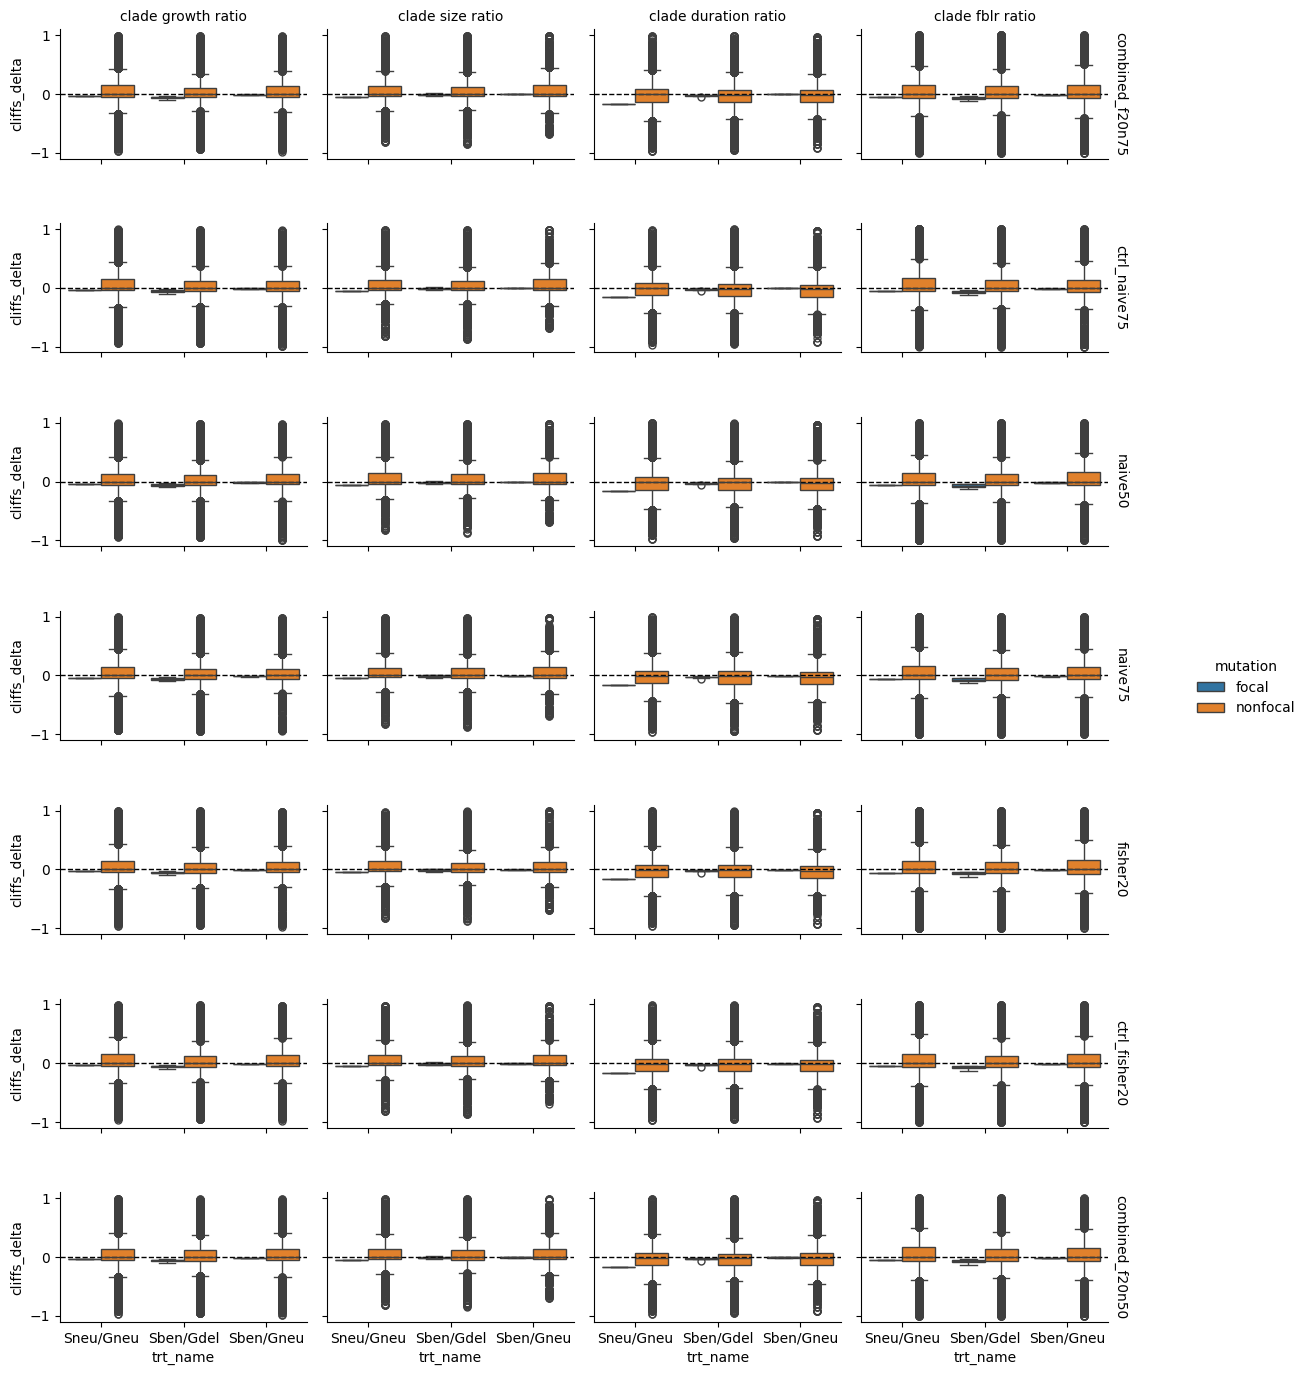

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


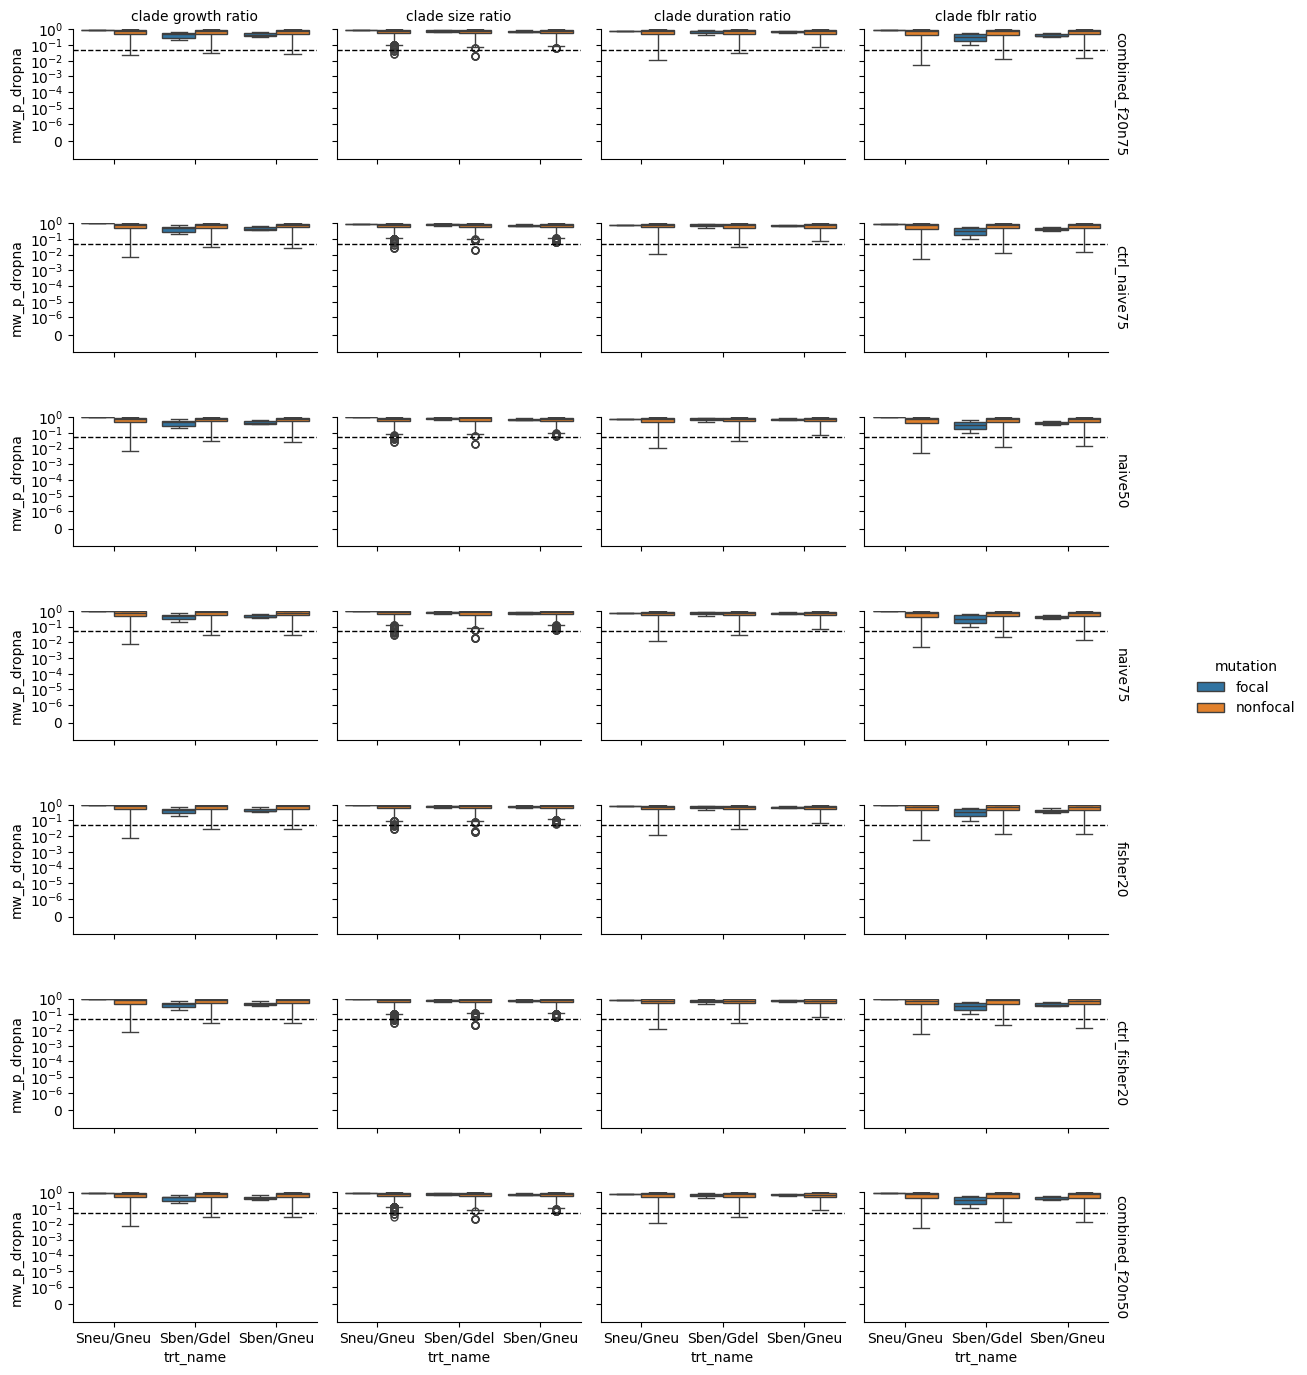

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


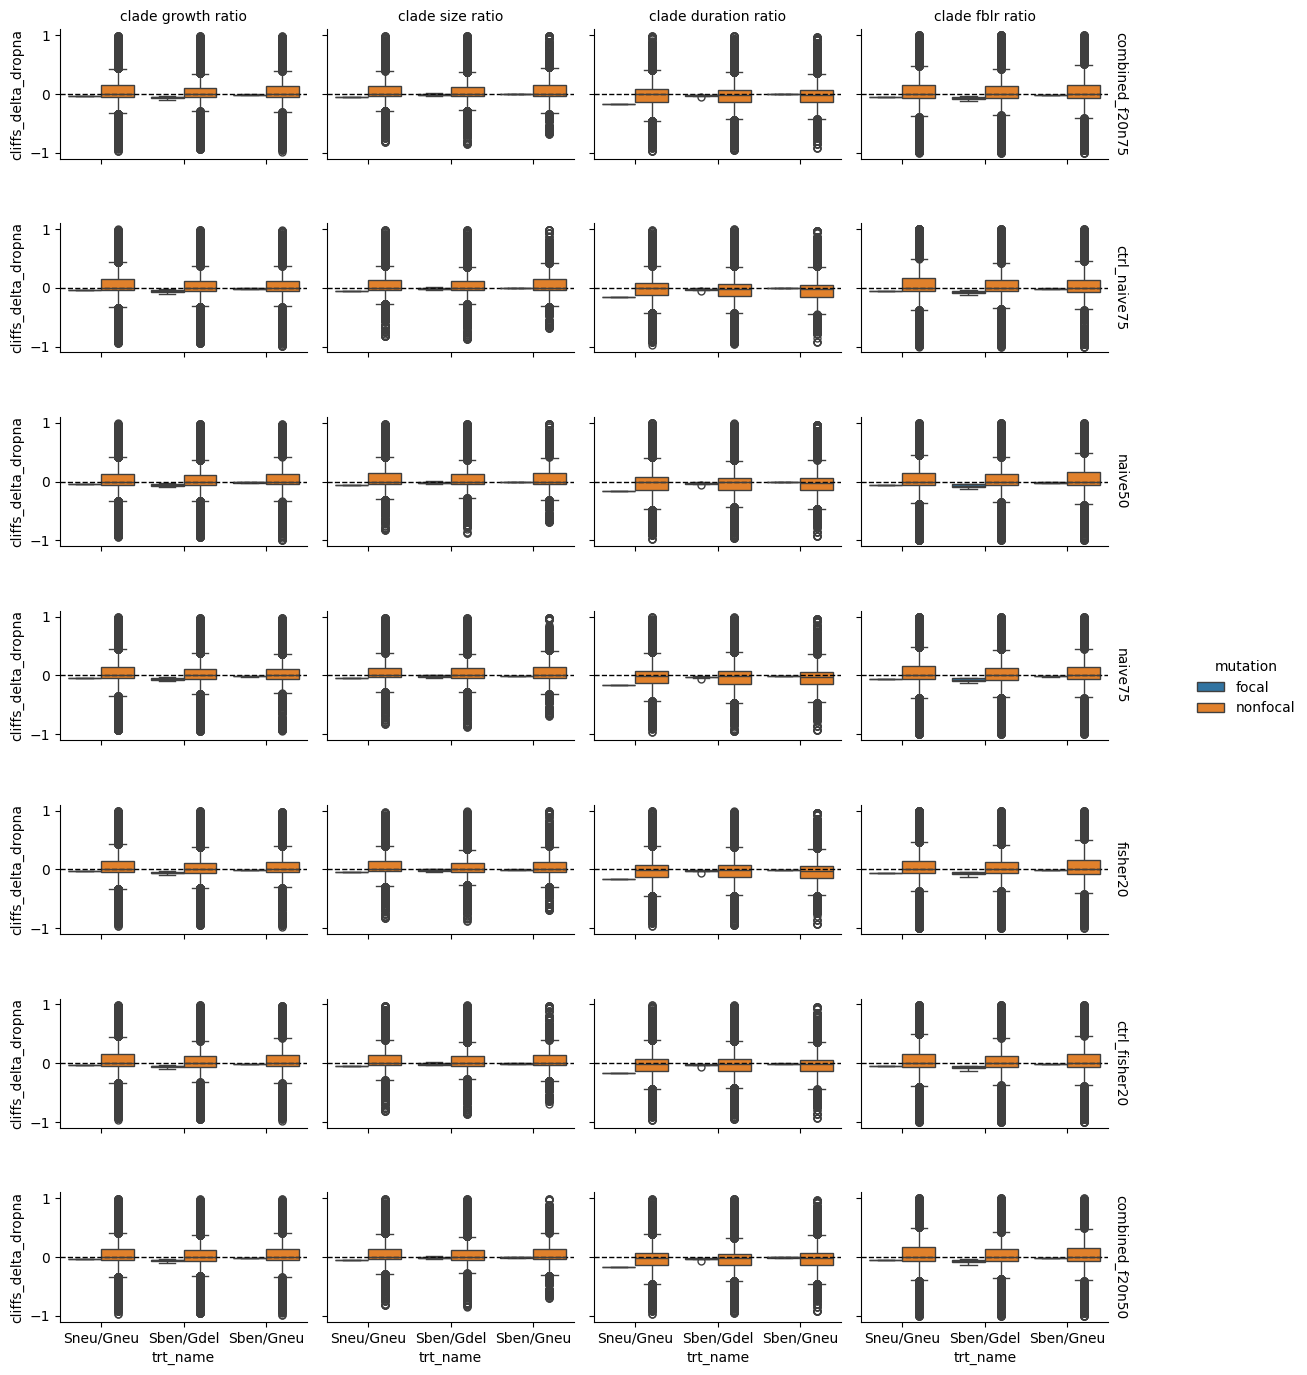

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


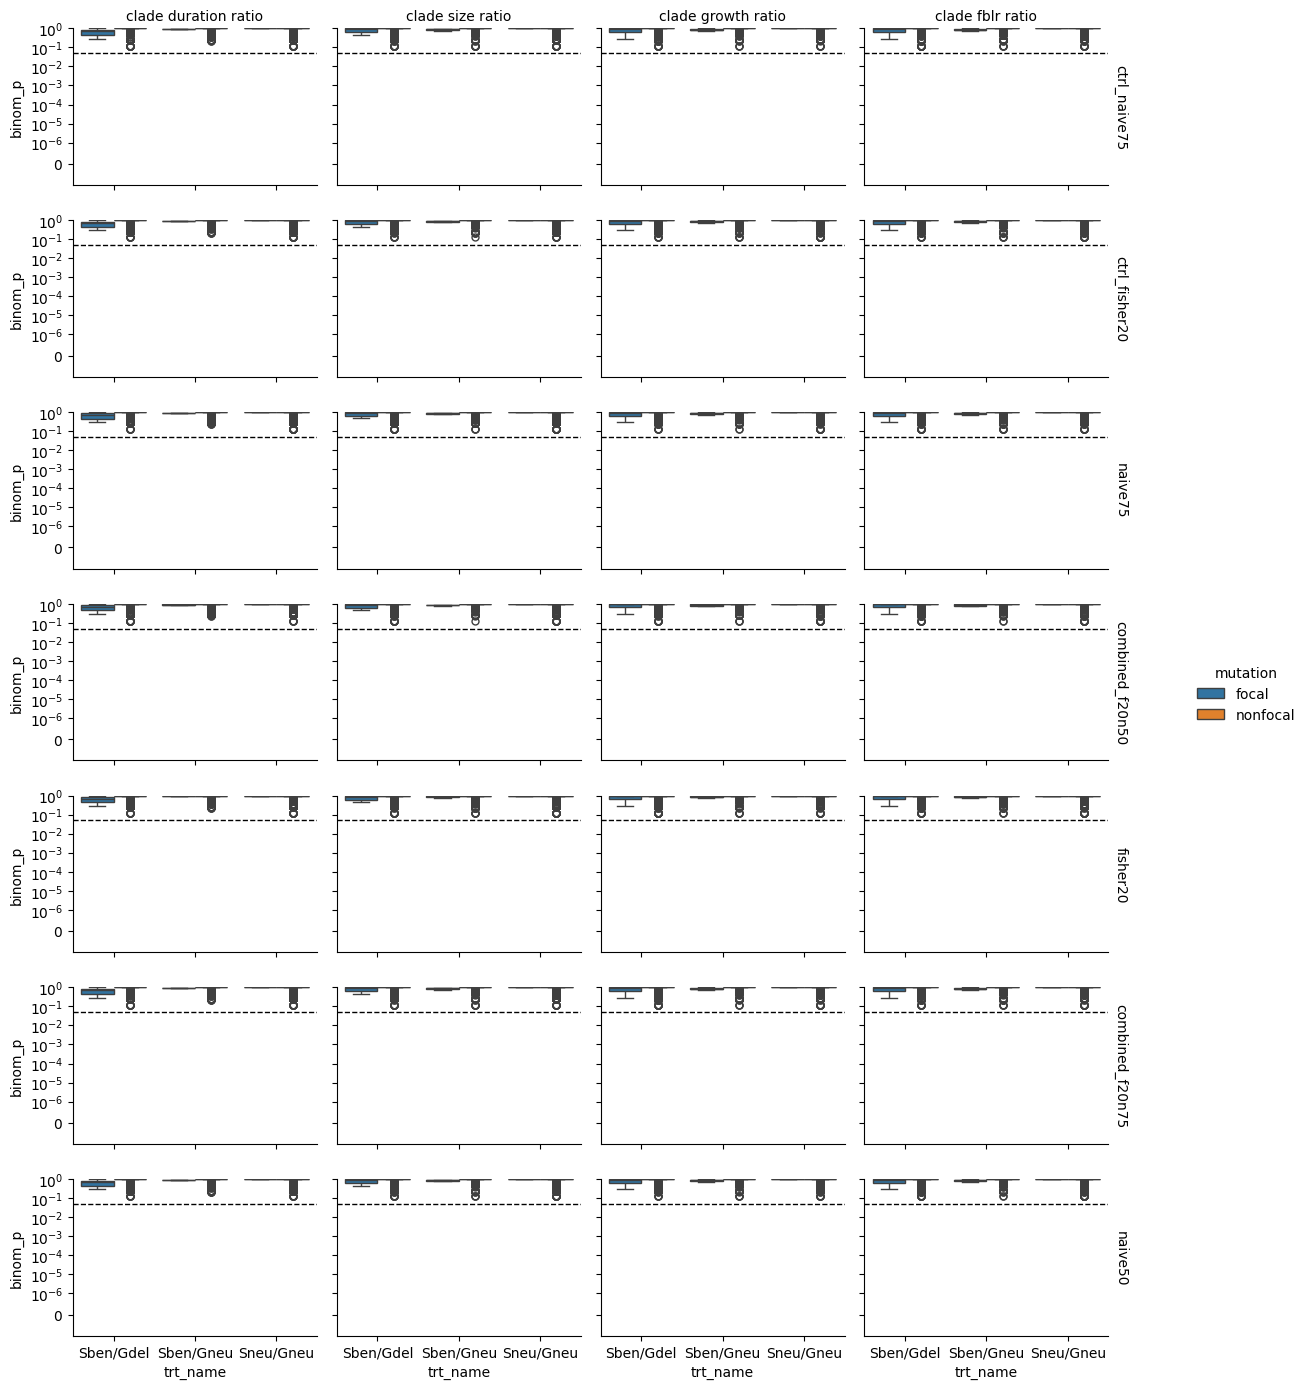

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


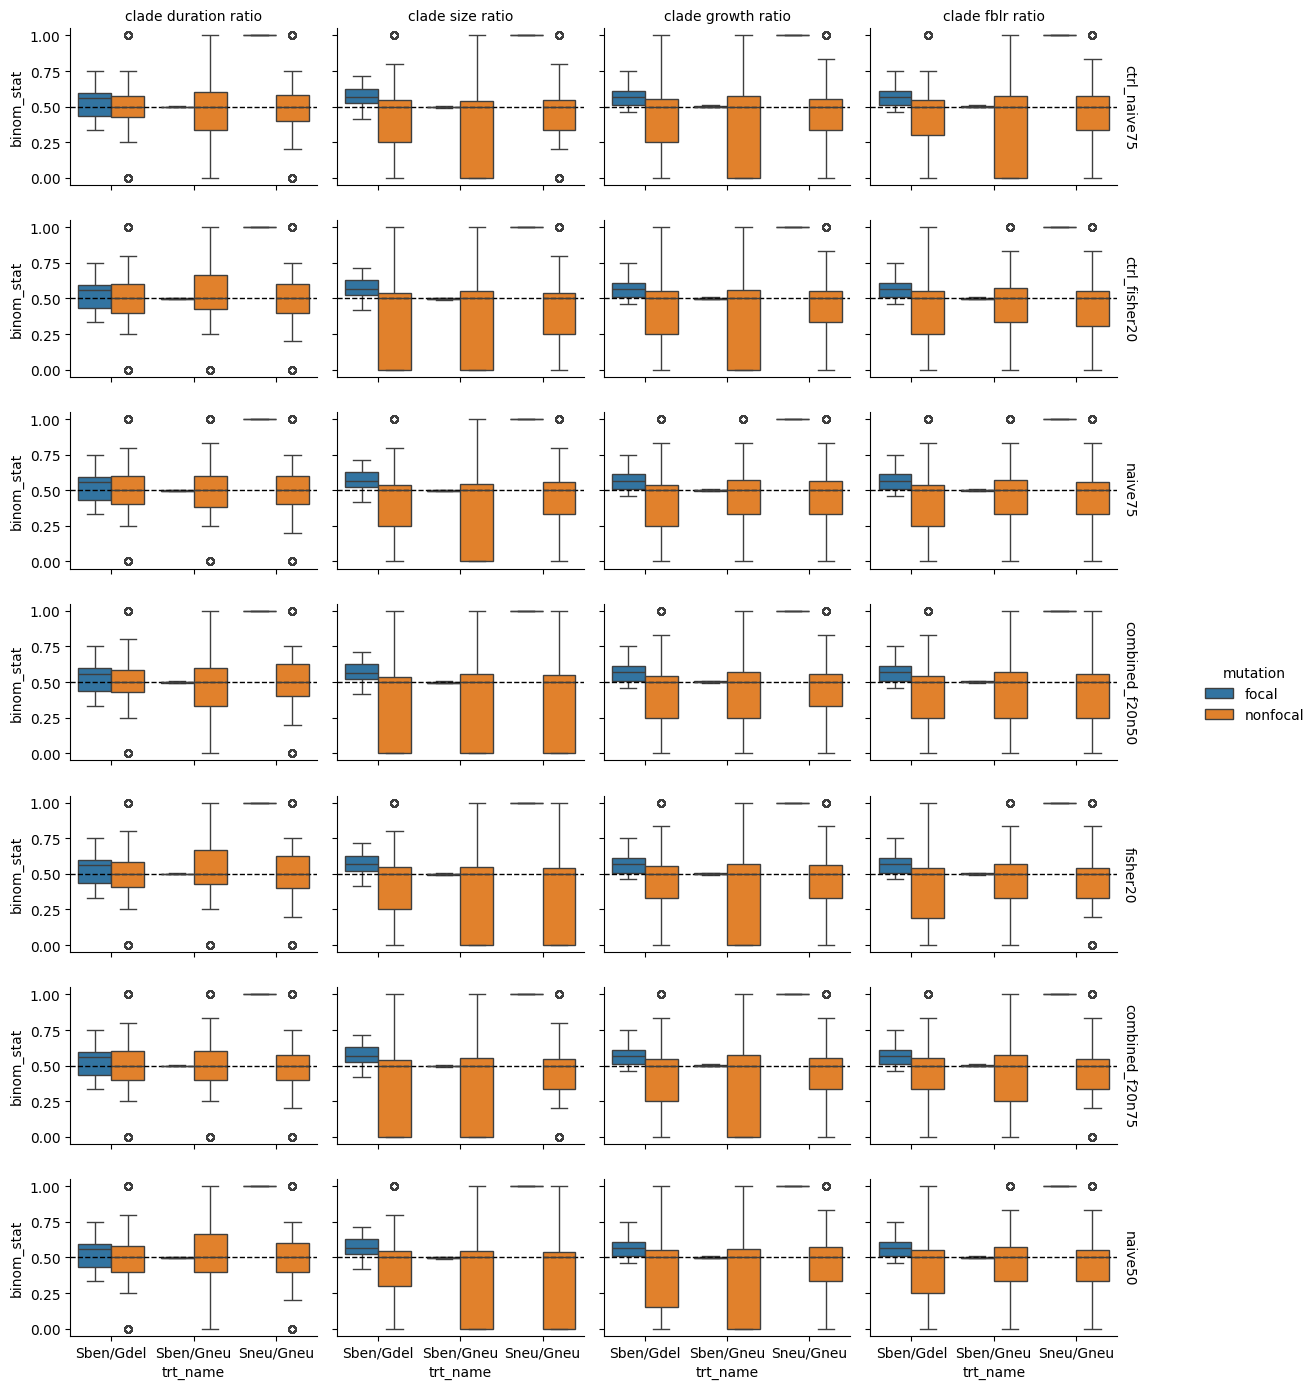

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


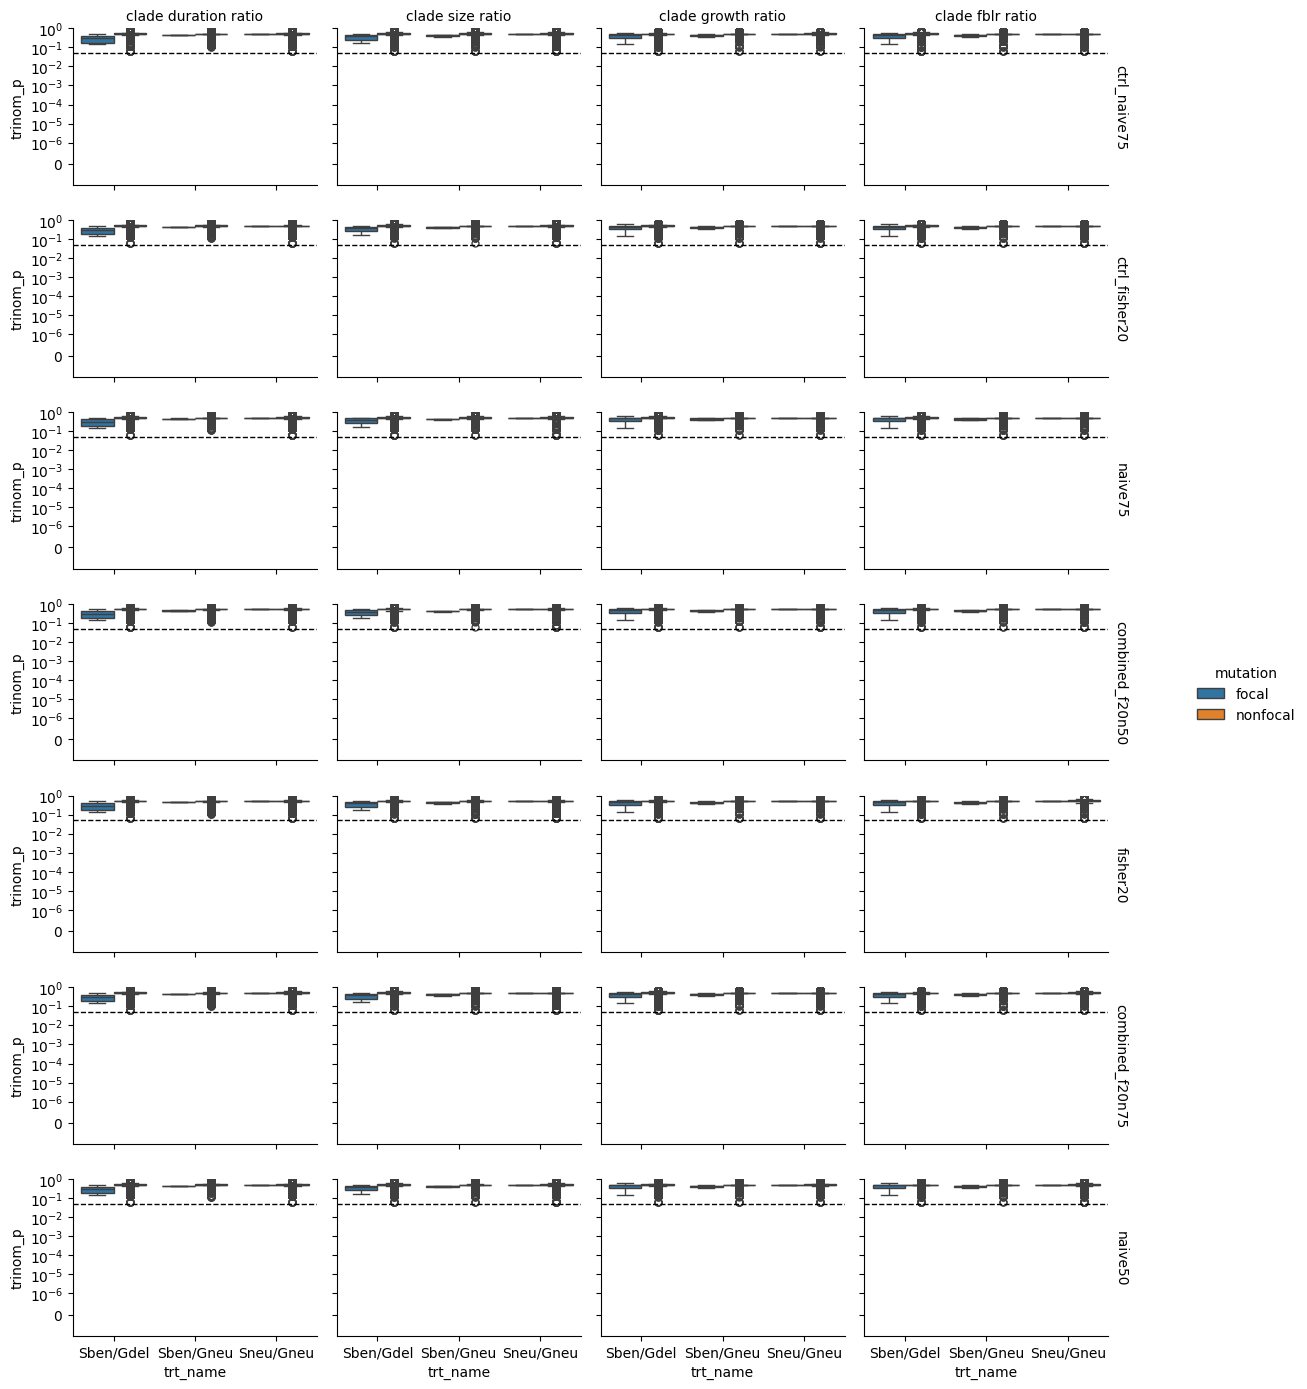

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


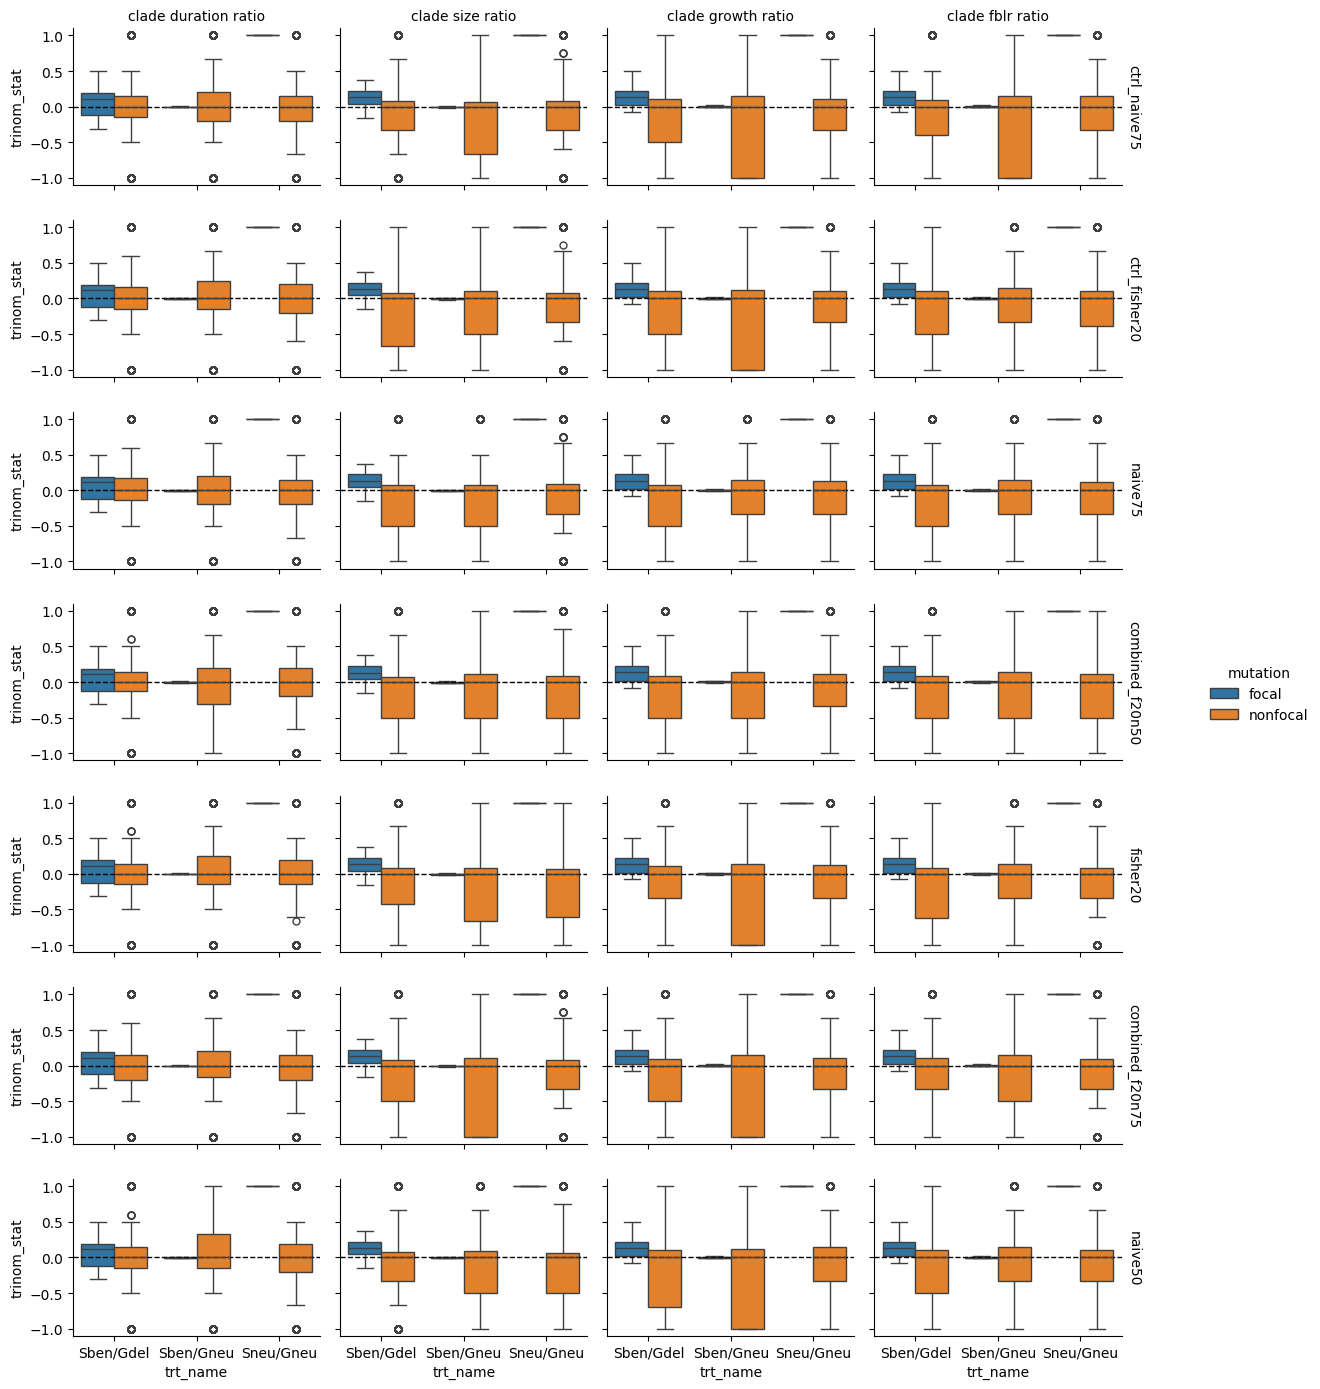

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


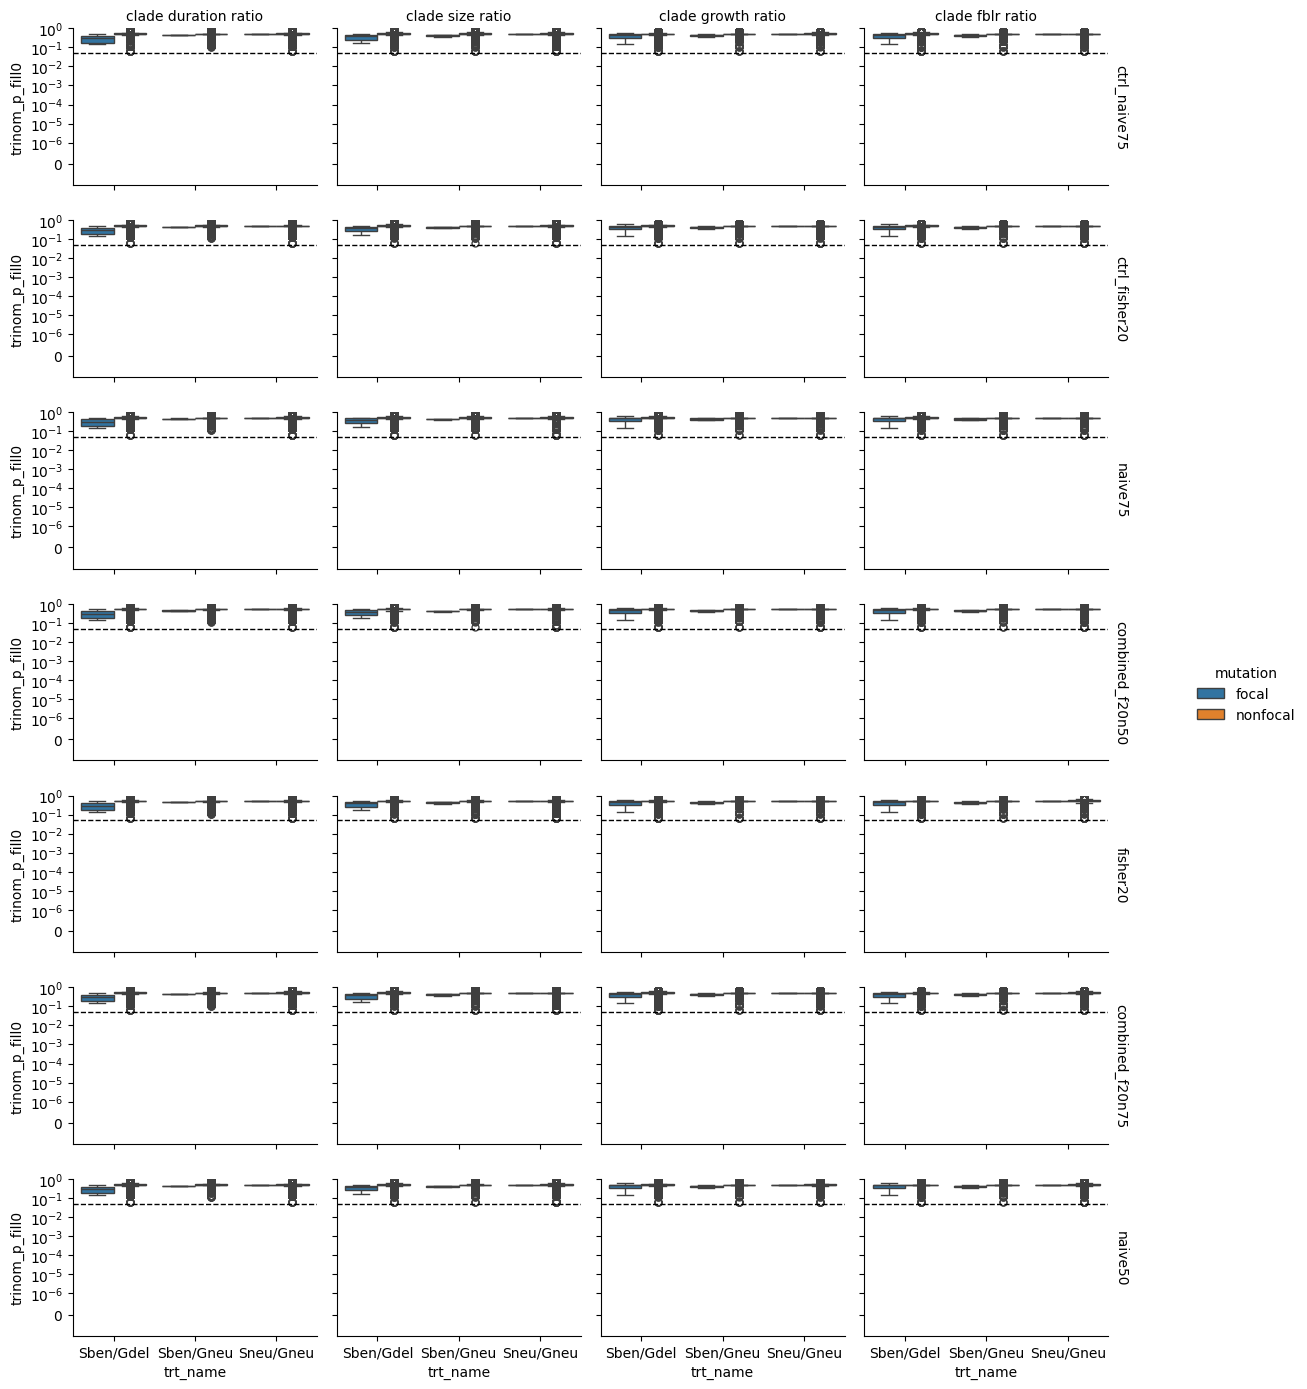

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


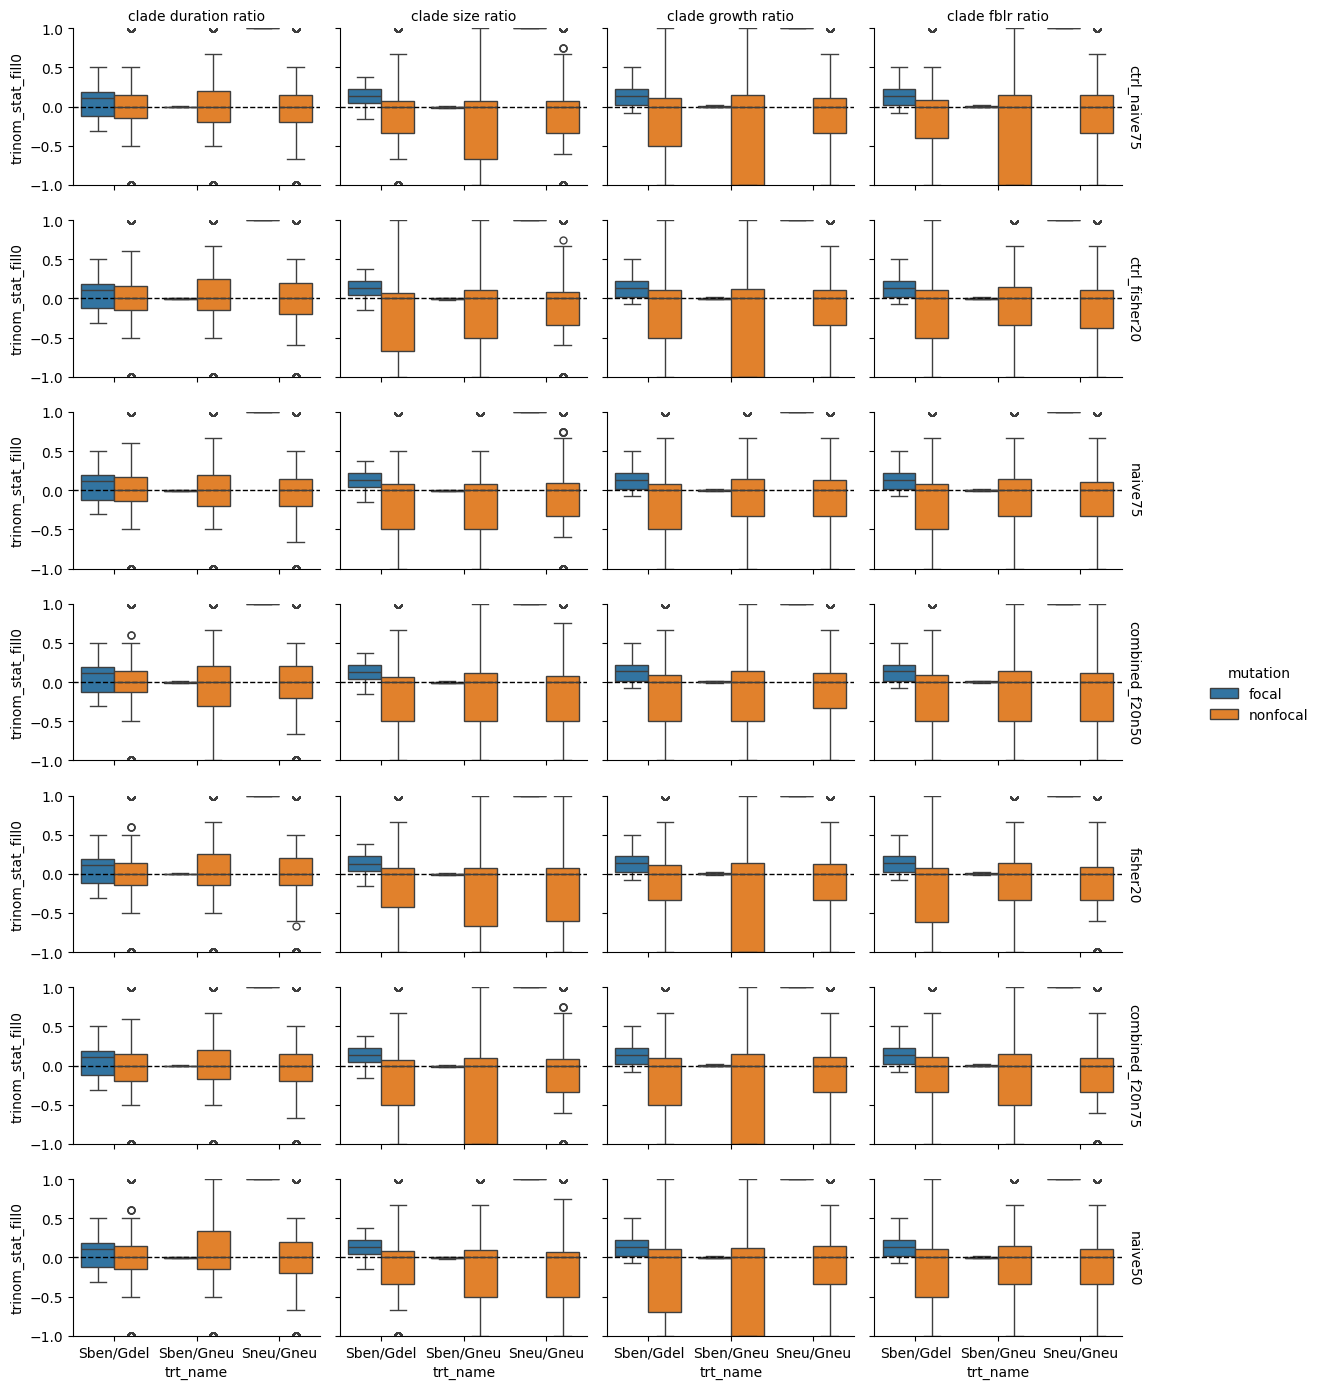

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


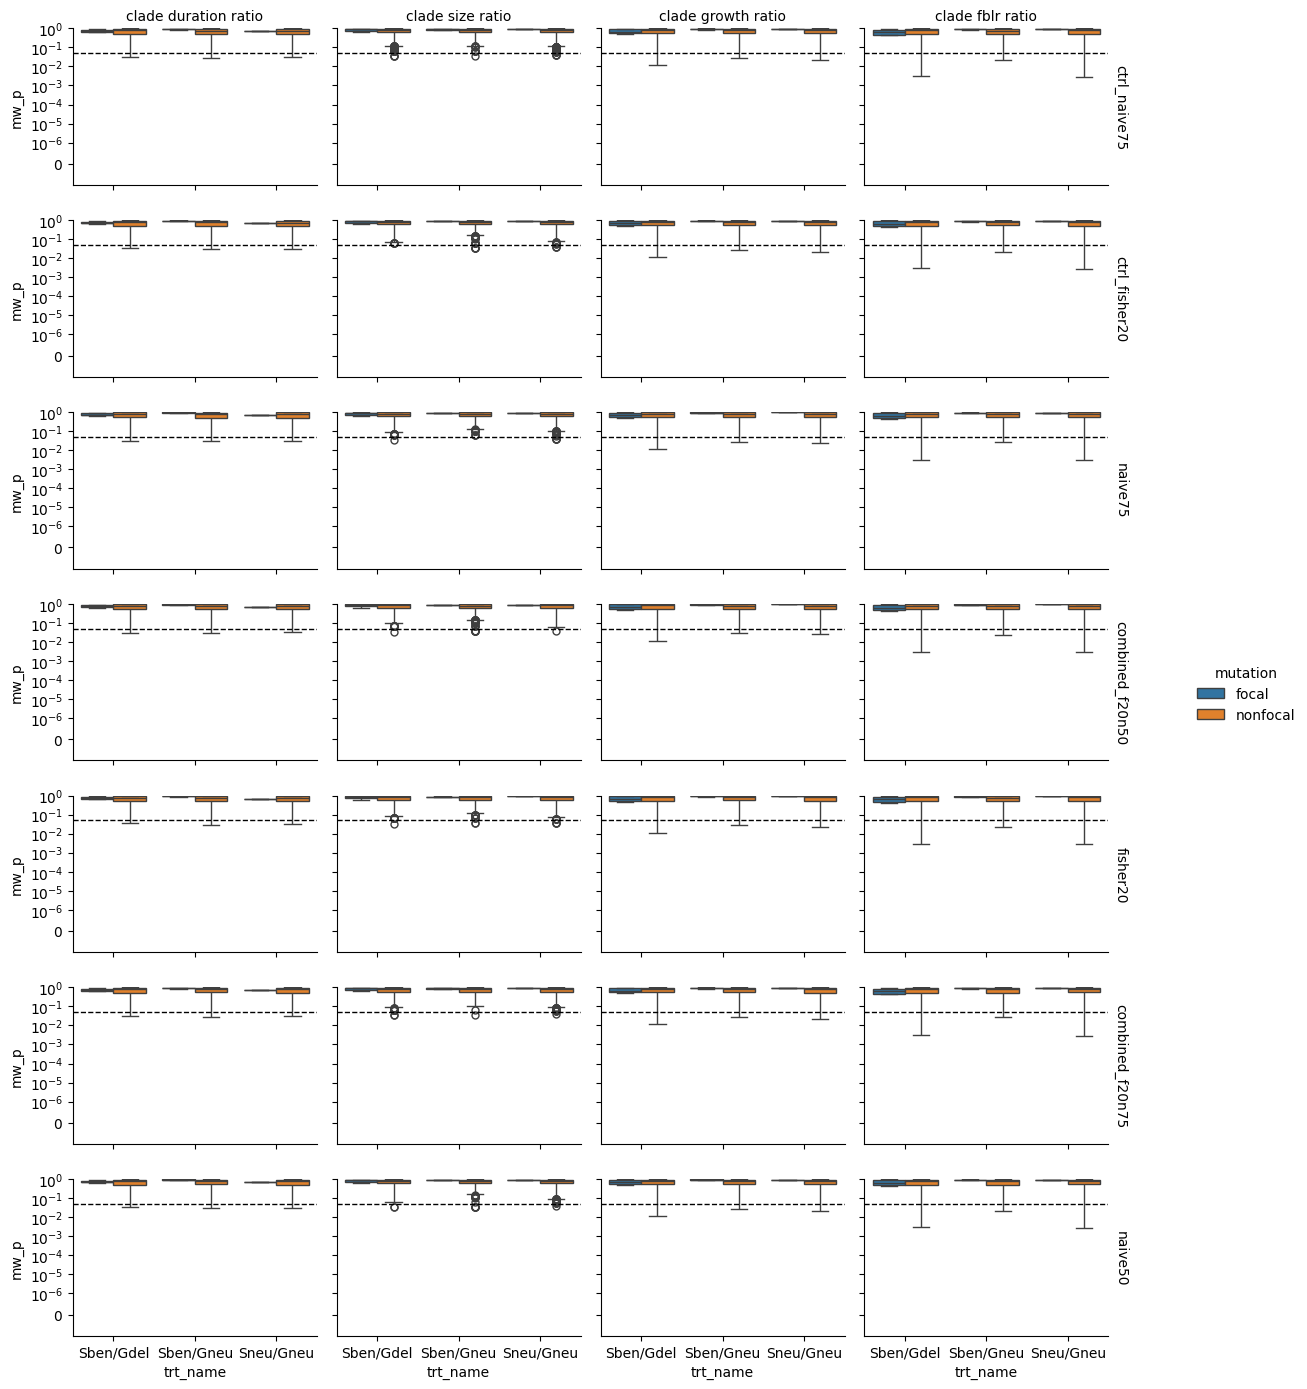

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


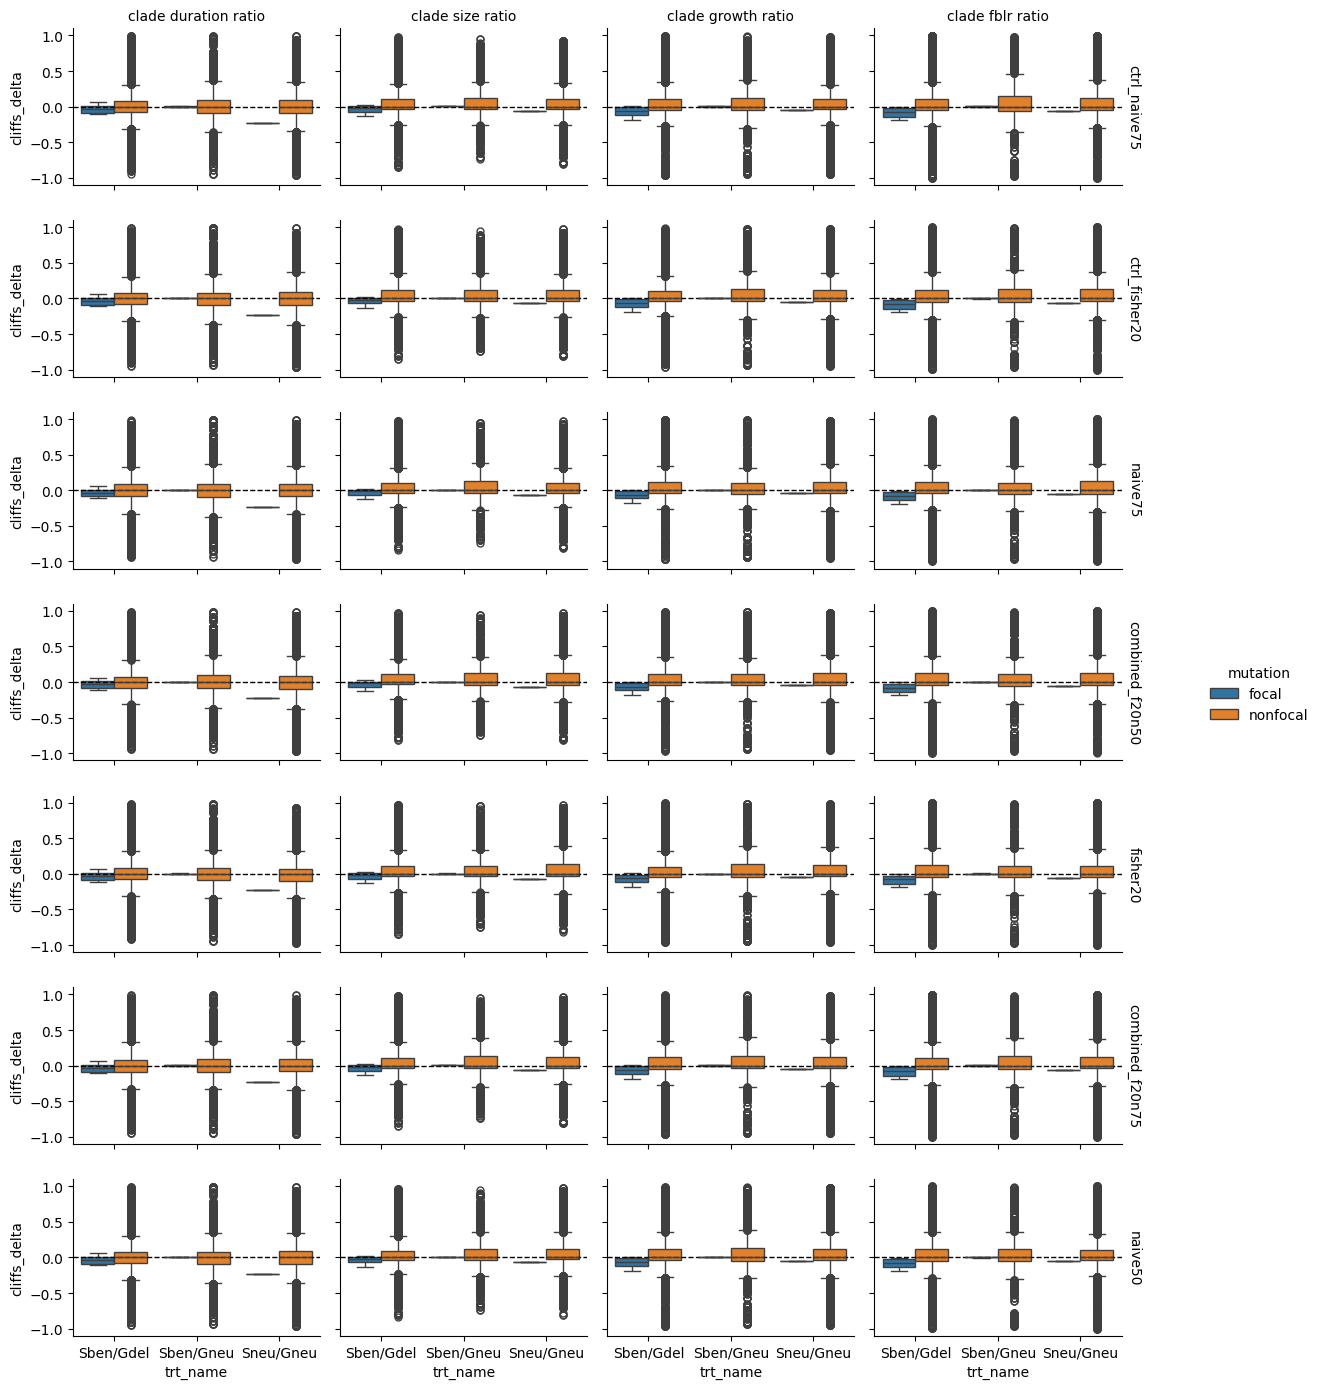

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


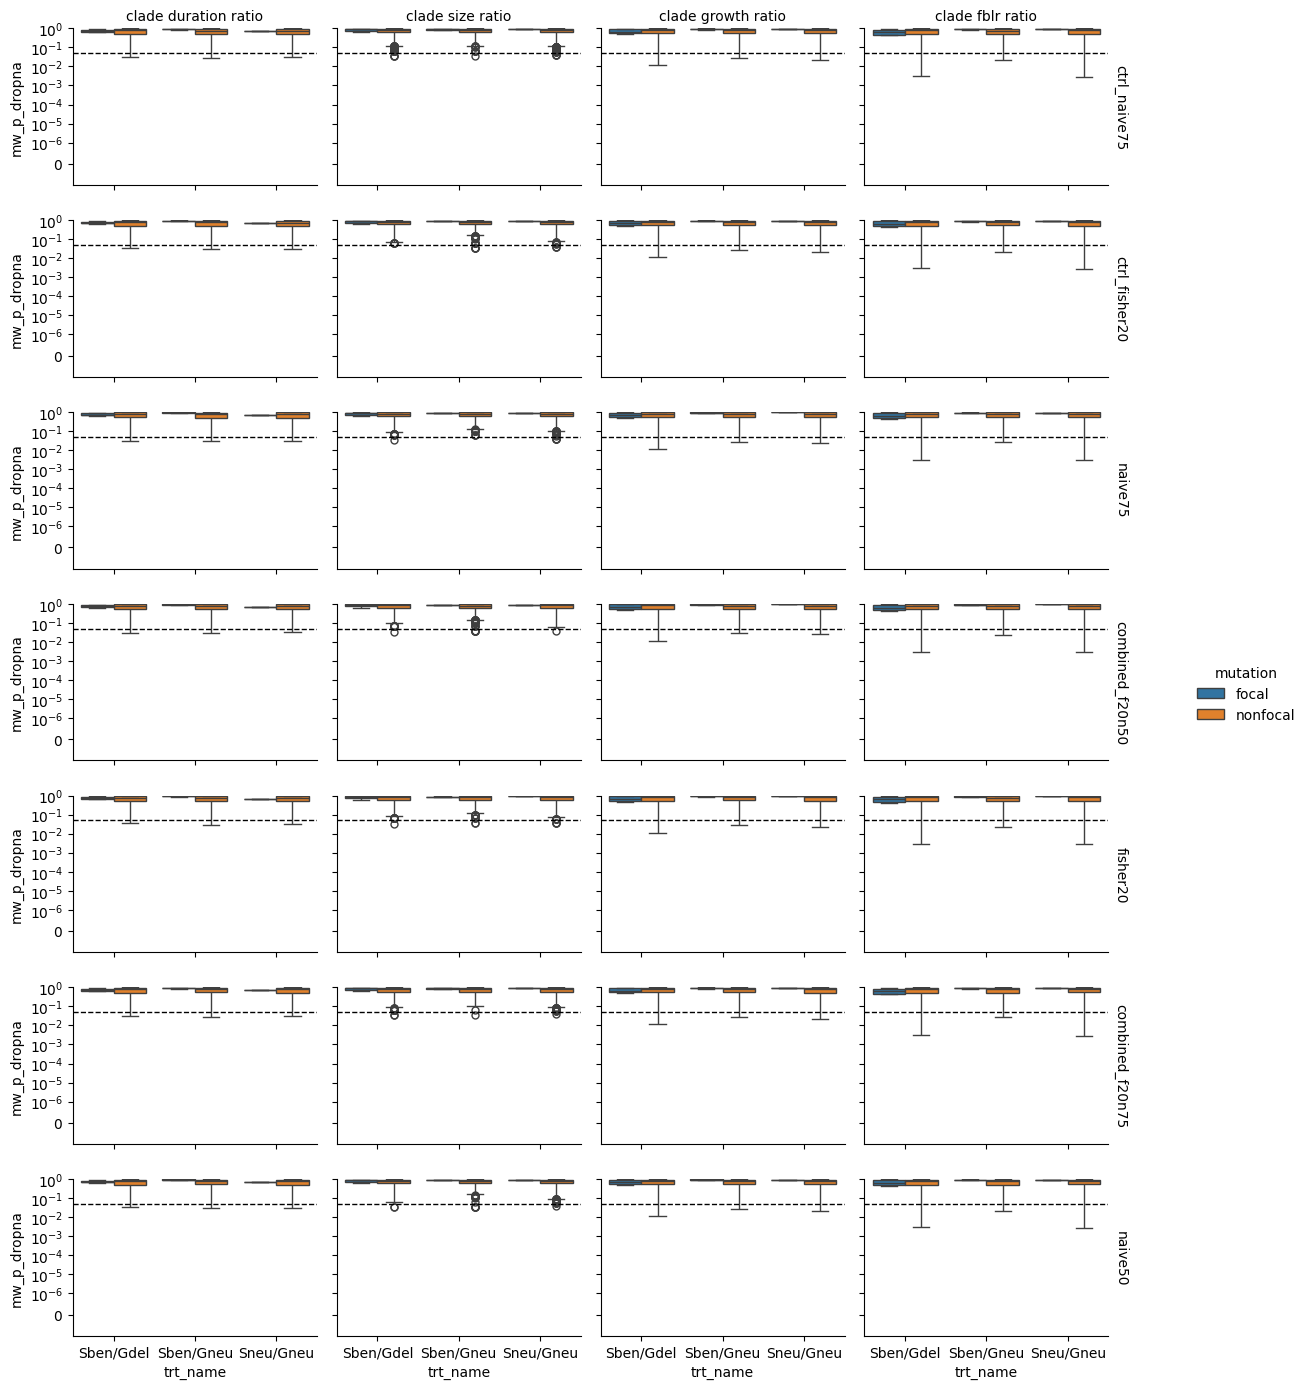

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


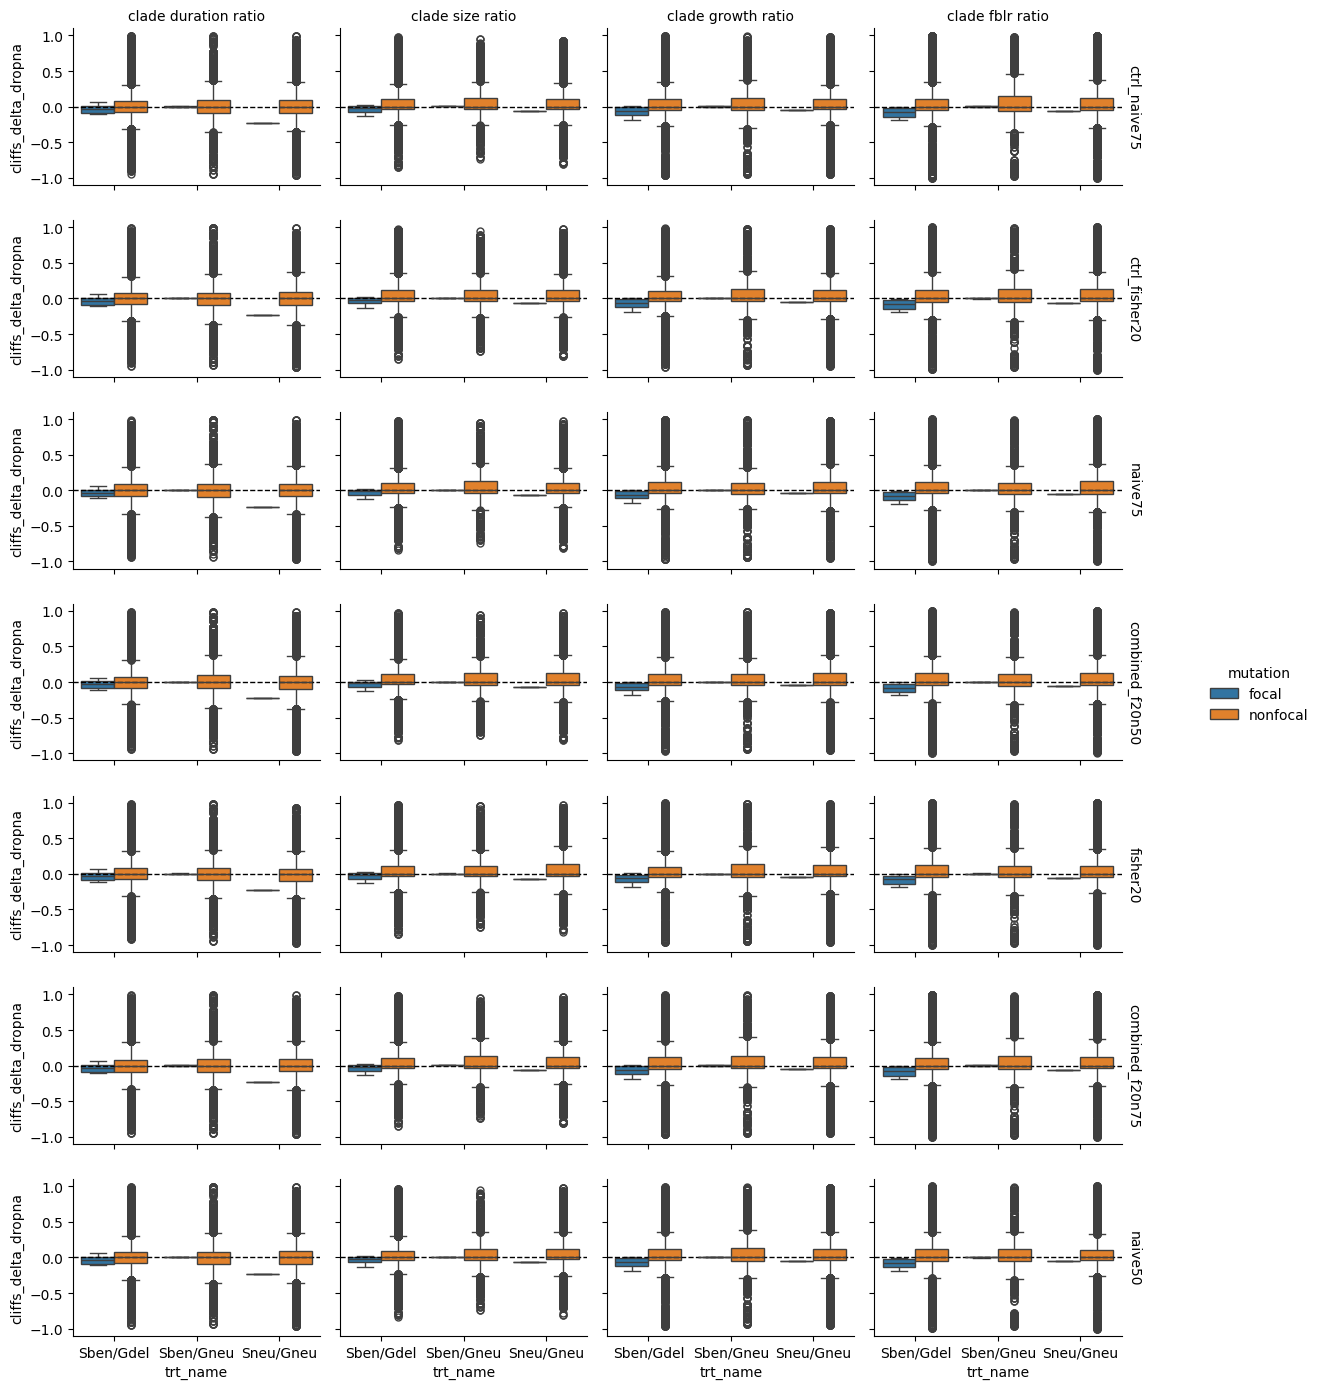

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


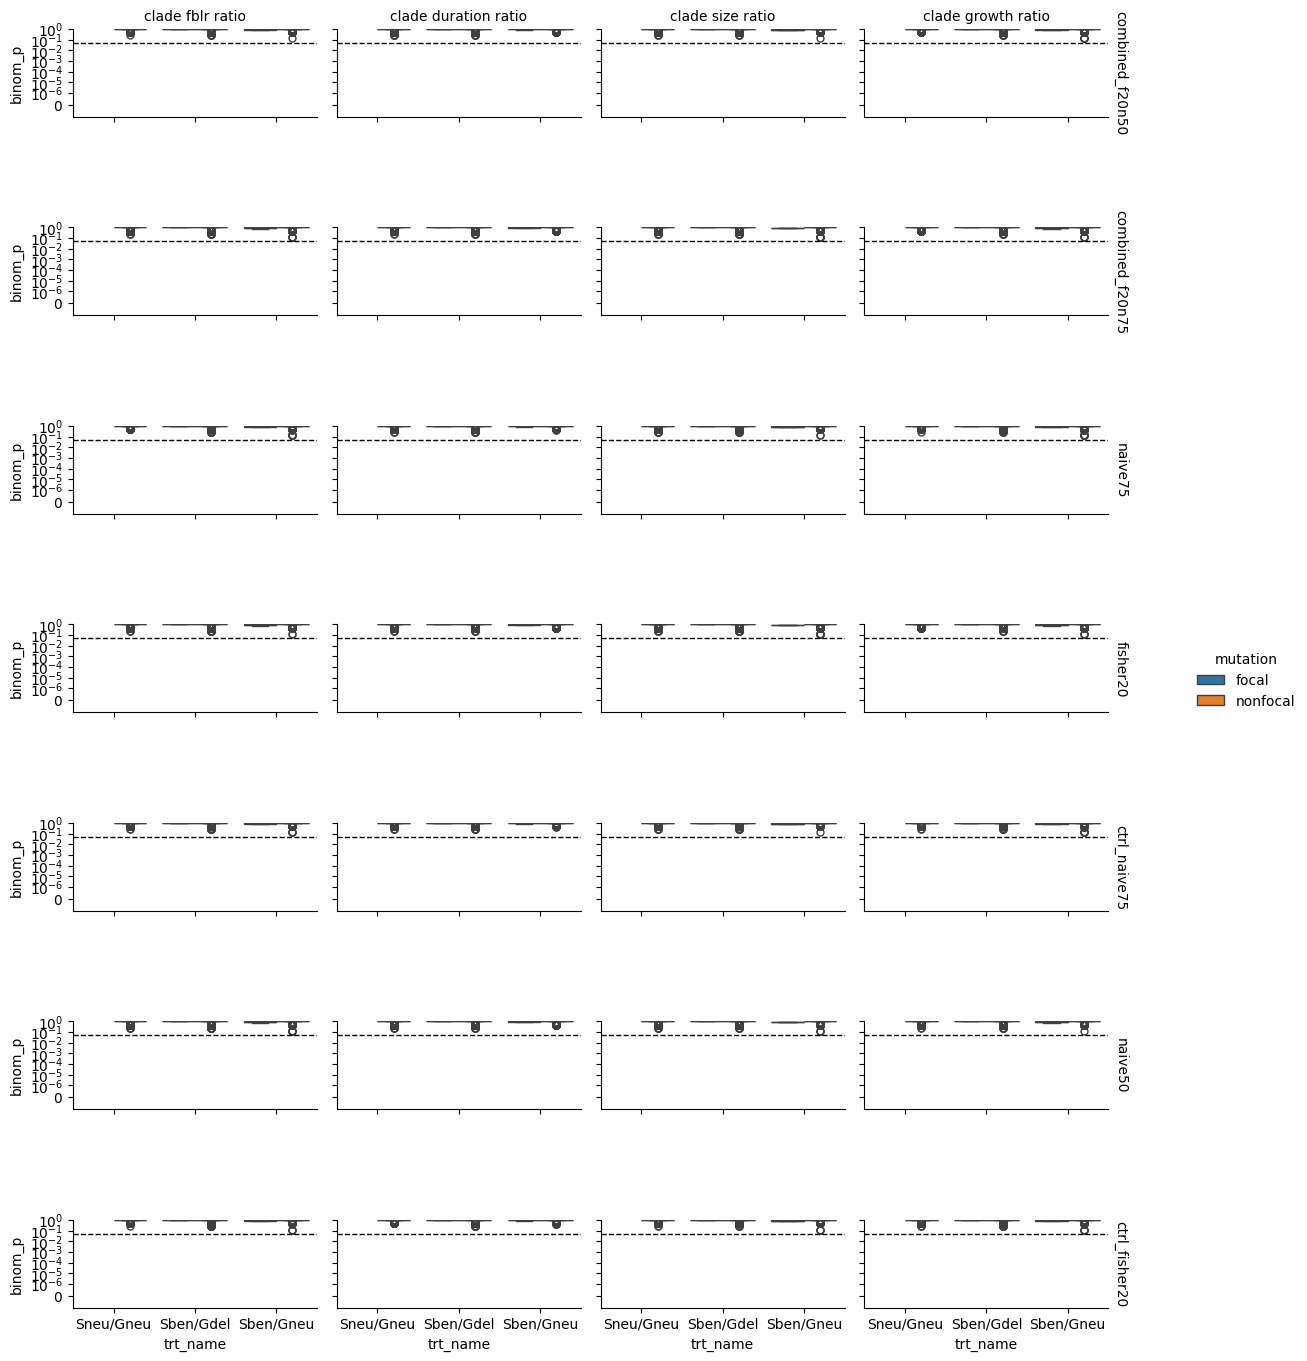

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


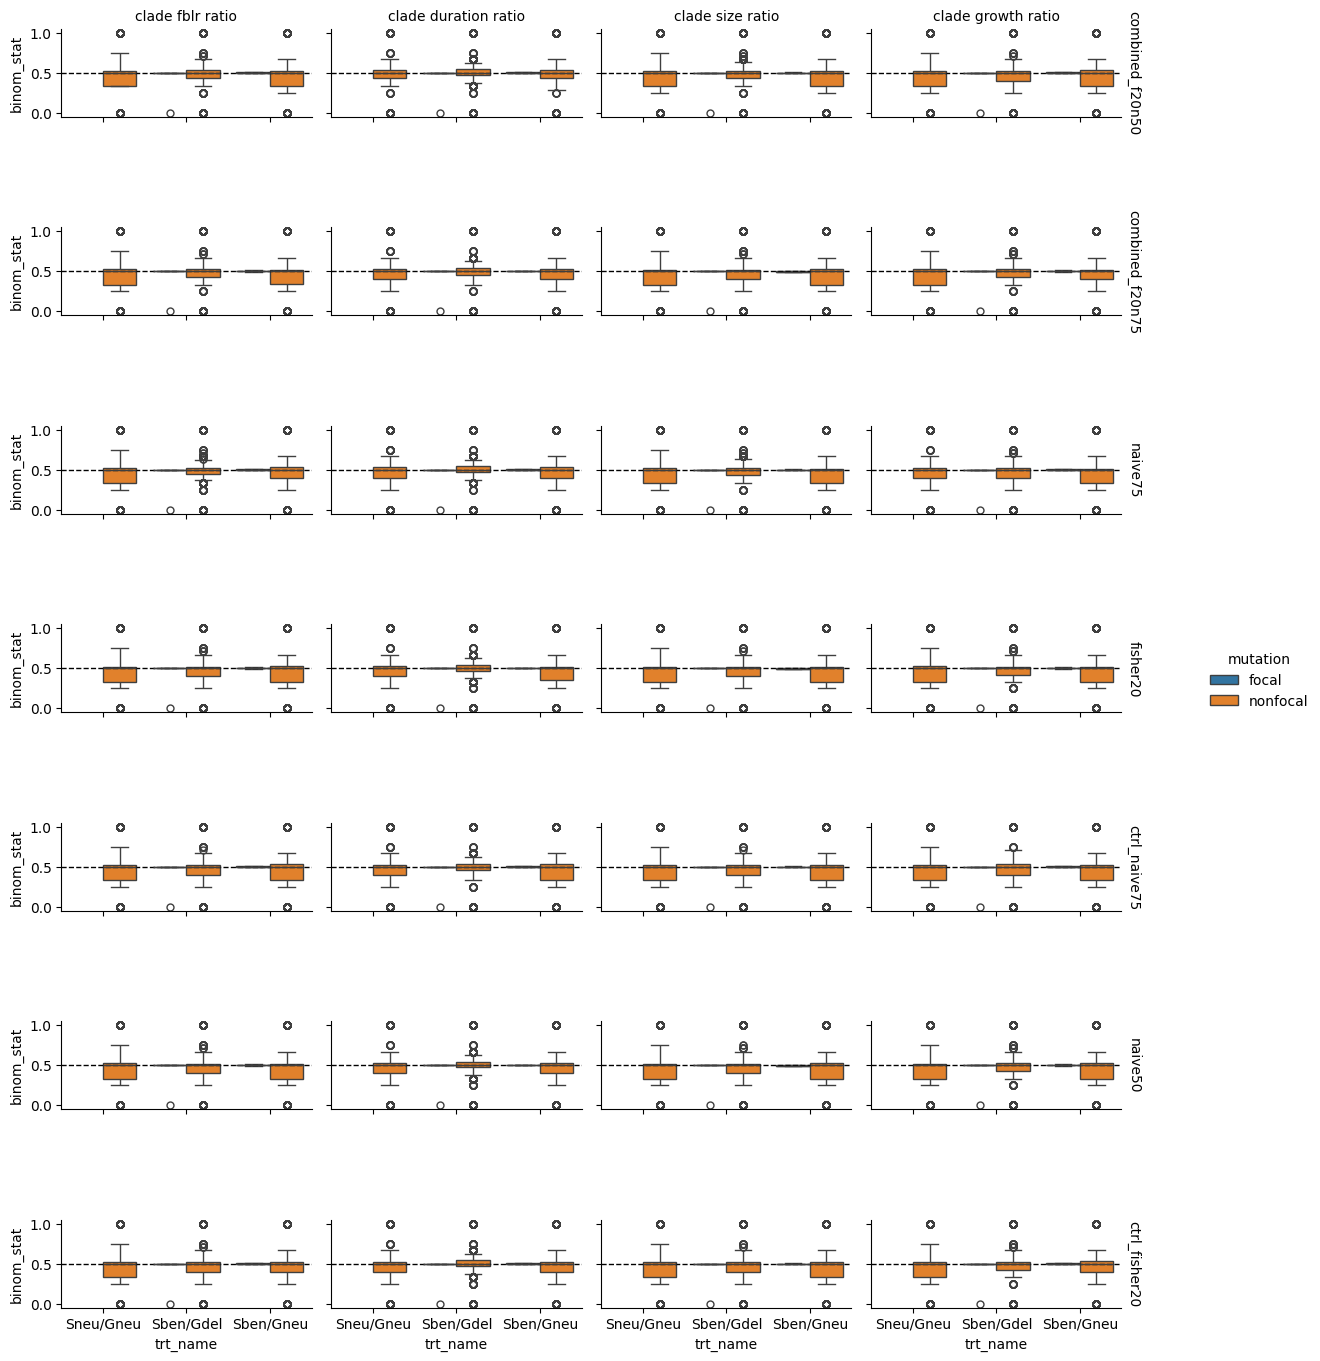

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


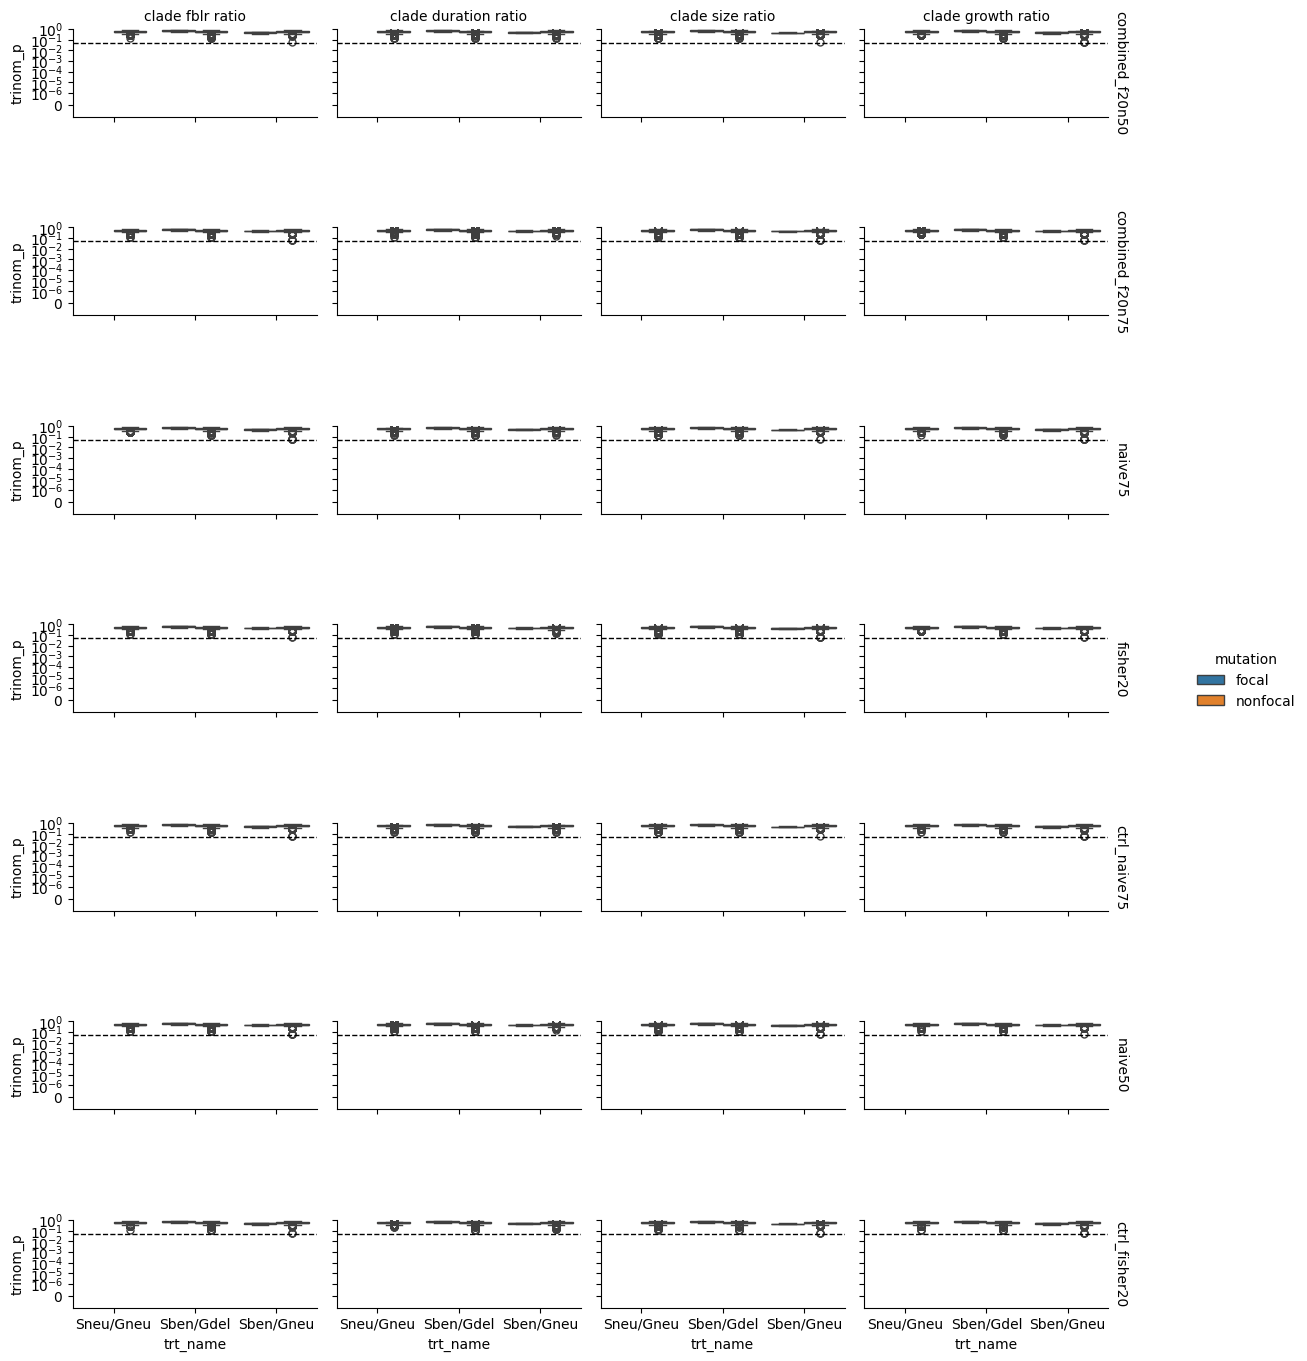

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


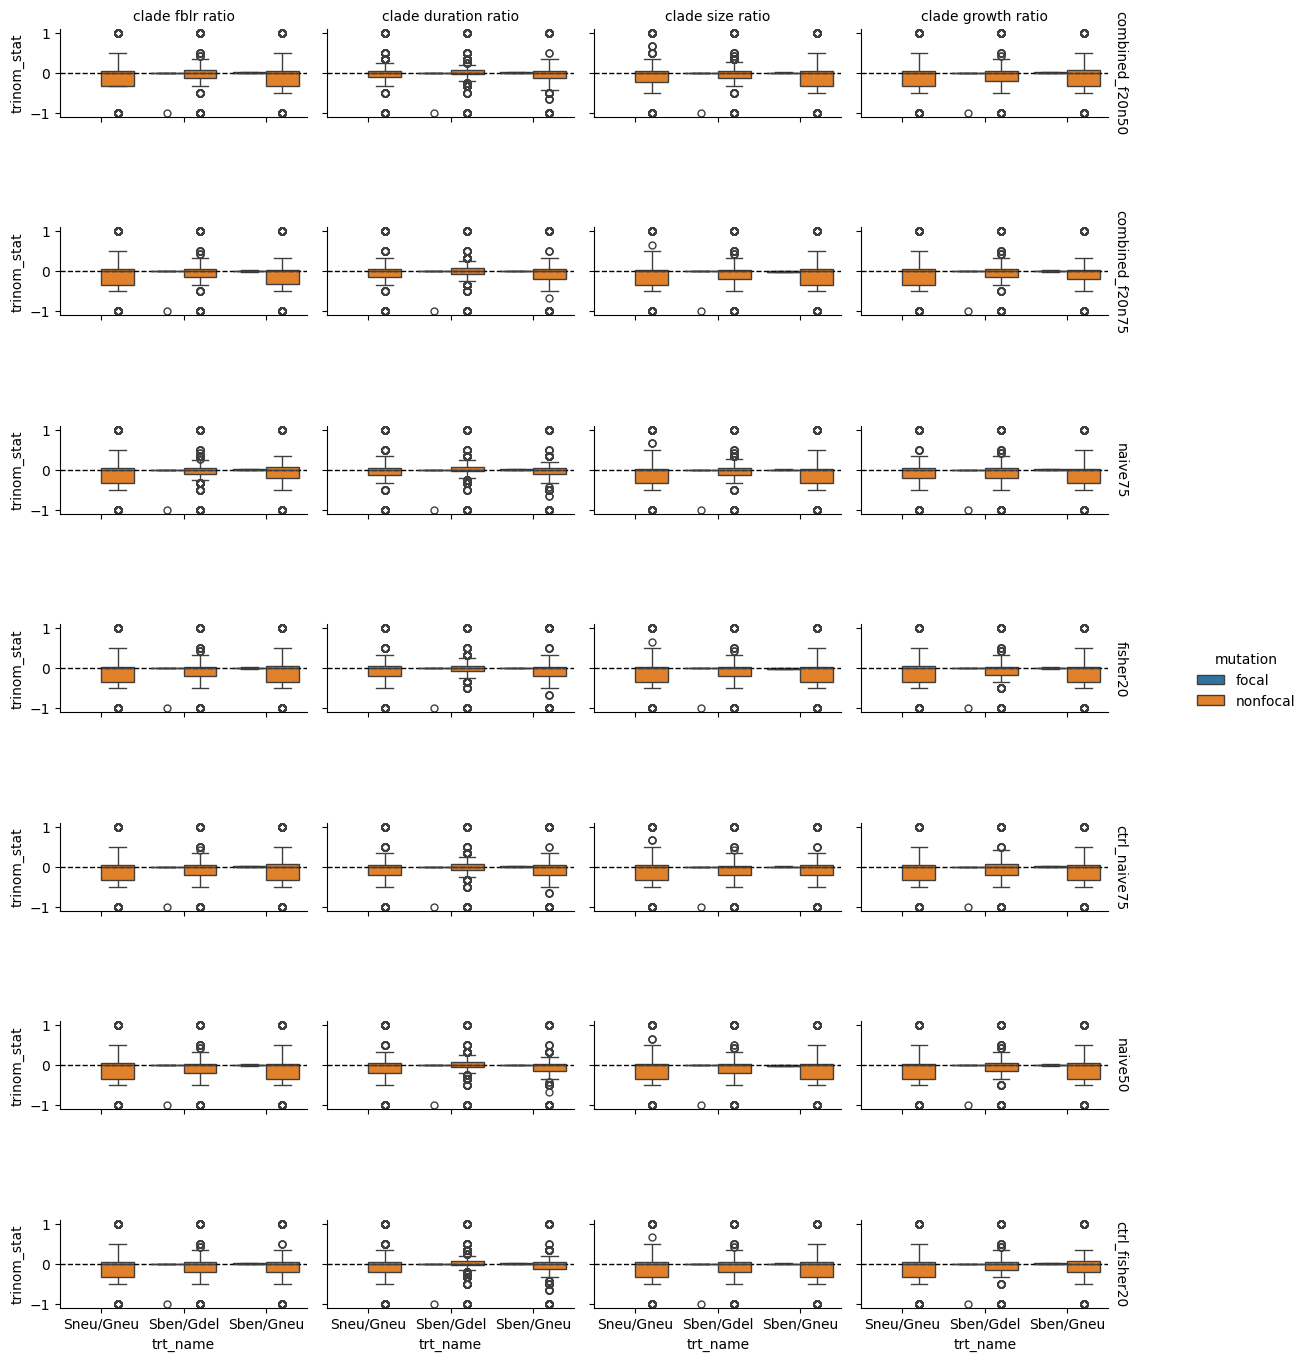

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


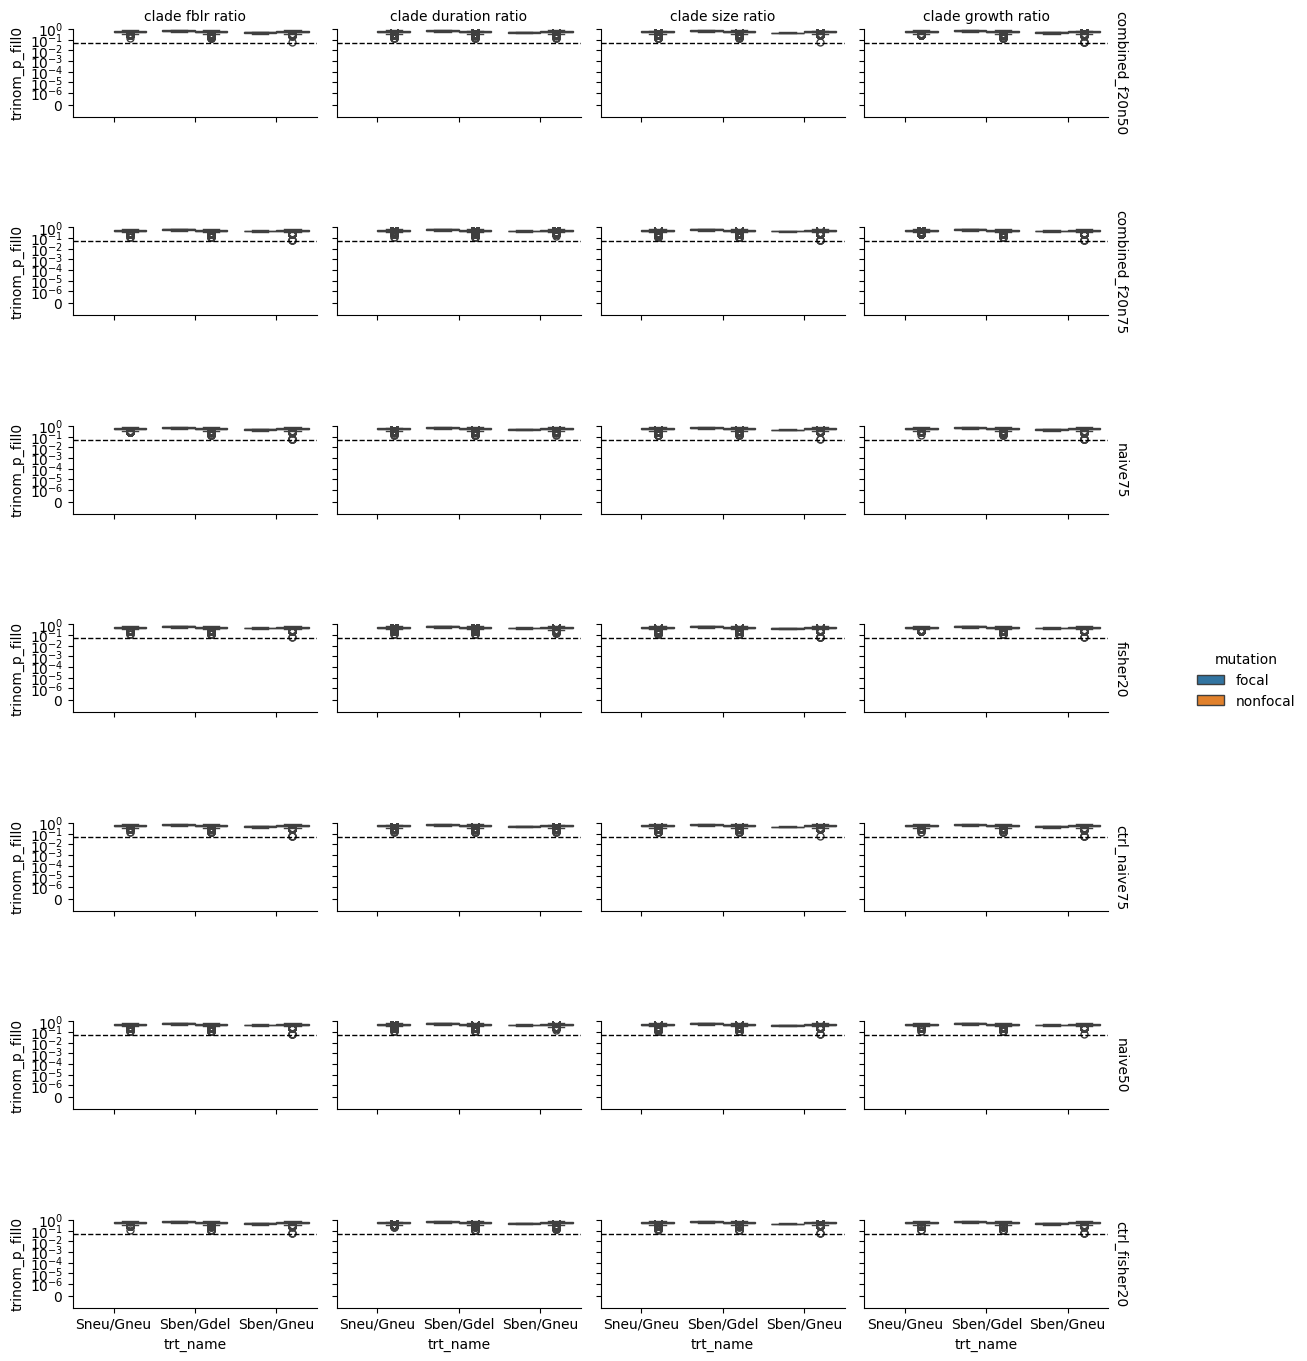

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


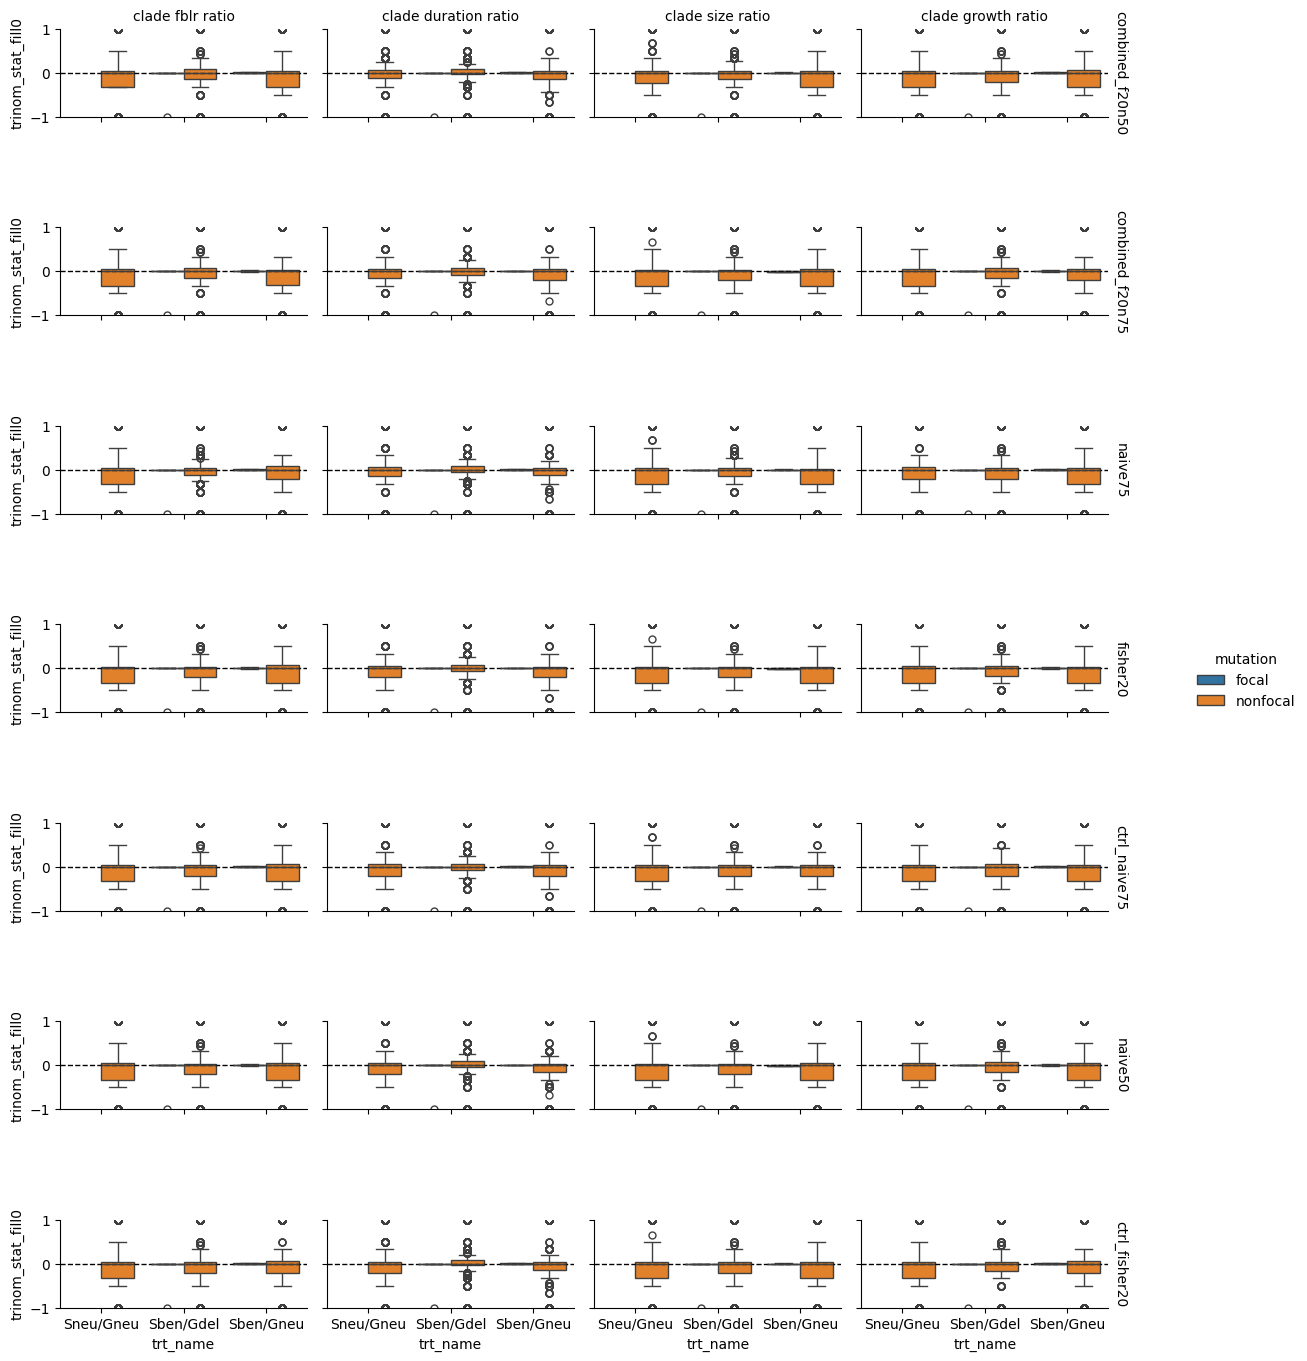

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


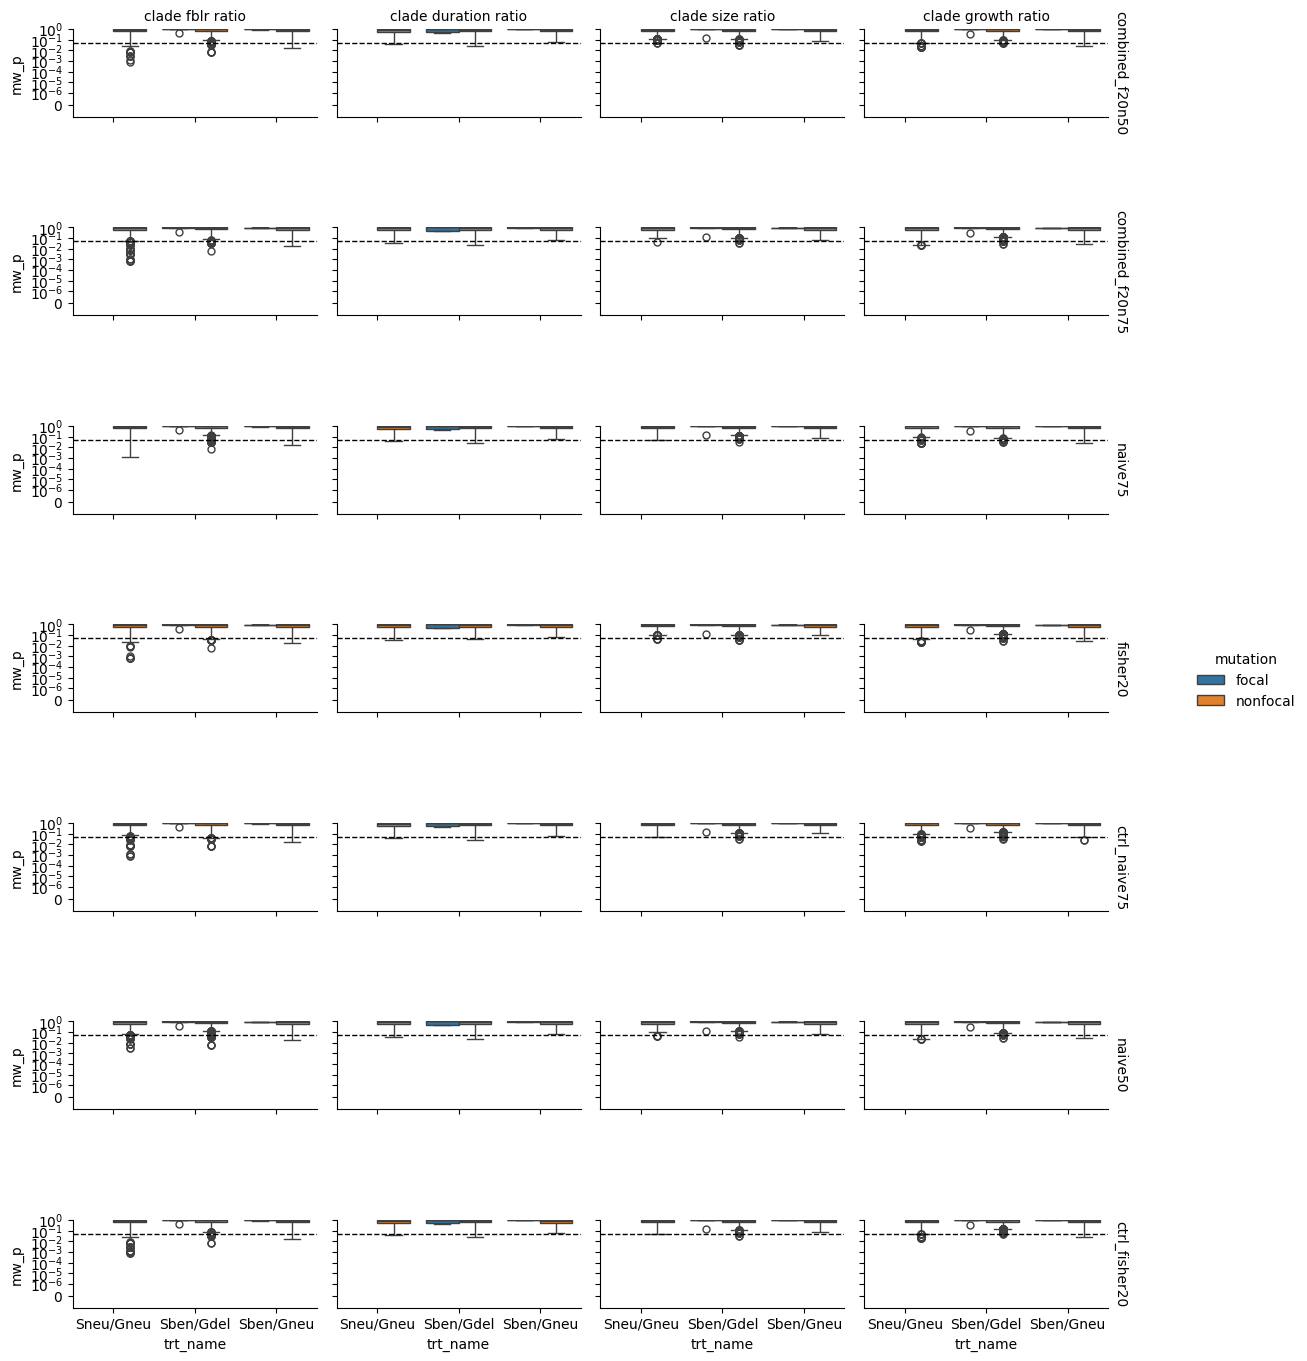

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


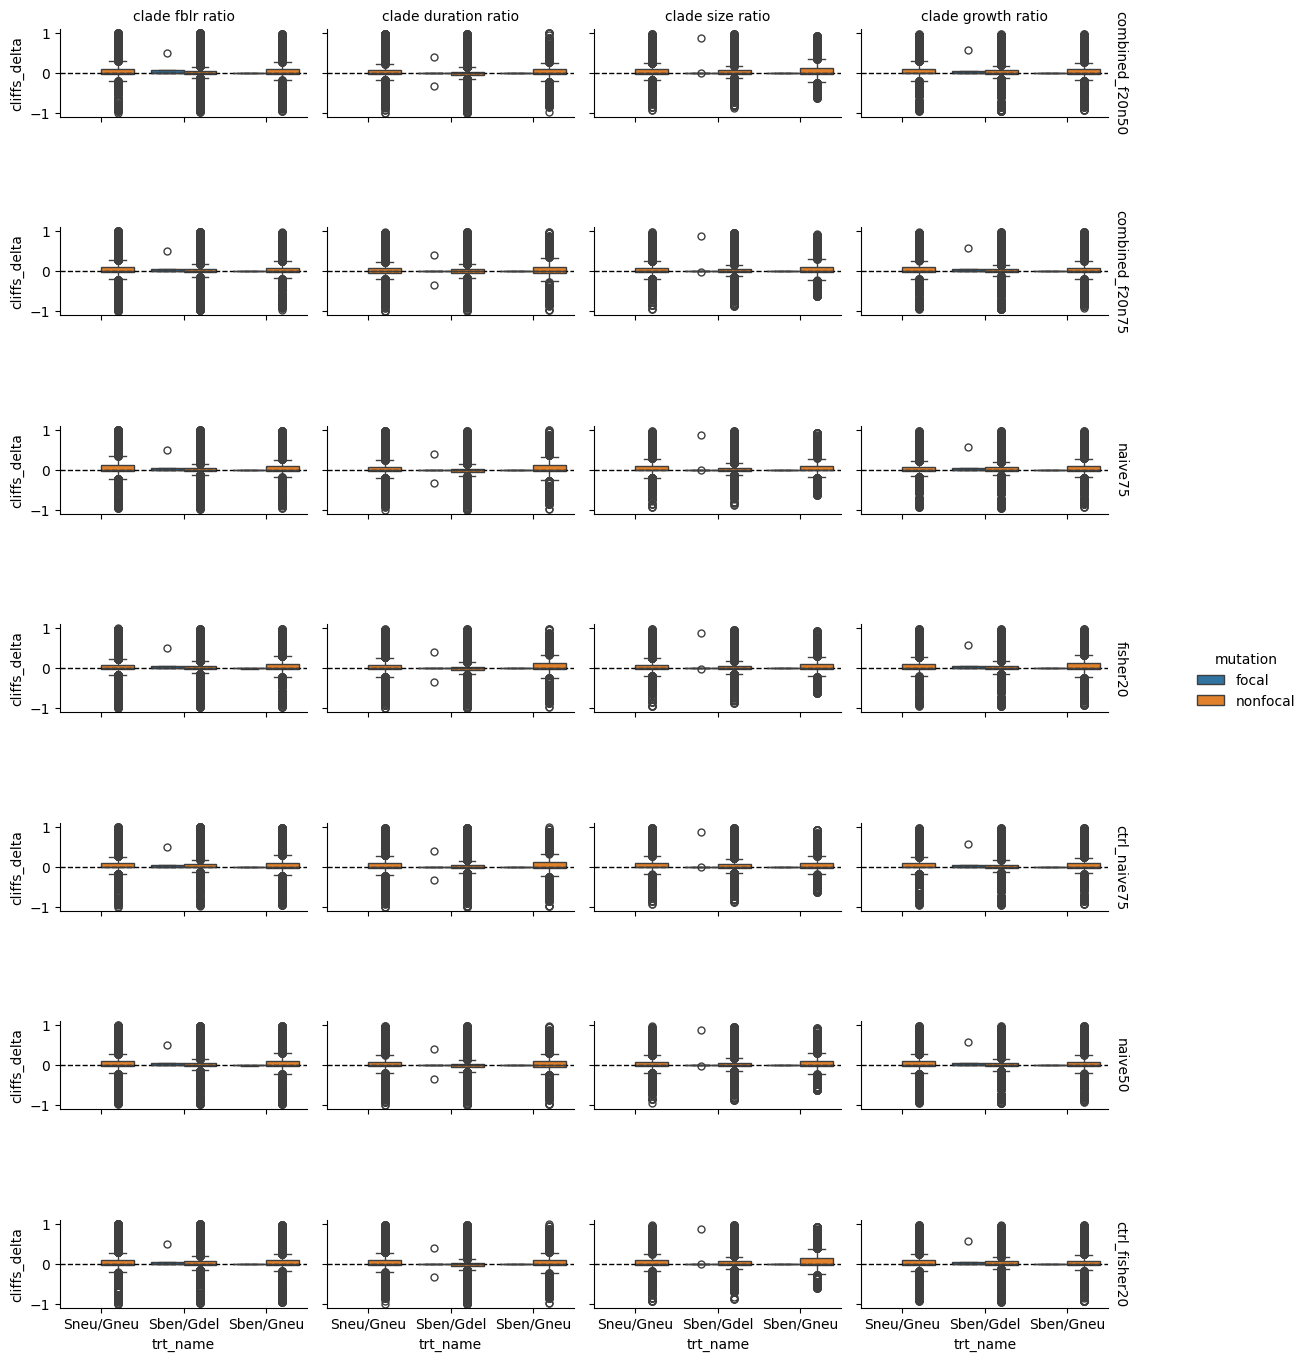

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


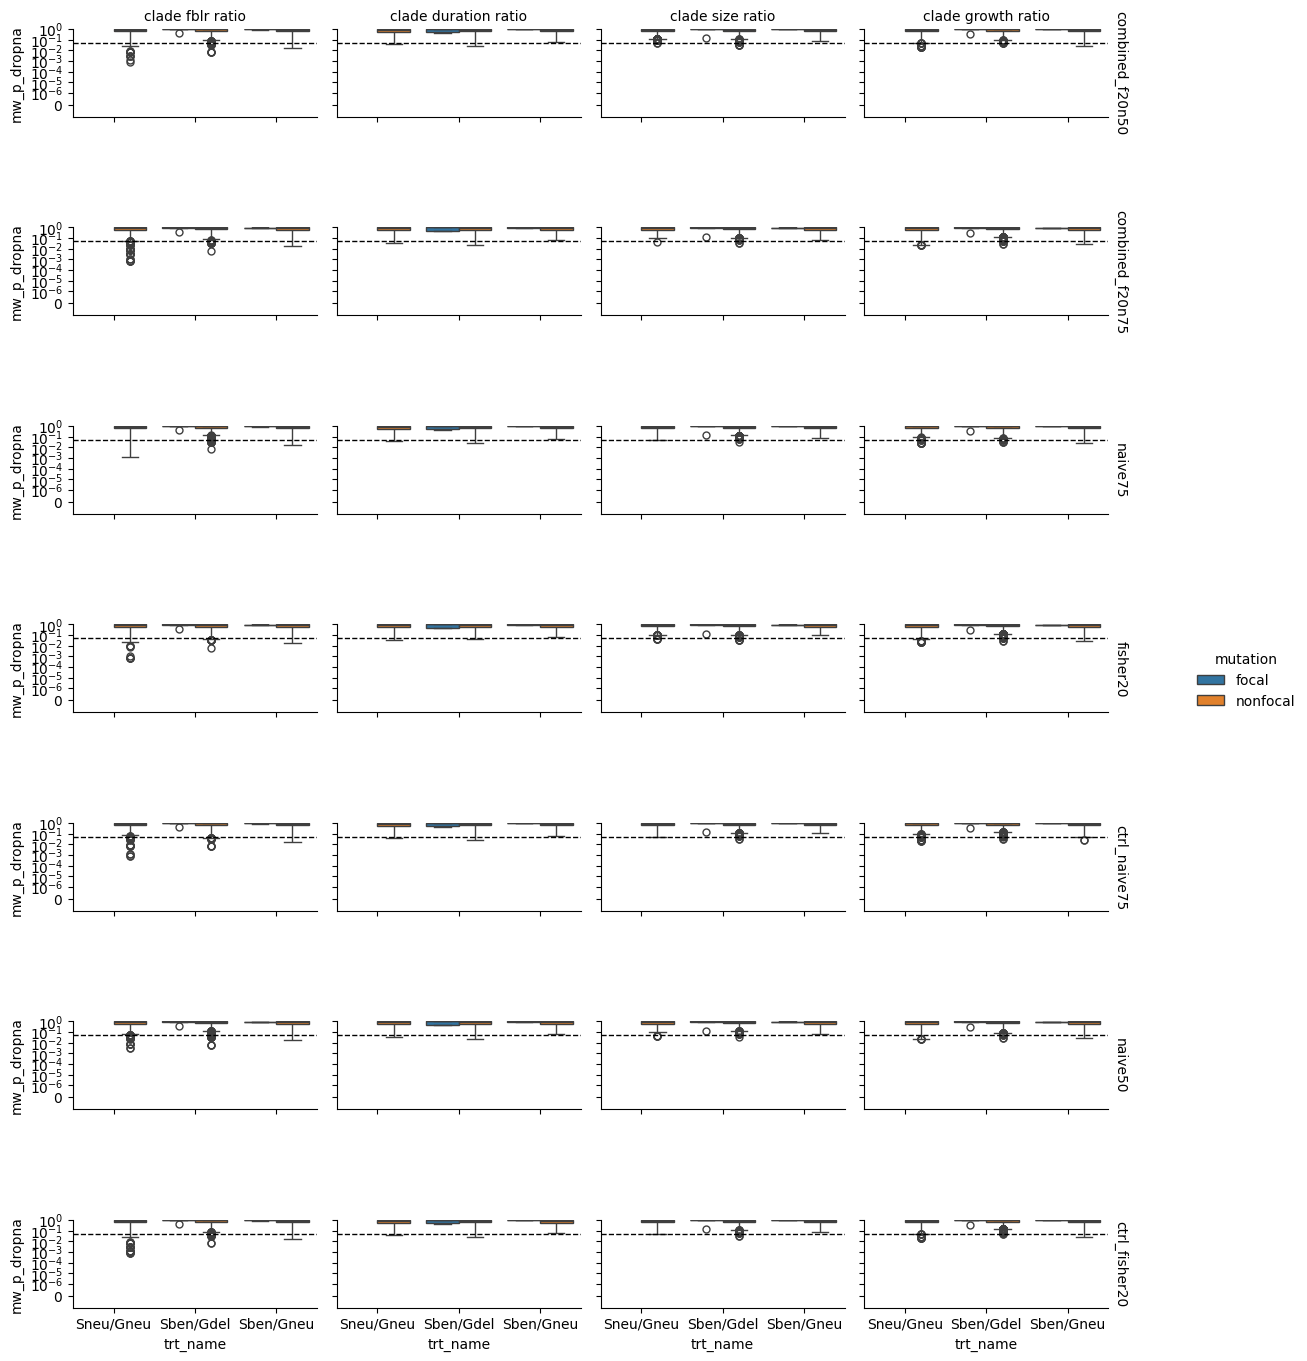

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


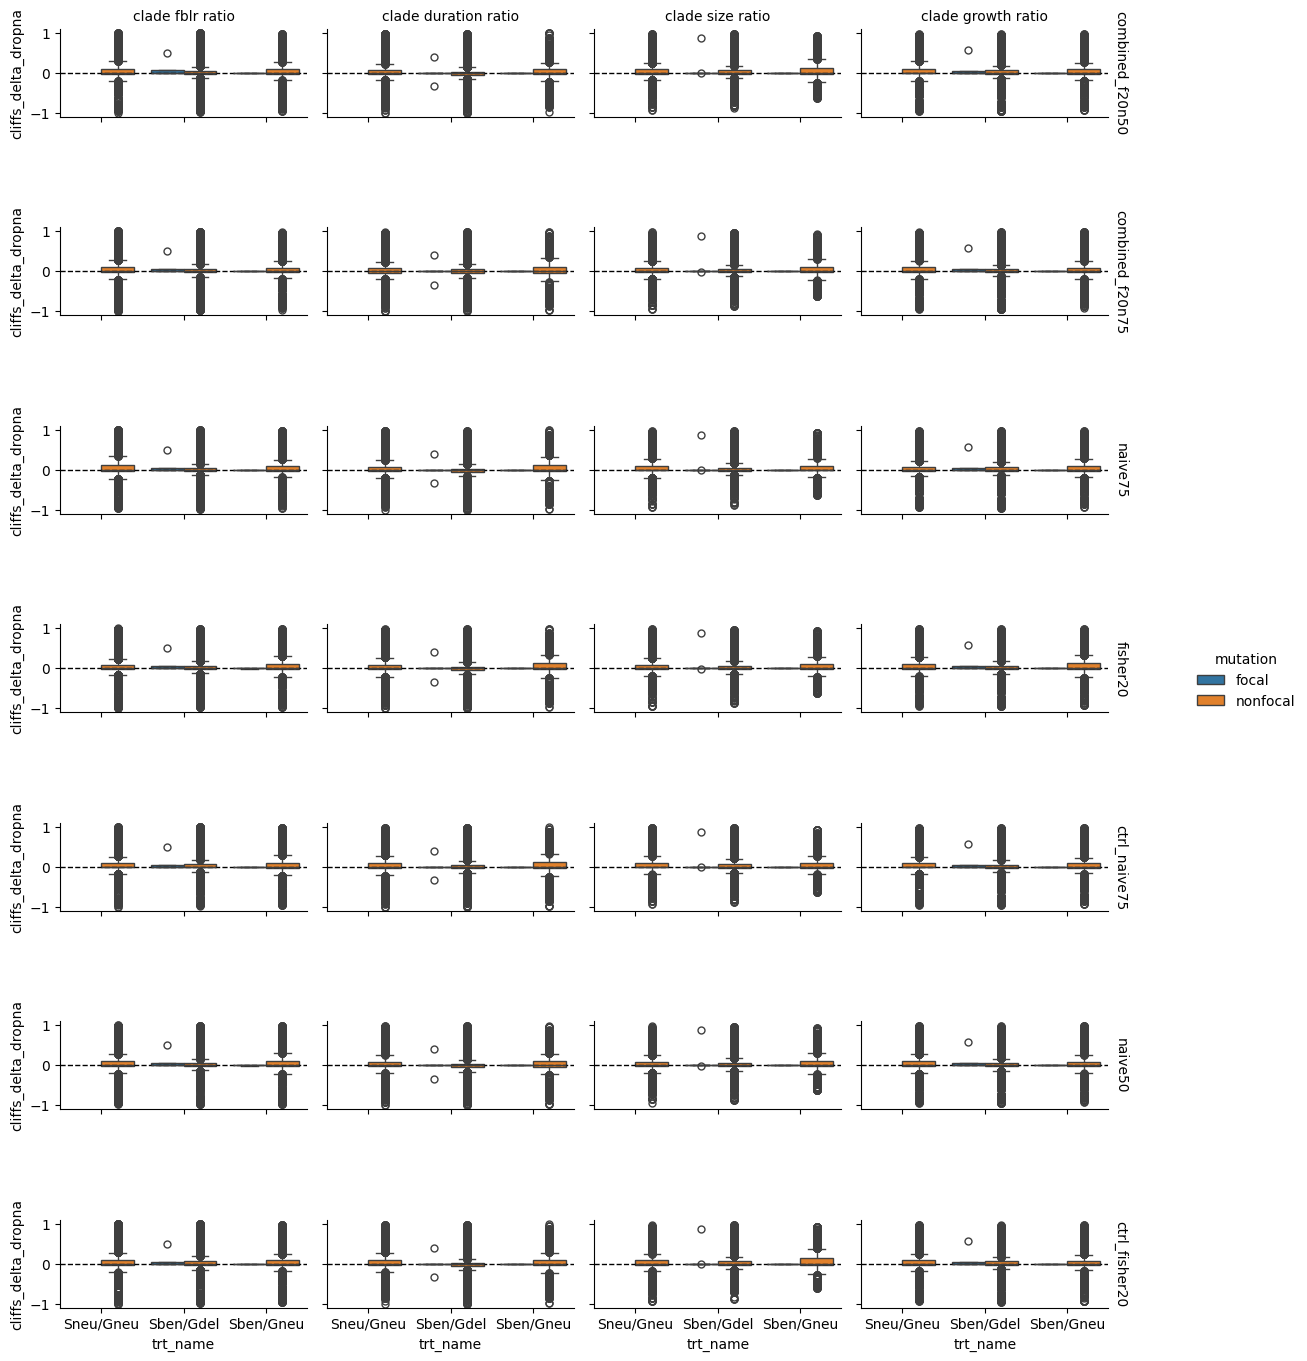

In [13]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for stat in stats:
        display(HTML(f"<h3>{stat} {min_leaves=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp,
            x="trt_name",
            y=stat,
            hue="mutation",
            row="screen_name",
            col="tb_stat",
            kind="box",
            height=2,
            aspect=1.5,
            margin_titles=True,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.set(
                ylim={
                    "binom_p": (-1e-6, 1),
                    "binom_stat": (-0.05, 1.05),
                    "trinom_p": (-1e-6, 1),
                    "trinom_stat": (-1.1, 1.1),
                    "trinom_p_fill0": (-1e-6, 1),
                    "trinom_stat_fill0": (-1, 1),
                    "mw_p": (-1e-6, 1),
                    "cliffs_delta": (-1.1, 1.1),
                    "mw_p_dropna": (-1e-6, 1),
                    "cliffs_delta_dropna": (-1.1, 1.1),
                }[stat],
            )
            if "_p" not in stat:
                teed.map(
                    plt.axhline,
                    y={
                        "binom_stat": 0.5,
                        "trinom_stat": 0,
                        "trinom_stat_fill0": 0,
                        "cliffs_delta": 0,
                        "cliffs_delta_dropna": 0,
                    }[stat],
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )
            else:
                for ax in teed.axes.flatten():
                    ax.set_yscale("symlog", linthresh=1e-6)

                teed.map(
                    plt.axhline,
                    y=0.05,
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )


In [14]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p  mw_p_dropna  \
131819      20854  0.034385      289      147  8.140305e-01     0.975430   
527522       9822  0.016101        0        0           NaN          NaN   
131823      20854  0.034385      289      147  8.140305e-01     0.975430   
918944      21453  0.035575     2811     1440  1.996368e-01     0.401857   
131771      20854  0.034385      295      151  7.269043e-01     0.886635   
918849      21453  0.035575     1054      544  3.094054e-01     0.611805   
395985      18404  0.030120     1006      524  1.961033e-01     0.344000   
131768      20854  0.034385     3146     1880  5.706294e-28     0.000106   
527455       9822  0.016101        0        0           NaN          NaN   
527478       9822  0.016101        0        0           NaN          NaN   
131735      20854  0.034385      285      145  8.127547e-01     0.983736   
263922      11059  0.018264        0        0           NaN          NaN   
131793      20854  0.034385      972      511  1.159798e-01     0.673135   
131778      20854  0.034385      513      261  7.239698e-01     0.995628   
1048803     11334  0.018826        0        0           NaN          NaN   
131781      20854  0.034385      972      511  1.159798e-01     0.673135   
1048892     11334  0.018826     2209        0  0.000000e+00     0.000000   
263885      11059  0.018264        0        0           NaN          NaN   
1048856     11334  0.018826     4409     1155  0.000000e+00     0.000000   
131804      20854  0.034385     2505     1285  2.009855e-01     0.464868   
918958      21453  0.035575      510      251  7.566223e-01     0.876785   
131772      20854  0.034385     3146     1880  5.706294e-28     0.000106   
918947      21453  0.035575      288      142  8.597229e-01     0.891260   
918895      21453  0.035575      294      147  1.000000e+00     0.899545   
527462       9822  0.016101        0        0           NaN          NaN   

                      tb_stat  screened_N   trt_name  mut_char_pos  \
131819       clade size ratio         295  Sben/Gneu             0   
527522       clade size ratio           0  Sben/Gneu             0   
131823       clade size ratio         295  Sben/Gneu             0   
918944       clade size ratio        3417  Sben/Gneu             0   
131771     clade growth ratio         295  Sben/Gneu             0   
918849   clade duration ratio        1072  Sben/Gneu             0   
395985     clade growth ratio        1006  Sben/Gneu             0   
131768     clade growth ratio        3146  Sben/Gneu             0   
527455   clade duration ratio           0  Sben/Gneu             0   
527478       clade fblr ratio           0  Sben/Gneu             0   
131735   clade duration ratio         295  Sben/Gneu             0   
263922       clade size ratio           0  Sben/Gneu             0   
131793     clade growth ratio         972  Sben/Gneu             0   
131778     clade growth ratio         513  Sben/Gneu             0   
1048803  clade duration ratio           0  Sben/Gneu             0   
131781     clade growth ratio         972  Sben/Gneu             0   
1048892      clade size ratio        4847  Sben/Gneu             0   
263885     clade growth ratio           0  Sben/Gneu             0   
1048856    clade growth ratio        4847  Sben/Gneu             0   
131804       clade size ratio        3146  Sben/Gneu             0   
918958       clade size ratio         527  Sben/Gneu             0   
131772     clade growth ratio        3146  Sben/Gneu             0   
918947       clade size ratio         294  Sben/Gneu             0   
918895       clade fblr ratio         294  Sben/Gneu             0   
527462   clade duration ratio           0  Sben/Gneu             0   

         screened_nanmean  
131819          -0.000753  
527522                NaN  
131823          -0.000753  
918944           0.055814  
131771           0.000004  
918849           0.019939  
395985         